--------------------
# PROBLEM-1:
--------------------
##### A Digital Marketing company called ads24x7 is a company that has now gor a seed funding of $ 10 millions. THey are expanding their wings in Marketing Analytics. They have collected data from their Marketing Intelligence team and now wants, us a data analyst to segment the type of ads based on the feature provided.(Note: we use CLustering procedure to segment the ads into homogenous groups.) 
-----------------------
First of all we will load the necessary files as written below. Then, load the clustering clean ads dataset and see the first and last five rows in the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score,silhouette_samples
import statsmodels.api as sm
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_ads = pd.read_excel("Clustering+Clean+Ads_Data.xlsx")
data_ads.head()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0

In [3]:
data_ads.tail()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type Format  Available_Impressions  Matched_Queries  \
23061      Web      Mobile  Video                      1                1   
23062      Web     Desktop  Video                      3                2   
23063      App      Mobile  Video                      2                1   
23064    Video      Mobile  Video                      7                1   
23065      App      Mobile  Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue  CTR  CPM  CPC  
23061            1       1   0.07  0.35   0.0455  NaN  NaN  NaN  
23062            2       1   0.04  0.35   0.0260  NaN  NaN  NaN  
23063            1       1   0.05  0.35   0.0325  NaN  NaN  NaN  
23064            1       1   0.07  0.35   0.0455  NaN  NaN  NaN  
23065            2       1   0.09  0.35   0.0585  NaN  NaN  NaN

Now , we see the shape, datatype using shape and info function.

In [4]:
data_ads.shape

(23066, 19)

In [5]:
data_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [6]:
print(data_ads.InventoryType.value_counts())
print(data_ads['Ad Type'].value_counts())
print(data_ads.Platform.value_counts())
print(data_ads['Device Type'].value_counts())
print(data_ads.Format.value_counts())

InventoryType
Format4    7165
Format5    4249
Format1    3814
Format3    3540
Format6    1850
Format2    1789
Format7     659
Name: count, dtype: int64
Ad Type
Inter224    1658
Inter217    1655
Inter223    1654
Inter219    1650
Inter221    1650
Inter222    1649
Inter229    1648
Inter227    1647
Inter218    1645
inter230    1644
Inter220    1644
Inter225    1643
Inter226    1640
Inter228    1639
Name: count, dtype: int64
Platform
Video    9873
Web      8251
App      4942
Name: count, dtype: int64
Device Type
Mobile     14806
Desktop     8260
Name: count, dtype: int64
Format
Video      11552
Display    11514
Name: count, dtype: int64


Now, the below code line we check for any duplicated rows and there are none.

In [7]:
data_ads.duplicated().sum().sum()

0

Now, we use isnull function and found out there are missing values in CTR,CPM,CPC variables.

In [8]:
data_ads.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

Now, using the below codes we see the values counts in the categorical variables.

As, we have seen before we will use the following formulas for treating the missing values in the three columns as given below:

CPM = (Total Campaign Spend / Number of Impressions) * 1,000.

CPC = Total Cost (spend) / Number of Clicks. 

CTR = Total Measured Clicks / Total Measured Ad Impressions * 100.

After, that we use info and isnull function to check wheather the null values are replaced or not.

In [9]:
def calculate_CPM(x):
     spend=data_ads.Spend
     impressions=data_ads.Impressions
     x = (spend/impressions)*1000
     return x
data_ads['CPM']= data_ads[['CPM']].apply(lambda x: calculate_CPM(x))

In [10]:
def calculate_CPC(y):
     spend=data_ads.Spend
     clicks=data_ads.Clicks
     y = (spend/clicks)
     return y

data_ads['CPC']= data_ads[['CPC']].apply(lambda y: calculate_CPC(y))

In [11]:
def calculate_CTR(z):
     clicks=data_ads.Clicks
     impressions=data_ads.Impressions
     z = (clicks/impressions)*100
     return z
    
data_ads['CTR']= data_ads[['CTR']].apply(lambda z: calculate_CTR(z))

In [12]:
data_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

from above line of codes we got that there are 23066 rows and 18 columns.
6 are float datatype, 6 are object datatype and 7 are int datatype.

In [13]:
data_ads.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

Now, that there are no empty values as seen above. we, will use describe function to get the count, mean, std, min, max and the three quantiles as showm below.


Since as per the problem we will be performing clustering on the dataset, we will divide the dataset further into two dataset one for numerical variables and categorical variabels.
we will see the first five rows of numerical variable dataset. And, use describe function for the numerical dataset.

In [14]:
#df_ads = data_ads.drop(['Timestamp','InventoryType','Ad Type','Platform','Device Type','Format'],axis=1)
dfnum_ads = data_ads.select_dtypes(['int64','float64'])
dfcat_ads = data_ads.select_dtypes(['object'])

In [15]:
dfnum_ads.head()

Ad - Length  Ad- Width  Ad Size  Available_Impressions  Matched_Queries  \
0          300        250    75000                   1806              325   
1          300        250    75000                   1780              285   
2          300        250    75000                   2727              356   
3          300        250    75000                   2430              497   
4          300        250    75000                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue       CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.309598  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.350877  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.281690  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.202020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.413223  0.0  0.0

In [16]:
dfnum_ads.describe().T

count          mean           std           min  \
Ad - Length            23066.0  3.851631e+02  2.336514e+02    120.000000   
Ad- Width              23066.0  3.378960e+02  2.030929e+02     70.000000   
Ad Size                23066.0  9.667447e+04  6.153833e+04  33600.000000   
Available_Impressions  23066.0  2.432044e+06  4.742888e+06      1.000000   
Matched_Queries        23066.0  1.295099e+06  2.512970e+06      1.000000   
Impressions            23066.0  1.241520e+06  2.429400e+06      1.000000   
Clicks                 23066.0  1.067852e+04  1.735341e+04      1.000000   
Spend                  23066.0  2.706626e+03  4.067927e+03      0.000000   
Fee                    23066.0  3.351231e-01  3.196322e-02      0.210000   
Revenue                23066.0  1.924252e+03  3.105238e+03      0.000000   
CTR                    23066.0  8.409941e+00  9.262048e+00      0.010874   
CPM                    23066.0  8.396849e+00  9.057760e+00      0.000000   
CPC                    23066.0  3.366776e-01  3.412527e-01      0.000000   

                                25%            50%           75%           max  
Ad - Length              120.000000     300.000000  7.200000e+02  7.280000e+02  
Ad- Width                250.000000     300.000000  6.000000e+02  6.000000e+02  
Ad Size                72000.000000   72000.000000  8.400000e+04  2.160000e+05  
Available_Impressions  33672.250000  483771.000000  2.527712e+06  2.759286e+07  
Matched_Queries        18282.500000  258087.500000  1.180700e+06  1.470202e+07  
Impressions             7990.500000  225290.000000  1.112428e+06  1.419477e+07  
Clicks                   710.000000    4425.000000  1.279375e+04  1.430490e+05  
Spend                     85.180000    1425.125000  3.121400e+03  2.693187e+04  
Fee                        0.330000       0.350000  3.500000e-01  3.500000e-01  
Revenue                   55.365375     926.335000  2.091338e+03  2.127618e+04  
CTR                        0.265107       9.391248  1.347057e+01  2.000000e+02  
CPM                        1.749084       8.371566  1.304202e+01  7.150000e+02  
CPC                        0.089736       0.139347  5.462421e-01  7.264000e+00

UNIVARIATE ANALYSIS OF NUMERICAL VARIABLES:

We will see the boxplot and histogram for each of the numerical variables and see if there is any need for outliers treatment.

We need to treat any outliers as for Kmean Clustering method is a distance based metric calculation between the varible points for grouping and any outlier will affect the outcome for clustering. Hence, it is necessary to treat any outliers present in any variables.

In the below few lines we detected the outliers presence and treated them.

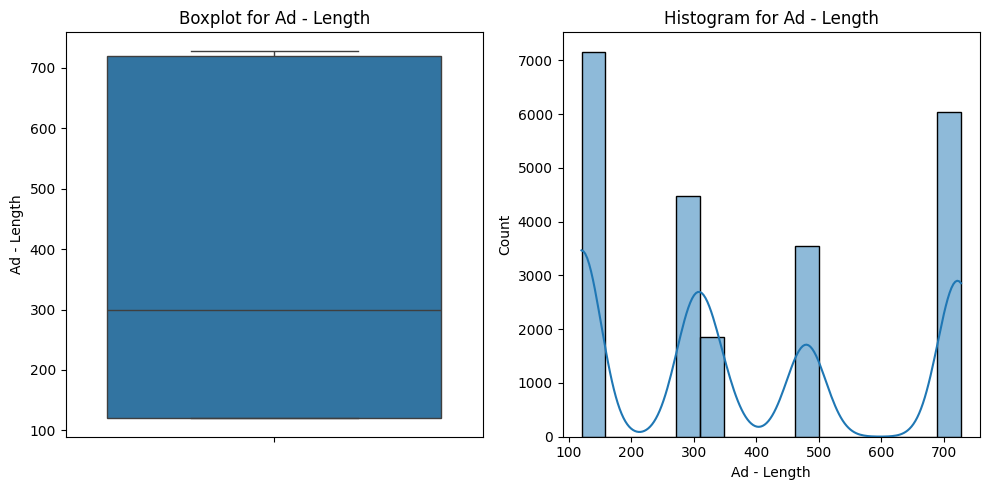

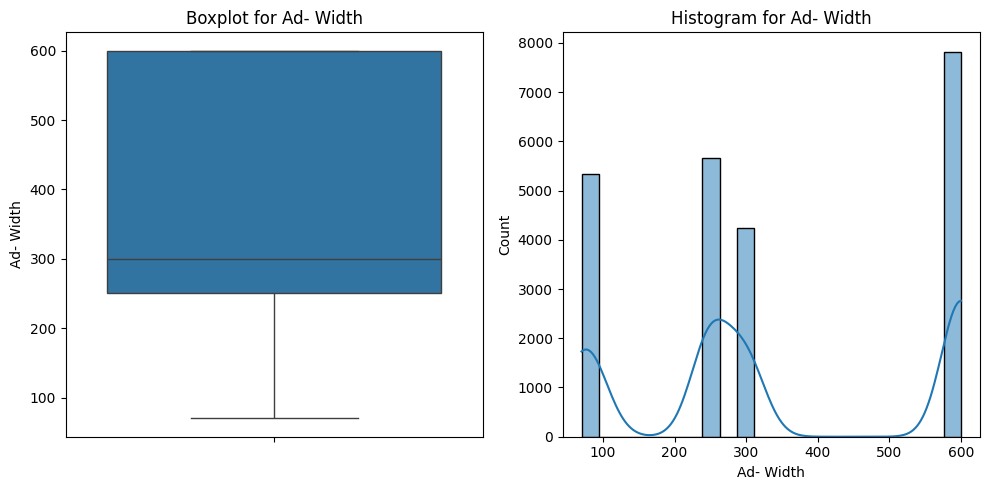

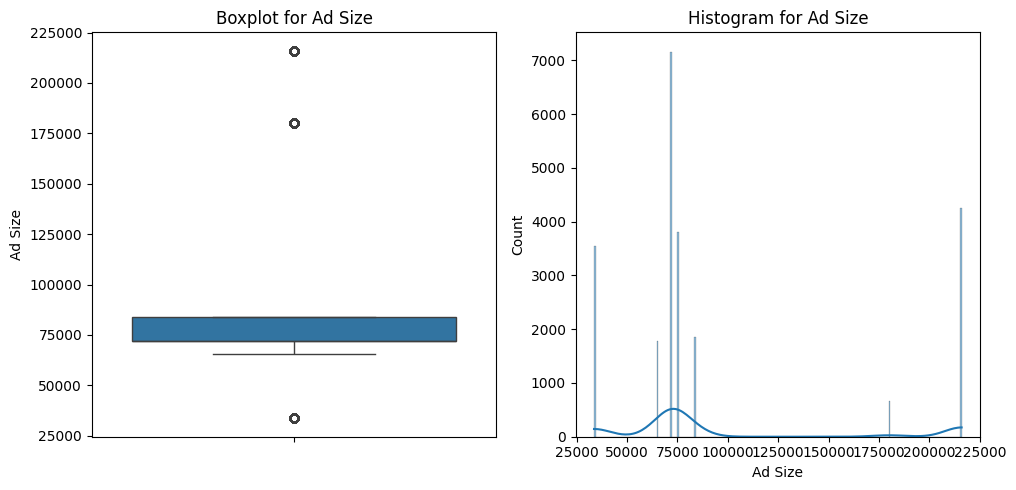

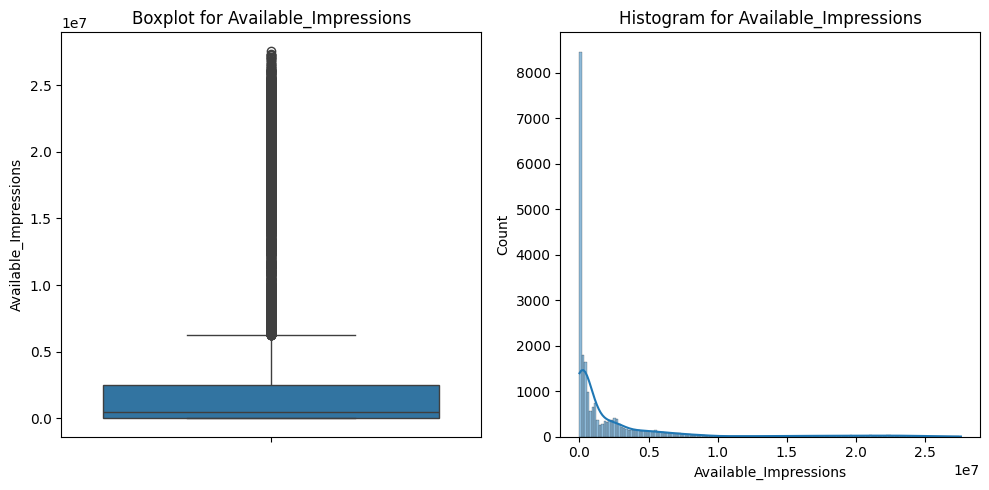

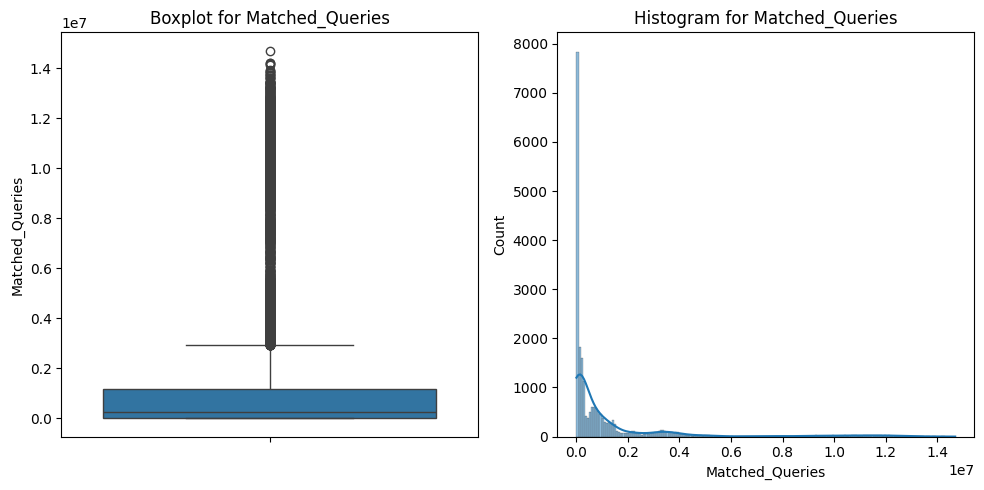

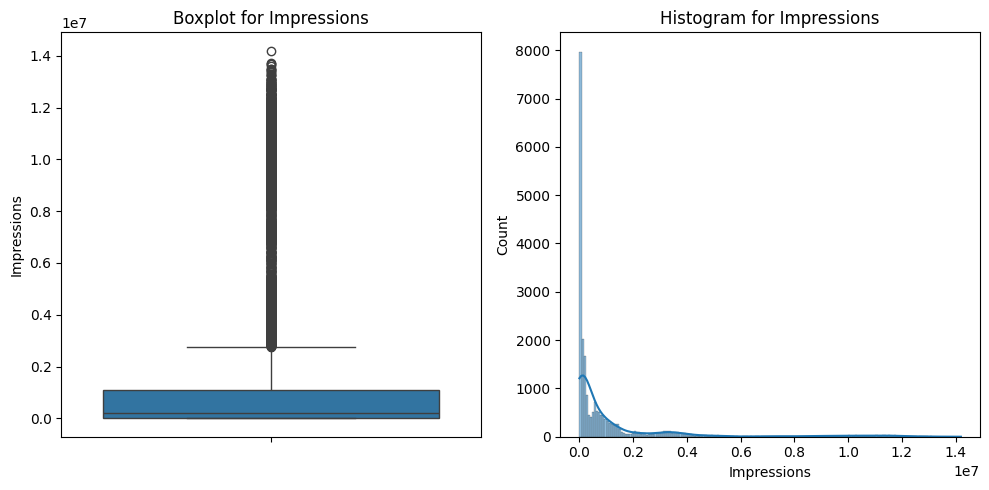

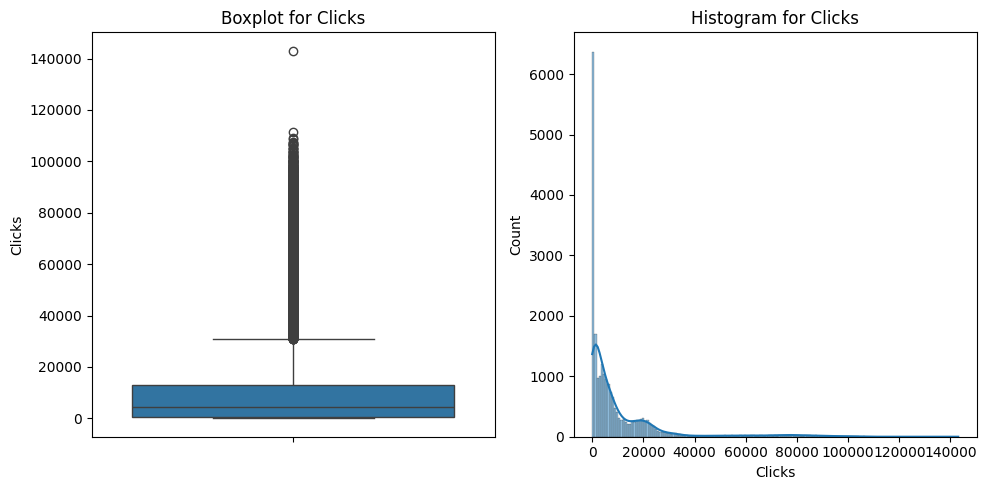

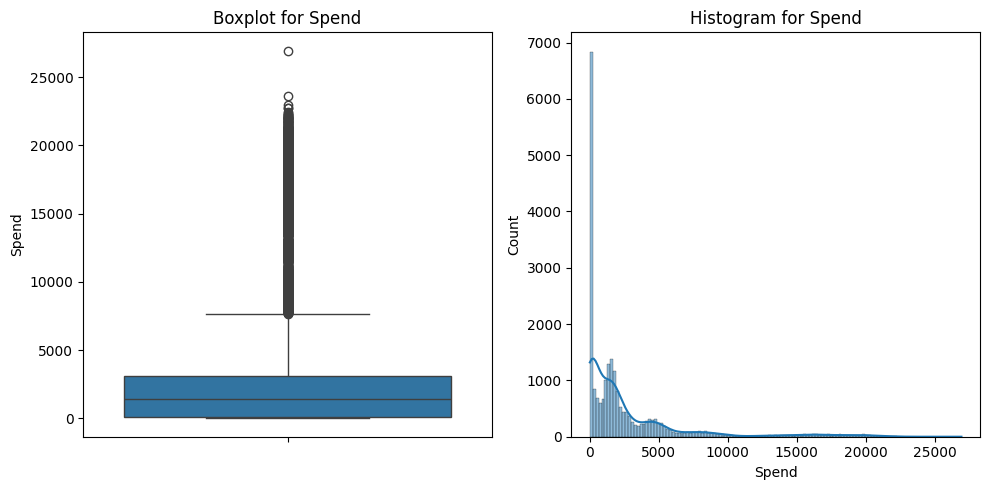

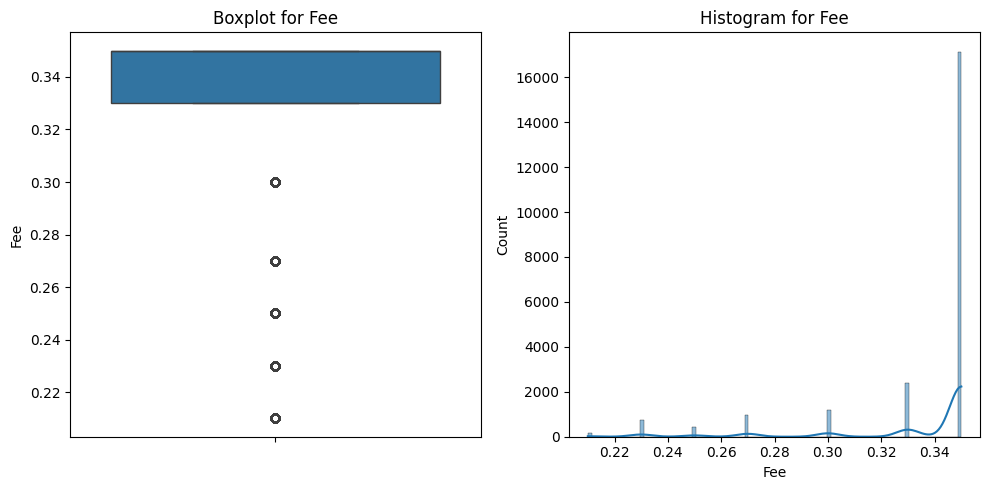

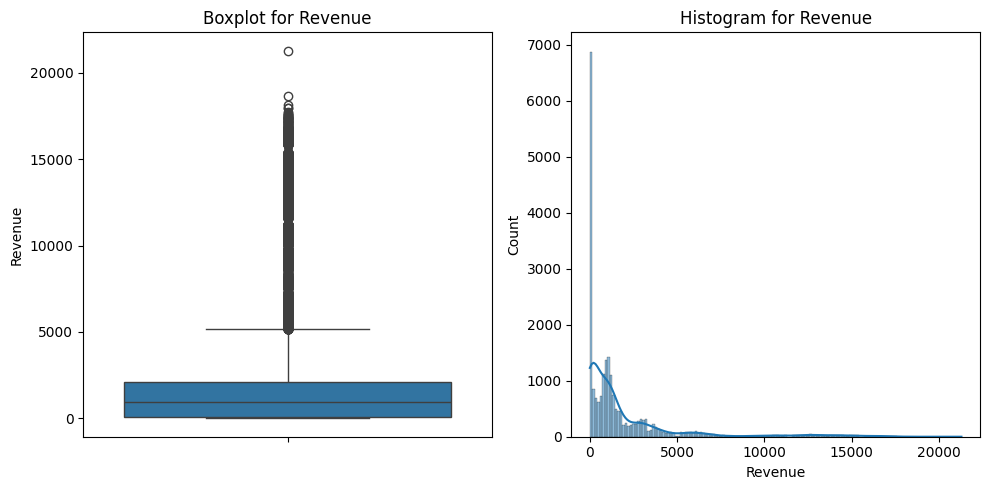

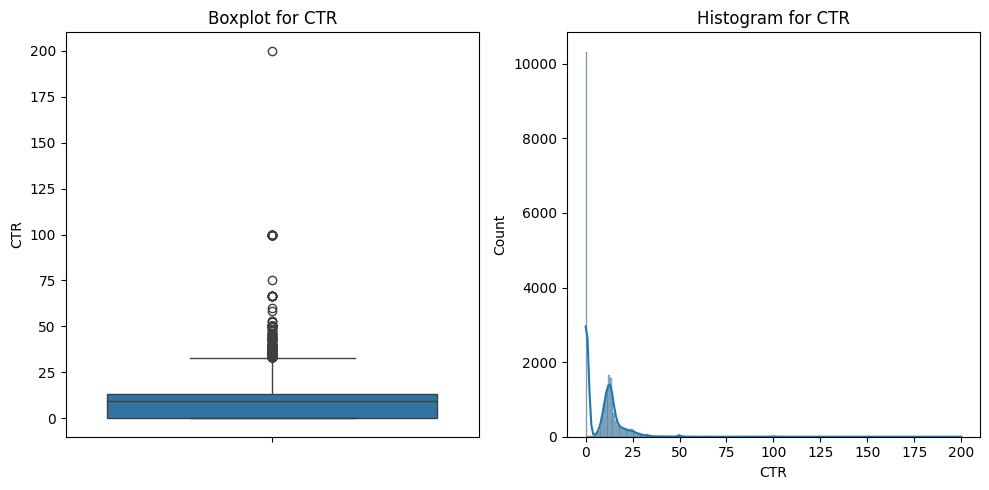

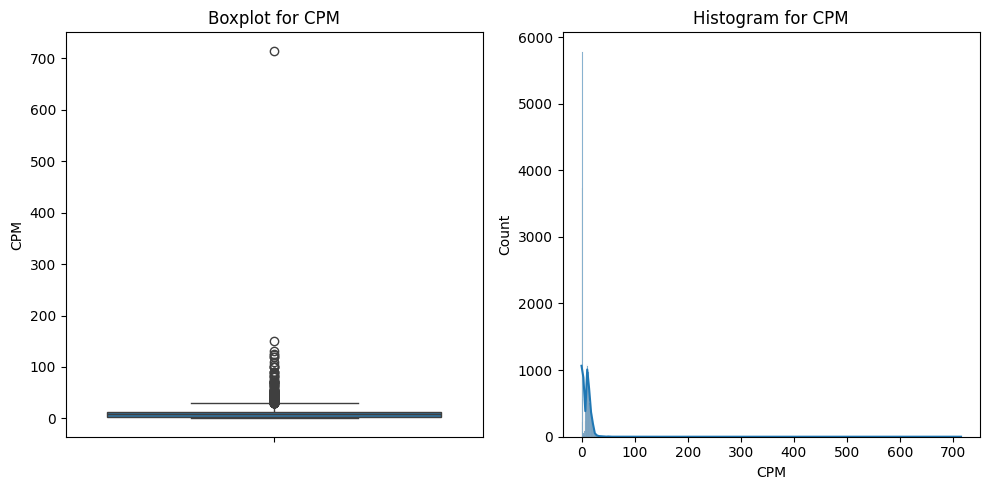

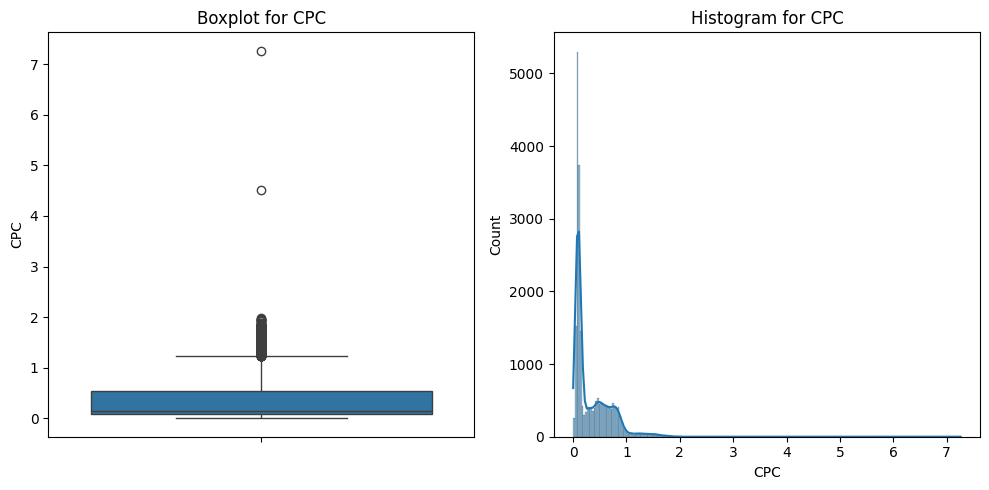

<Figure size 640x480 with 0 Axes>

In [17]:
list_columns = dfnum_ads.columns
for i in range(len(list_columns)):
    plt.figure(figsize=(10, 5))  # Set the figure size for better visibility
    plt.subplot(1, 2, 1)  # Define the first subplot for the boxplot
    plt.title('Boxplot for {}'.format(list_columns[i]))
    sns.boxplot(y=dfnum_ads[list_columns[i]])  # Use 'y' to specify the vertical boxplot

    plt.subplot(1, 2, 2)  # Define the second subplot for the histogram
    plt.title('Histogram for {}'.format(list_columns[i]))
    sns.histplot(dfnum_ads[list_columns[i]], kde=True)  # Added KDE (Kernel Density Estimate) for smoothness

    plt.tight_layout()  # Adjust subplots to fit into the figure area.
    plt.show()# Display the plots
plt.savefig("box1.jpg")

In [18]:
for column in dfnum_ads.select_dtypes(include=np.number).columns:
    
    q1 = dfnum_ads[column].quantile(0.25)
    q3 = dfnum_ads[column].quantile(0.75)
    IQR = q3 - q1
    
    uplim = q3 + (1.5 * IQR)
    lowlim = q1 - (1.5 * IQR)
    
    dfnum_ads[column] = np.where(dfnum_ads[column] < lowlim, lowlim, dfnum_ads[column])
    dfnum_ads[column] = np.where(dfnum_ads[column] > uplim, uplim, dfnum_ads[column])

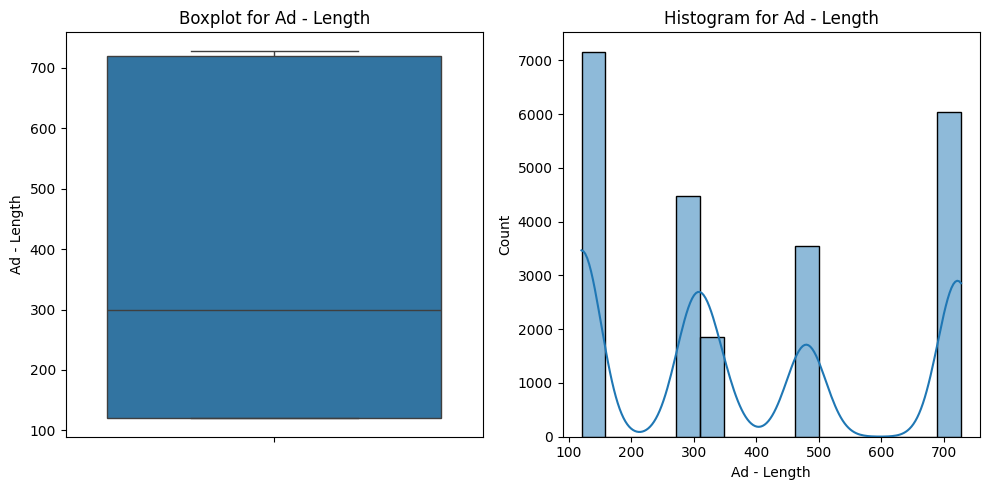

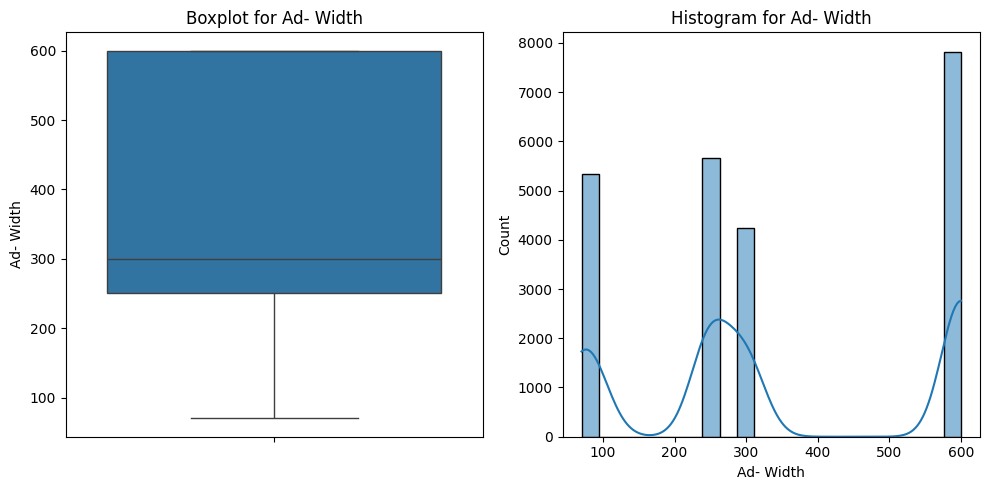

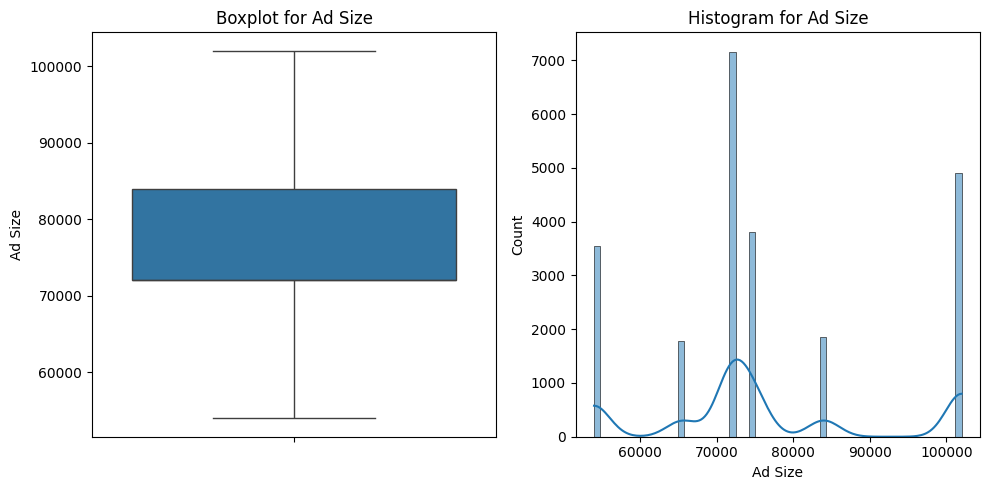

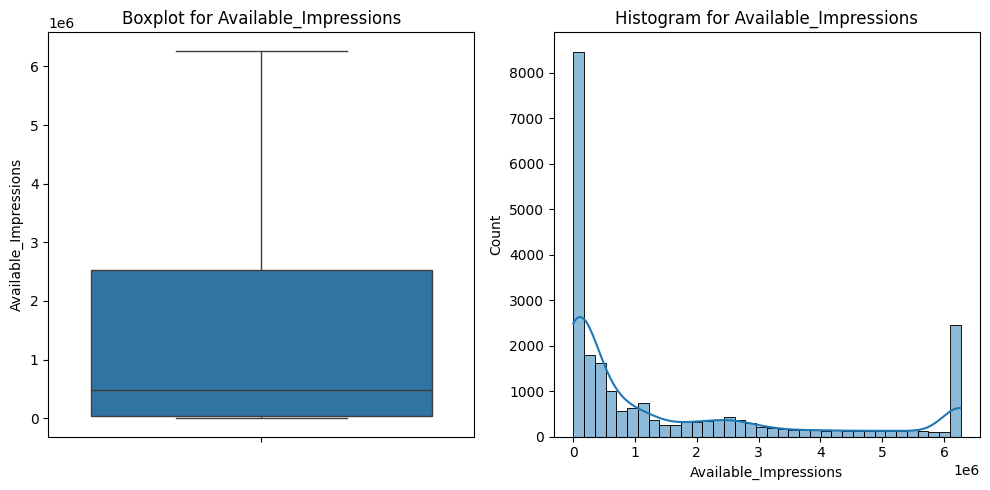

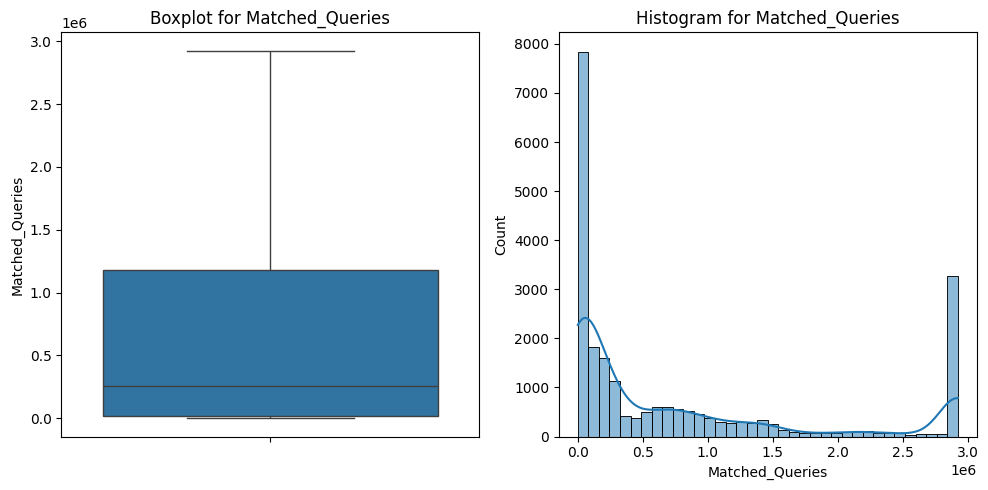

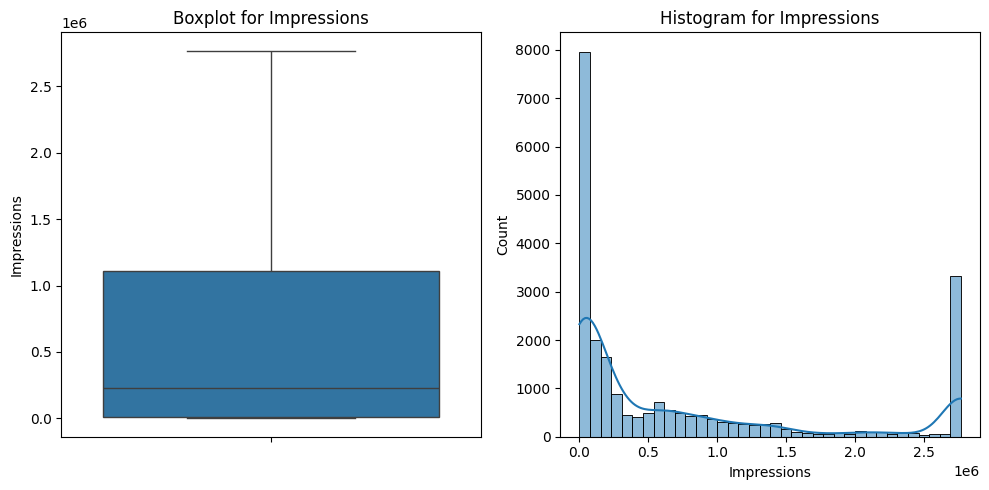

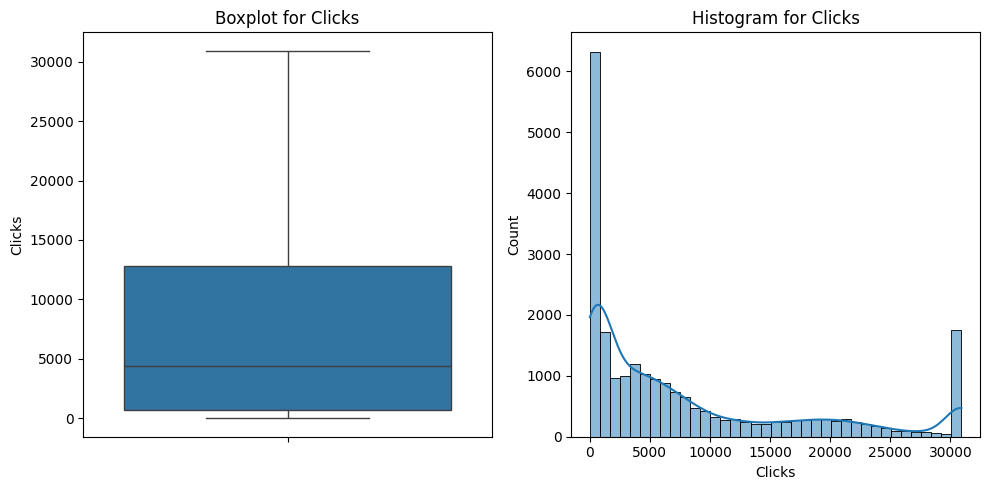

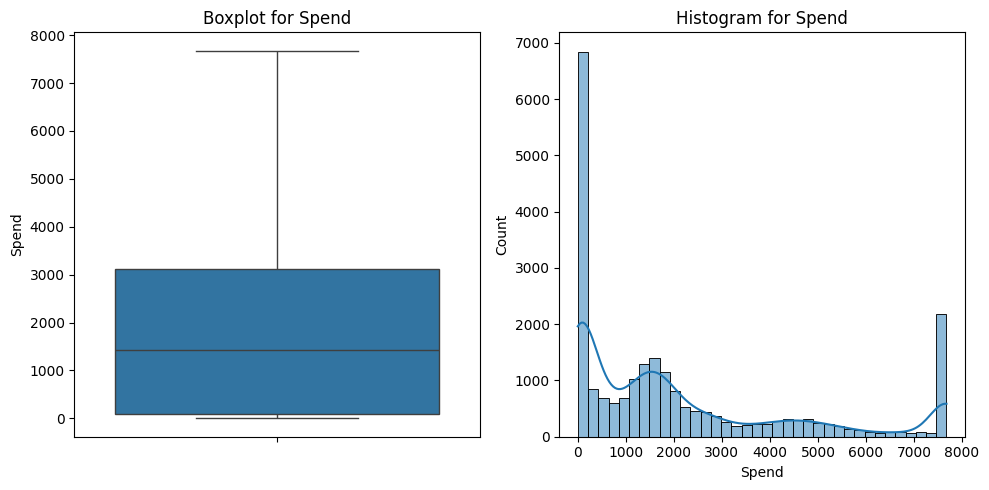

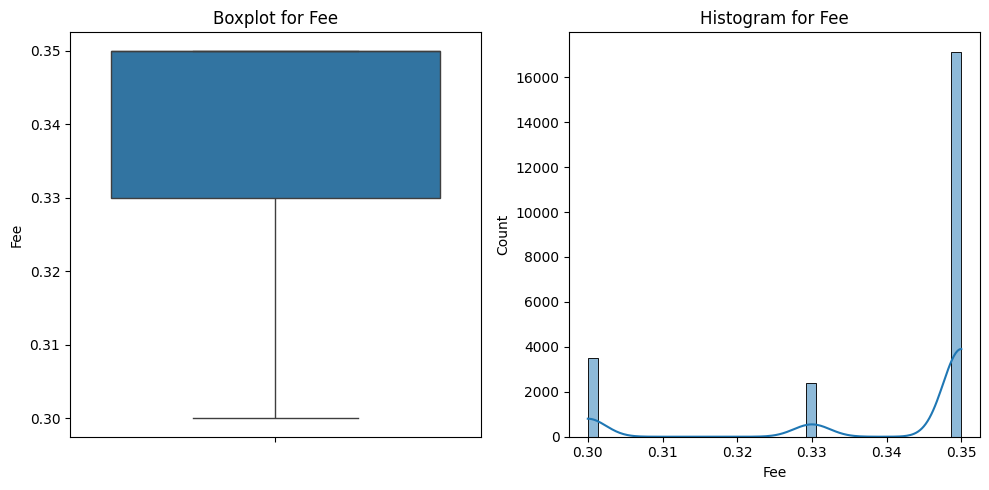

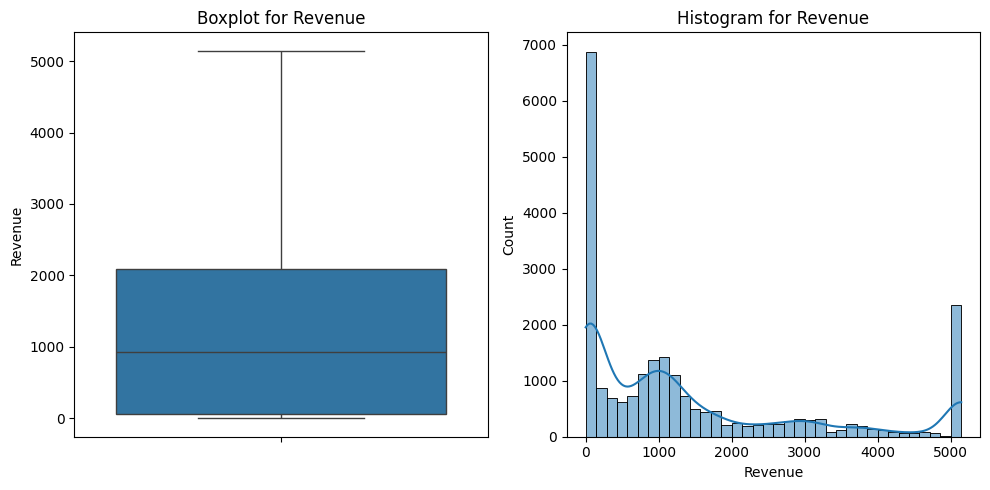

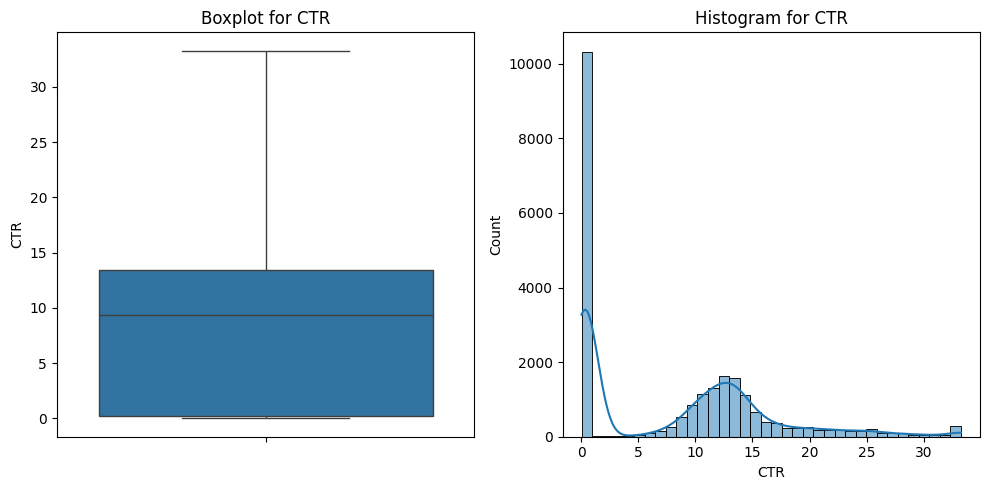

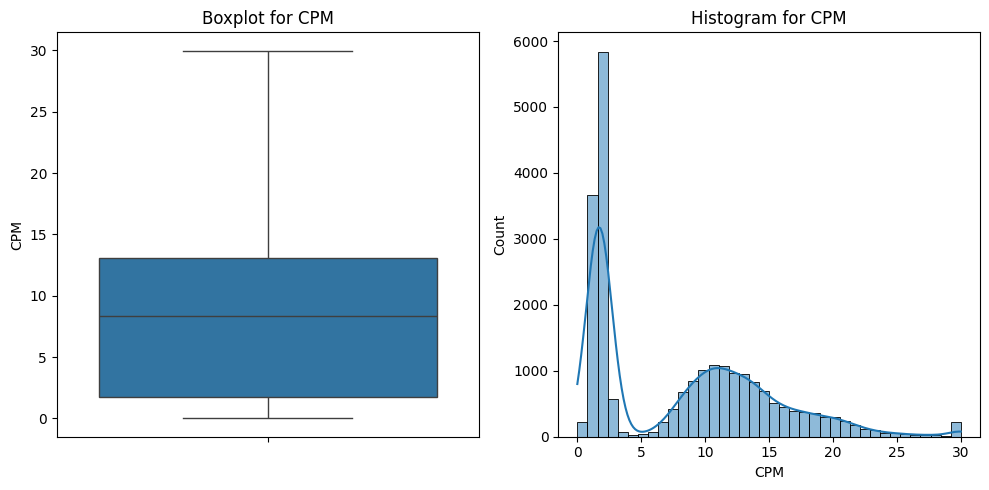

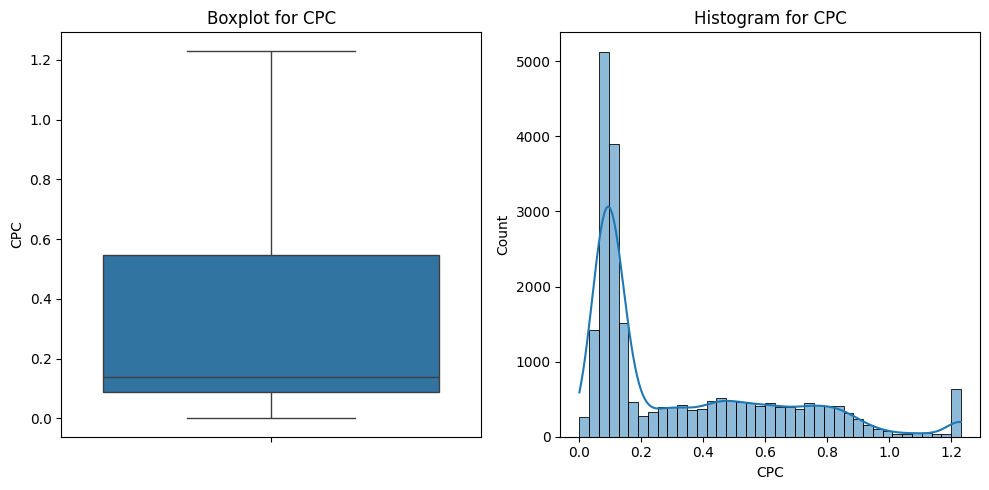

<Figure size 640x480 with 0 Axes>

In [89]:
list_columns = dfnum_ads.columns
for i in range(len(list_columns)):
    plt.figure(figsize=(10, 5))  # Set the figure size for better visibility
    plt.subplot(1, 2, 1)  # Define the first subplot for the boxplot
    plt.title('Boxplot for {}'.format(list_columns[i]))
    sns.boxplot(y=dfnum_ads[list_columns[i]])  # Use 'y' to specify the vertical boxplot

    plt.subplot(1, 2, 2)  # Define the second subplot for the histogram
    plt.title('Histogram for {}'.format(list_columns[i]))
    sns.histplot(dfnum_ads[list_columns[i]], kde=True)  # Added KDE (Kernel Density Estimate) for smoothness

    plt.tight_layout()  # Adjust subplots to fit into the figure area.
    plt.show()
plt.savefig("box2.jpg")

BIVARIATE ANALYSIS FOR NUMERICAL VARIABLES:

We use pairplot and heatmap as shown in below code lines for the analysis and can see few correationship between some variables.

<Figure size 2500x1500 with 0 Axes>

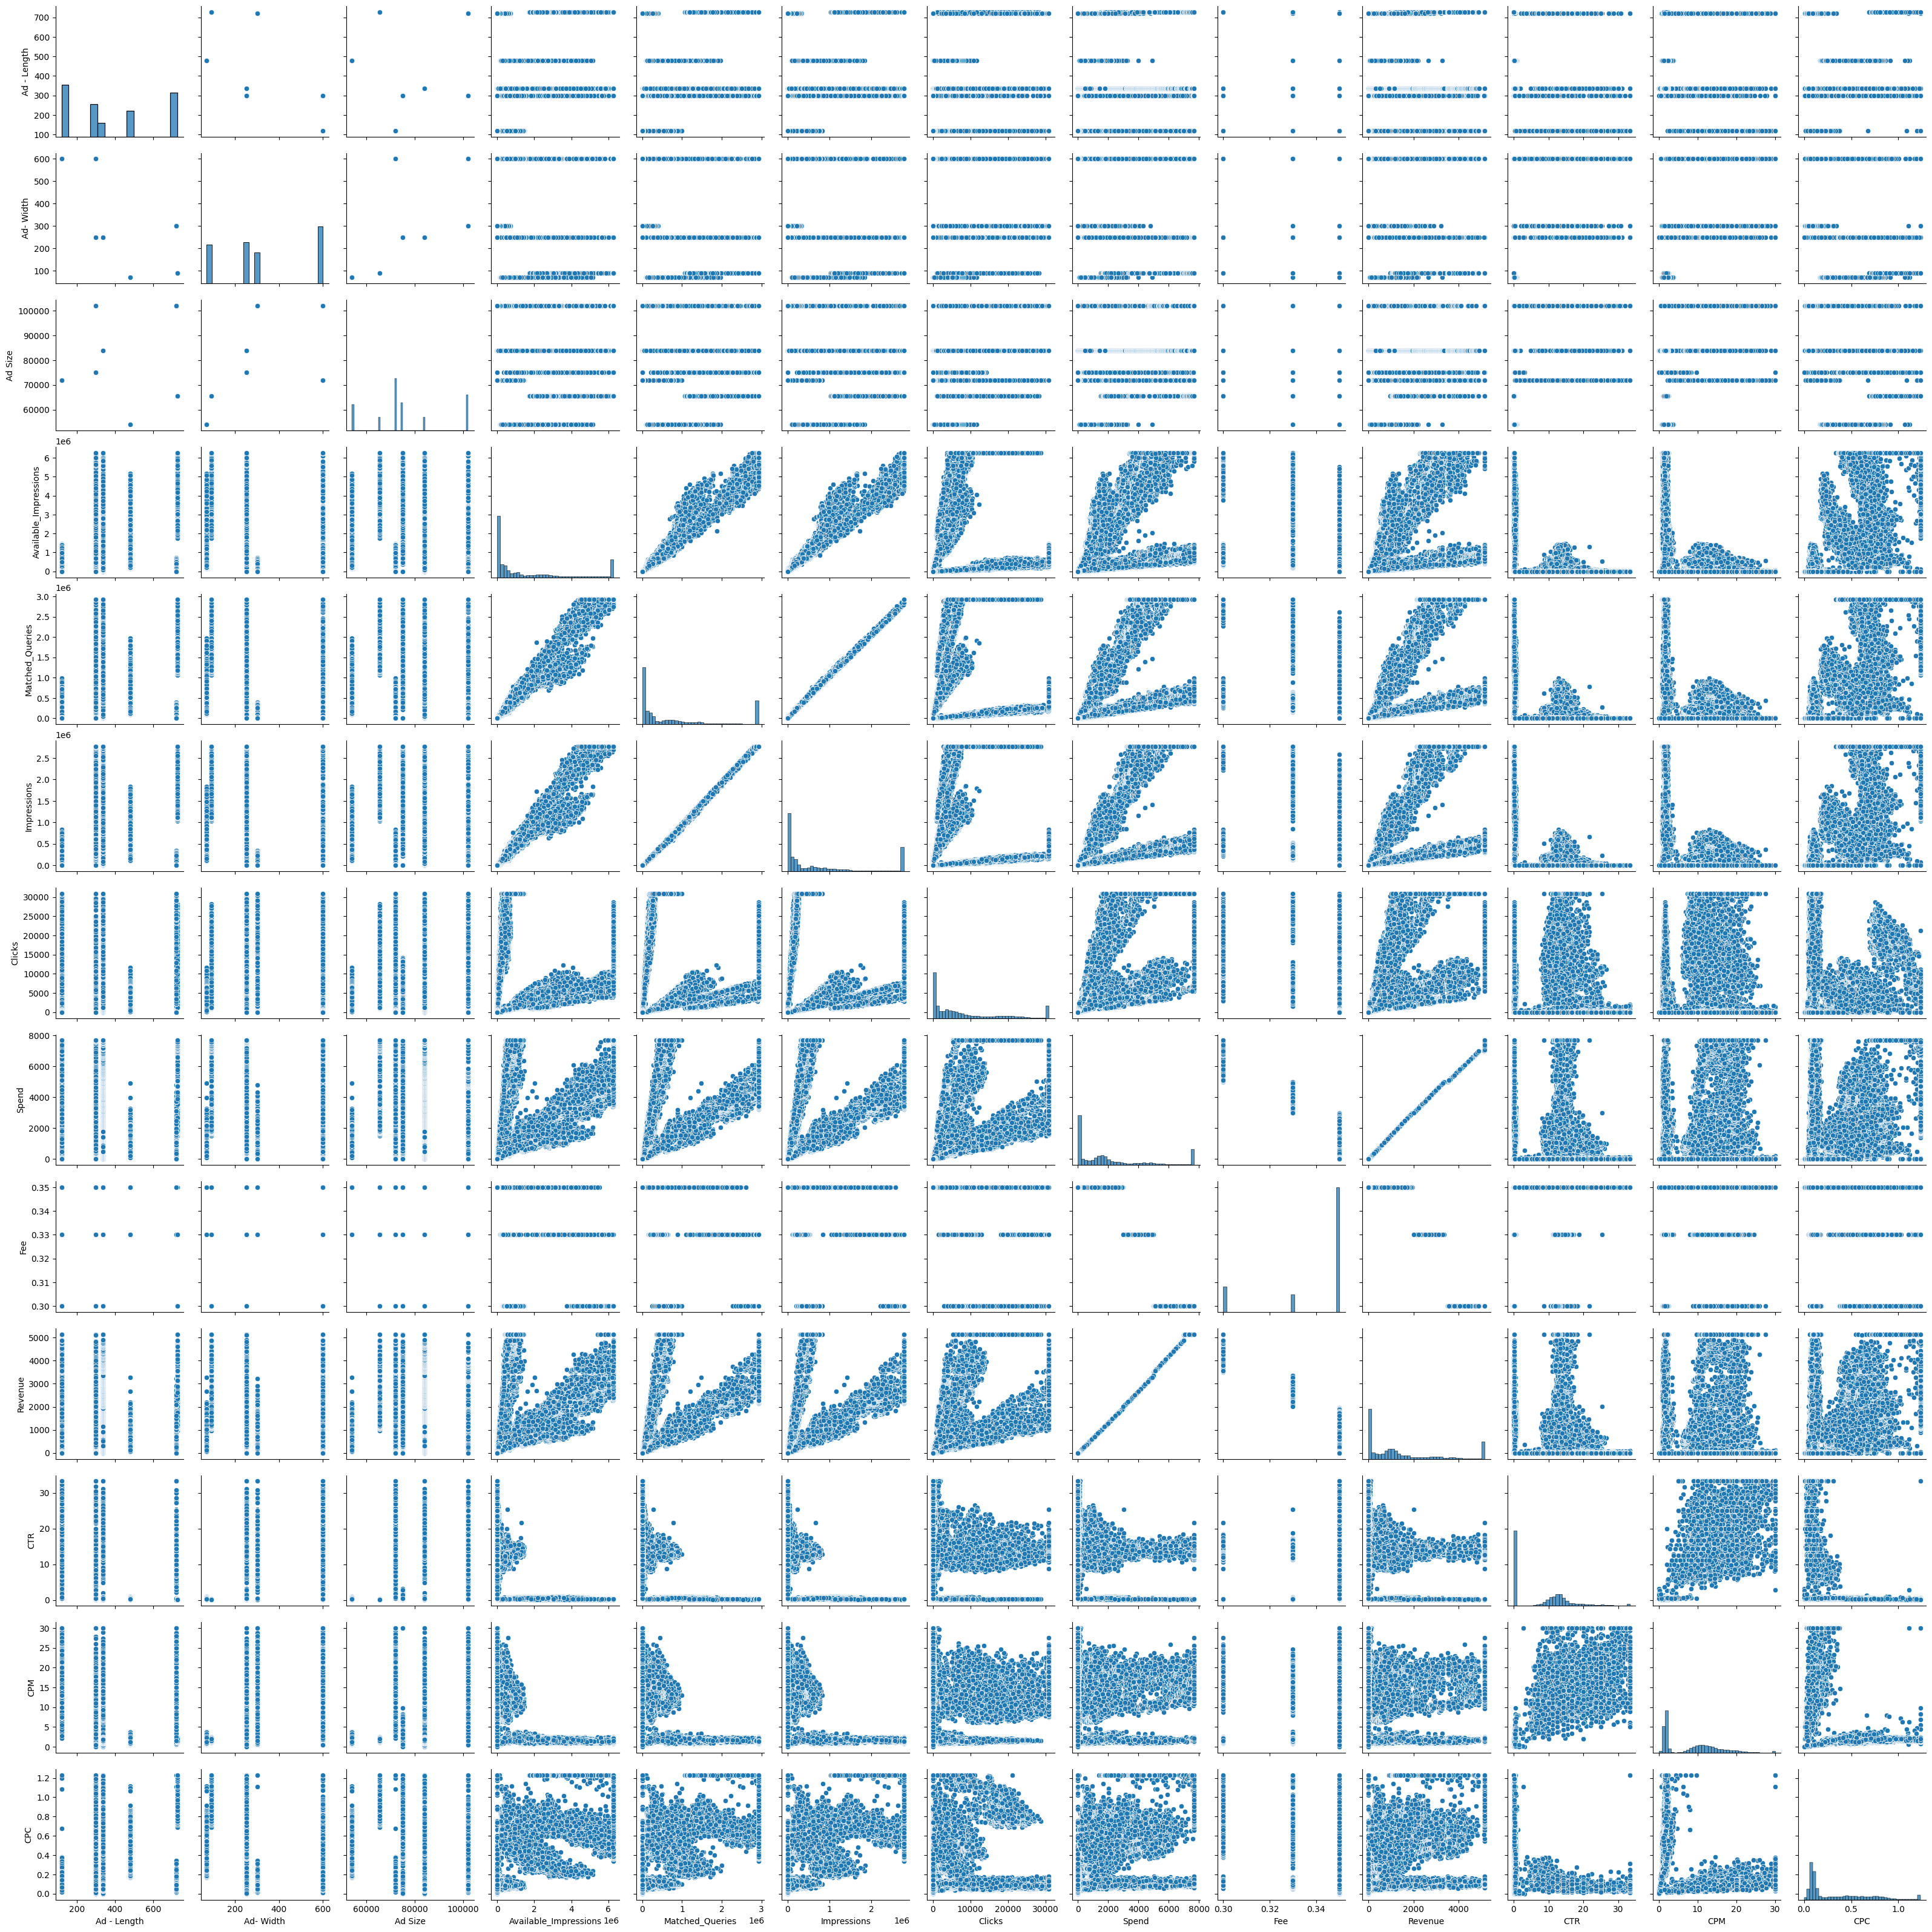

In [20]:
plt.figure(figsize=(25,15))
sns.pairplot(data=dfnum_ads);
plt.savefig("pair1.jpg")

In [21]:
dfnum_ads.corr()

Ad - Length  Ad- Width   Ad Size  \
Ad - Length               1.000000  -0.705374  0.348822   
Ad- Width                -0.705374   1.000000  0.240638   
Ad Size                   0.348822   0.240638  1.000000   
Available_Impressions     0.224171  -0.514941 -0.272548   
Matched_Queries           0.200503  -0.490146 -0.250115   
Impressions               0.199011  -0.493003 -0.250541   
Clicks                    0.232668   0.008868  0.260183   
Spend                     0.161879  -0.245489 -0.123840   
Fee                      -0.030494   0.093647  0.133452   
Revenue                   0.152370  -0.236385 -0.124094   
CTR                      -0.257570   0.687210  0.381922   
CPM                      -0.298017   0.703441  0.342674   
CPC                       0.244405  -0.573376 -0.344699   

                       Available_Impressions  Matched_Queries  Impressions  \
Ad - Length                         0.224171         0.200503     0.199011   
Ad- Width                          -0.514941        -0.490146    -0.493003   
Ad Size                            -0.272548        -0.250115    -0.250541   
Available_Impressions               1.000000         0.988247     0.987382   
Matched_Queries                     0.988247         1.000000     0.999676   
Impressions                         0.987382         0.999676     1.000000   
Clicks                              0.164237         0.179638     0.163733   
Spend                               0.738558         0.765394     0.754543   
Fee                                -0.663544        -0.687960    -0.676885   
Revenue                             0.735510         0.762708     0.751754   
CTR                                -0.645191        -0.642369    -0.645867   
CPM                                -0.639119        -0.628884    -0.633446   
CPC                                 0.719956         0.749031     0.754951   

                         Clicks     Spend       Fee   Revenue       CTR  \
Ad - Length            0.232668  0.161879 -0.030494  0.152370 -0.257570   
Ad- Width              0.008868 -0.245489  0.093647 -0.236385  0.687210   
Ad Size                0.260183 -0.123840  0.133452 -0.124094  0.381922   
Available_Impressions  0.164237  0.738558 -0.663544  0.735510 -0.645191   
Matched_Queries        0.179638  0.765394 -0.687960  0.762708 -0.642369   
Impressions            0.163733  0.754543 -0.676885  0.751754 -0.645867   
Clicks                 1.000000  0.670206 -0.556608  0.668093  0.066234   
Spend                  0.670206  1.000000 -0.929353  0.999566 -0.367951   
Fee                   -0.556608 -0.929353  1.000000 -0.936972  0.242887   
Revenue                0.668093  0.999566 -0.936972  1.000000 -0.361862   
CTR                    0.066234 -0.367951  0.242887 -0.361862  1.000000   
CPM                    0.118054 -0.290215  0.180237 -0.284358  0.871666   
CPC                   -0.096380  0.504029 -0.414817  0.498620 -0.723334   

                            CPM       CPC  
Ad - Length           -0.298017  0.244405  
Ad- Width              0.703441 -0.573376  
Ad Size                0.342674 -0.344699  
Available_Impressions -0.639119  0.719956  
Matched_Queries       -0.628884  0.749031  
Impressions           -0.633446  0.754951  
Clicks                 0.118054 -0.096380  
Spend                 -0.290215  0.504029  
Fee                    0.180237 -0.414817  
Revenue               -0.284358  0.498620  
CTR                    0.871666 -0.723334  
CPM                    1.000000 -0.662922  
CPC                   -0.662922  1.000000

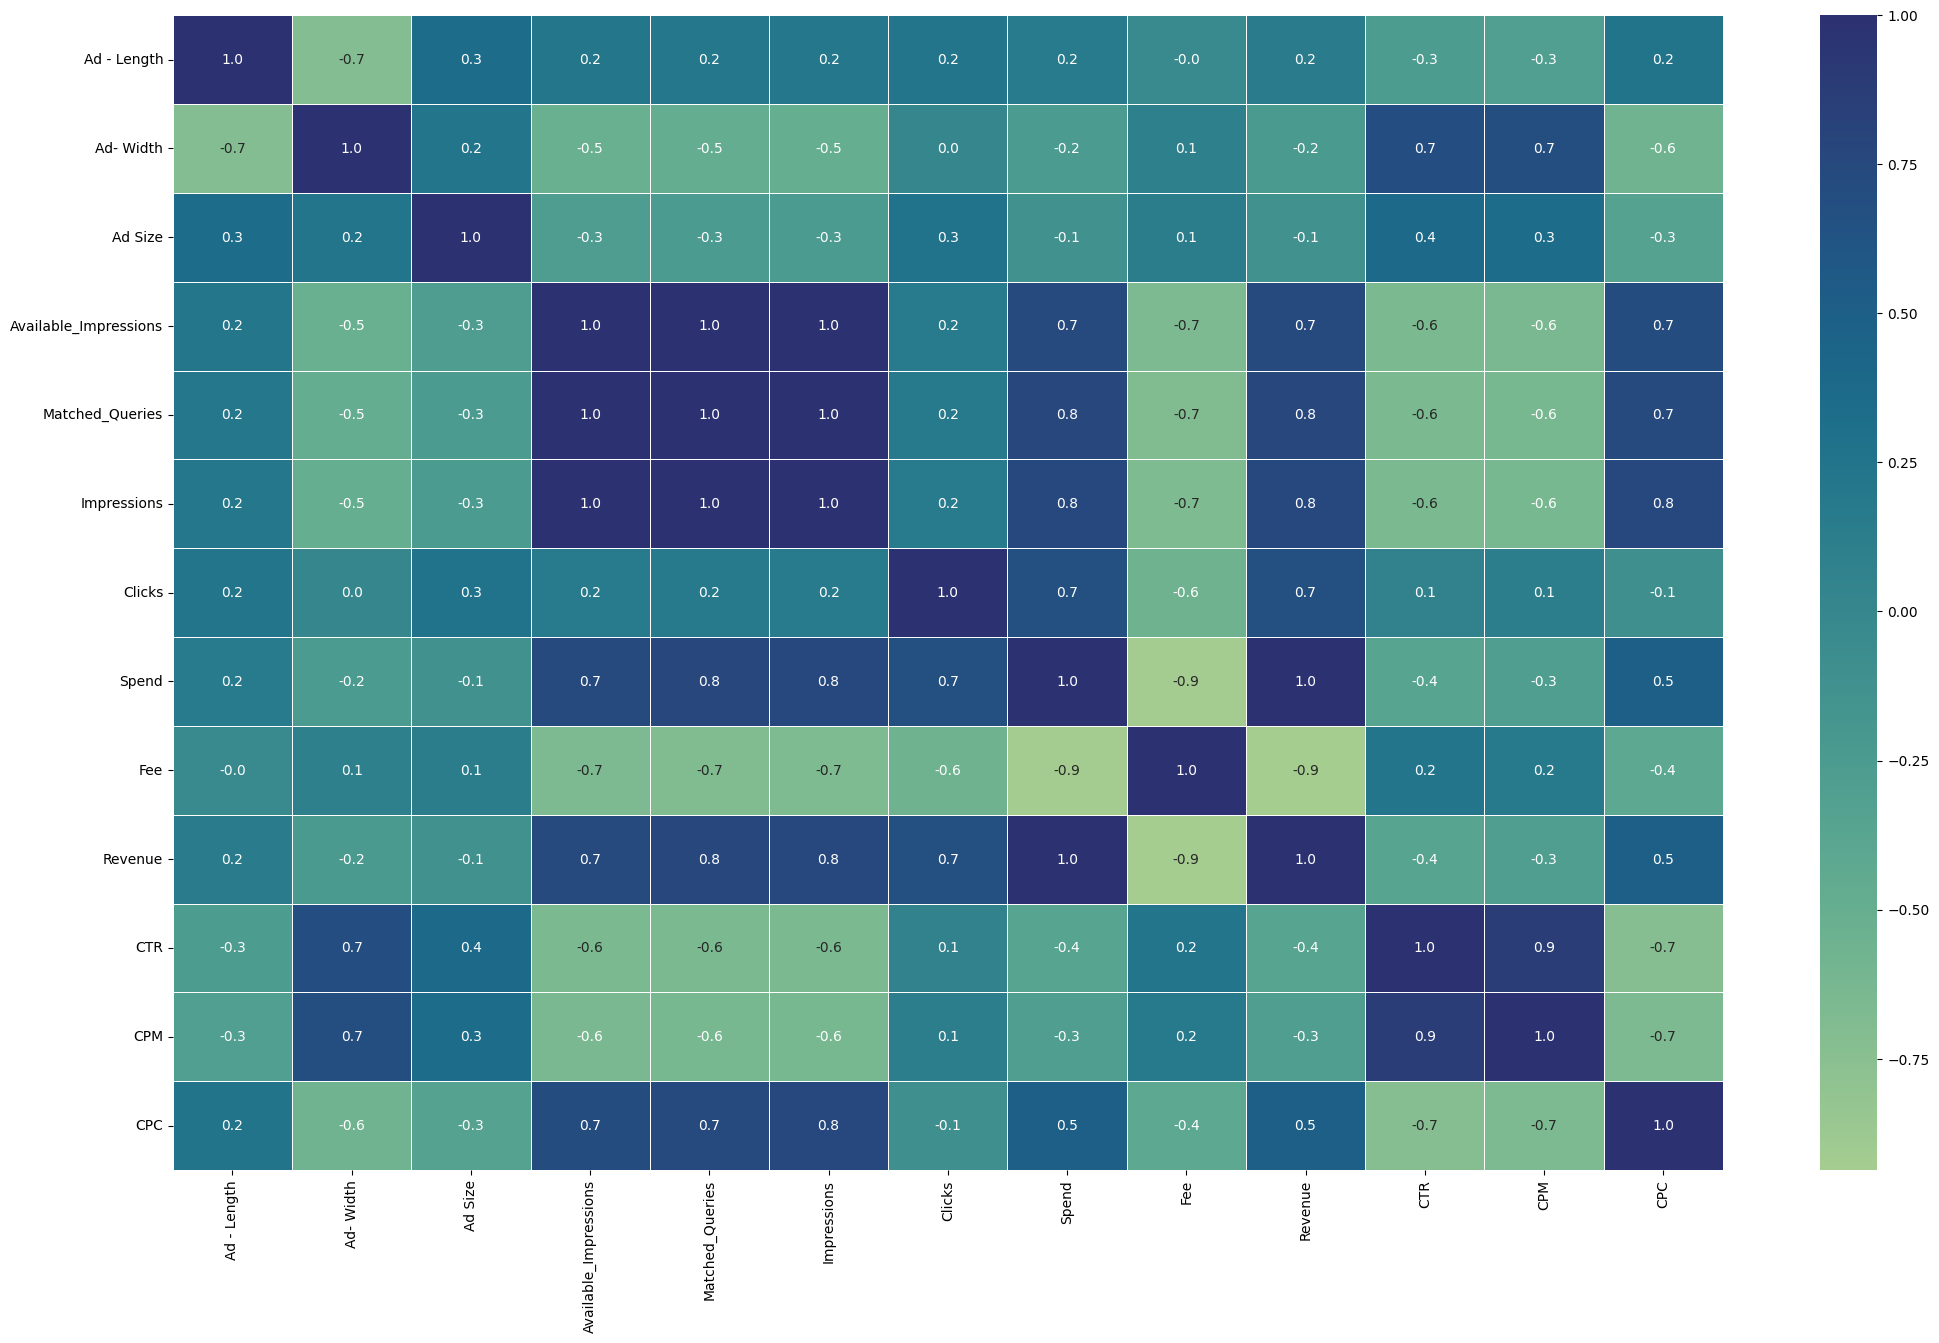

In [22]:
plt.figure(figsize=(25,15))
sns.heatmap(dfnum_ads.corr(),annot= True,fmt=".1f",linewidth=.5,cmap="crest")
plt.savefig("h1.jpg")

From the heatmap and pairplot we can see that are some strong correationship between Revenue and spend, CPM and CTR, Impression and Matched queries etc.

Now, we will scale the data as shown in the below code and then use ward linkage and Euclidean distance method to create a dendrogram with p = 10 value.

In [23]:
X= StandardScaler()
scaled_ads = pd.DataFrame(X.fit_transform(dfnum_ads),columns = dfnum_ads.columns)
scaled_ads.head()

Ad - Length  Ad- Width   Ad Size  Available_Impressions  Matched_Queries  \
0    -0.364496  -0.432797 -0.102518              -0.755333        -0.778949   
1    -0.364496  -0.432797 -0.102518              -0.755345        -0.778988   
2    -0.364496  -0.432797 -0.102518              -0.754900        -0.778919   
3    -0.364496  -0.432797 -0.102518              -0.755040        -0.778781   
4    -0.364496  -0.432797 -0.102518              -0.755610        -0.779030   

   Impressions    Clicks    Spend       Fee   Revenue       CTR       CPM  \
0    -0.768478 -0.867488 -0.89317  0.535724 -0.880093 -0.958836 -1.194498   
1    -0.768516 -0.867488 -0.89317  0.535724 -0.880093 -0.953835 -1.194498   
2    -0.768445 -0.867488 -0.89317  0.535724 -0.880093 -0.962218 -1.194498   
3    -0.768302 -0.867488 -0.89317  0.535724 -0.880093 -0.971871 -1.194498   
4    -0.768560 -0.867488 -0.89317  0.535724 -0.880093 -0.946281 -1.194498   

        CPC  
0 -1.042561  
1 -1.042561  
2 -1.042561  
3 -1.042561  
4 -1.042561

EFFECTS OF SCALING:

The influence of scaling on an algorithm’s efficiency is significant. Analyzing the dataset’s statistical summary reveals a broad spectrum of values, ranging from minimal to substantial. These values are not uniform in scale and carry varying degrees of significance, which underscores the necessity of scaling. 

Essentially, scaling standardizes the range of independent variables or features of data, ensuring that each feature contributes proportionately to the final prediction. This homogenization is crucial because it can impact the performance of many machine learning algorithms, particularly those that use distance calculations like k-nearest neighbors (k-NN) or gradient descent-based algorithms like linear regression. Without scaling, features with larger ranges could unduly influence the model, leading to biased results. 

Therefore, scaling helps to balance the contribution of each feature, facilitating a more accurate and fair evaluation by the algorithm.

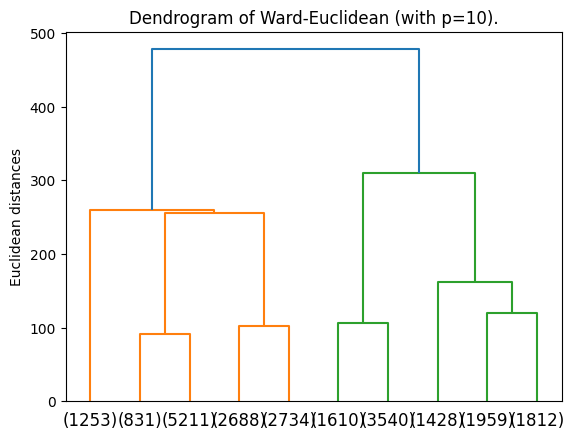

In [24]:
ward_eucli = linkage(scaled_ads, 'ward', metric='euclidean');
dendrogram(ward_eucli, truncate_mode='lastp',p=10);
plt.title("Dendrogram of Ward-Euclidean (with p=10).")
plt.ylabel('Euclidean distances')
plt.savefig("dendro1.jpg")

Now will find the optimum K value for Kmean Clustering as seen in the below code lines.

In [25]:
wss=[]

for i in range(1,11):
    kmean = KMeans(n_clusters=i, random_state=123)
    kmean.fit(scaled_ads)
    wss.append(kmean.inertia_)

wss

[299858.0000000002,
 183349.1020288608,
 130878.3499986303,
 95133.92787211957,
 61539.18919785385,
 51676.892307099595,
 44598.26211613912,
 39597.84594043494,
 36062.68301212528,
 32981.10668195729]

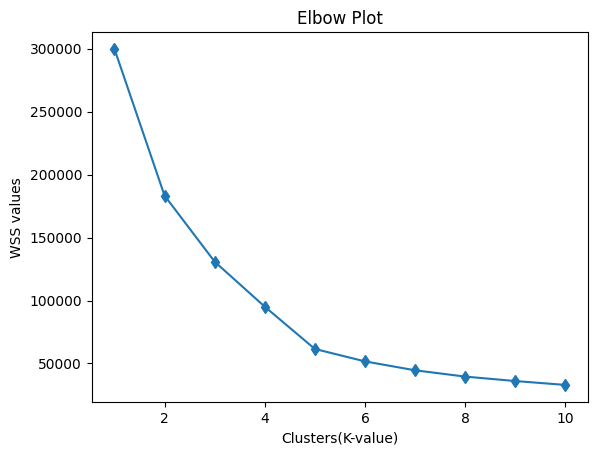

In [26]:
plt.plot(range(1,11),wss, marker = "d")
plt.title("Elbow Plot")
plt.xlabel("Clusters(K-value)")
plt.ylabel("WSS values")
plt.savefig("elbow1.jpg")

We will use silhouette score to find out the optimum number of clusters we need and as seen from below plot and silhouette score we can surely say that the number of cluster for K Mean clustering is 5.

The Average Silhouette Score for 2 clusters is 0.38573
The Average Silhouette Score for 3 clusters is 0.38255
The Average Silhouette Score for 4 clusters is 0.44535
The Average Silhouette Score for 5 clusters is 0.5241
The Average Silhouette Score for 6 clusters is 0.52215
The Average Silhouette Score for 7 clusters is 0.51656
The Average Silhouette Score for 8 clusters is 0.47973
The Average Silhouette Score for 9 clusters is 0.43247
The Average Silhouette Score for 10 clusters is 0.43637


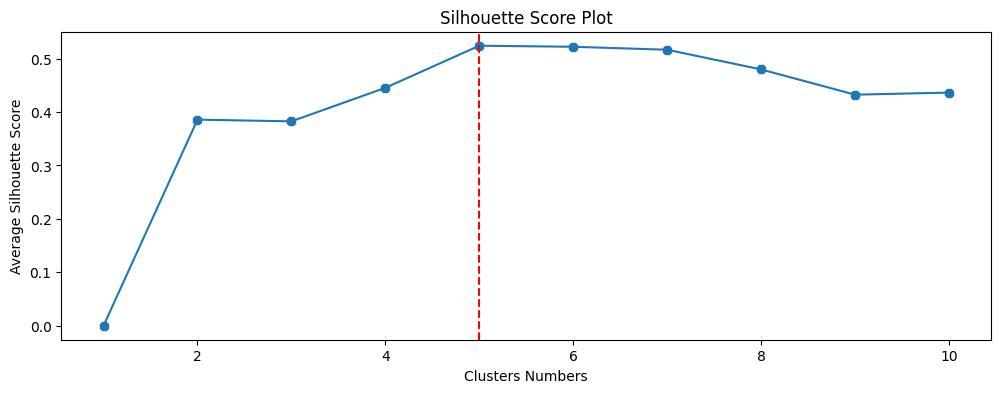

<Figure size 640x480 with 0 Axes>

In [29]:
#silhouette_score(scaled_ads,labels)
ss={1:0} 

for i in range(2,11): 
    clust = KMeans(n_clusters = i, init = 'k-means++',random_state=123) 
    y = clust.fit_predict(scaled_ads) 
    s = silhouette_score(scaled_ads, y ) 
    ss[i] = round(s,5)
    print("The Average Silhouette Score for {} clusters is {}".format(i,round(s,5)))

m_key= [key for key, value in ss.items() if value == max(ss.values())][0]
fig,ax = plt.subplots(figsize=(12,4)) 
plt.plot(list(ss.keys()),list(ss.values()),marker='8')
ax.axvline(x=m_key, color="red", linestyle="--")
plt.title('Silhouette Score Plot')
plt.xlabel('Clusters Numbers')
plt.ylabel('Average Silhouette Score') 
plt.show()
plt.savefig("ss1.jpg")

From the Elbow plot and WSS(within sum of square) we can conclude that the optimum value for cluster is 5.

Now, we Combine the two dataset that we divided for EDA and scaling and add a new column named Kmean_clusters in the dataset and then check using head function if it is added or not.

In [30]:
kmean= KMeans(n_clusters=5,random_state=123)
kmean.fit(scaled_ads)
labels = kmean.labels_

labels

array([2, 2, 2, ..., 0, 3, 0])

In [31]:
newdf_ads = pd.concat([dfnum_ads,dfcat_ads['Device Type']],axis=1)
newdf_ads['Kmean_clusters'] = labels
newdf_ads.head()

Ad - Length  Ad- Width  Ad Size  Available_Impressions  Matched_Queries  \
0        300.0      250.0  75000.0                 1806.0            325.0   
1        300.0      250.0  75000.0                 1780.0            285.0   
2        300.0      250.0  75000.0                 2727.0            356.0   
3        300.0      250.0  75000.0                 2430.0            497.0   
4        300.0      250.0  75000.0                 1218.0            242.0   

   Impressions  Clicks  Spend   Fee  Revenue       CTR  CPM  CPC Device Type  \
0        323.0     1.0    0.0  0.35      0.0  0.309598  0.0  0.0     Desktop   
1        285.0     1.0    0.0  0.35      0.0  0.350877  0.0  0.0      Mobile   
2        355.0     1.0    0.0  0.35      0.0  0.281690  0.0  0.0     Desktop   
3        495.0     1.0    0.0  0.35      0.0  0.202020  0.0  0.0      Mobile   
4        242.0     1.0    0.0  0.35      0.0  0.413223  0.0  0.0     Desktop   

   Kmean_clusters  
0               2  
1               2  
2               2  
3               2  
4               2

In [32]:
newdf_ads.Kmean_clusters.value_counts().sort_values()

Kmean_clusters
4    1537
1    4054
0    4676
2    6275
3    6524
Name: count, dtype: int64

In [33]:
newdf_ads.groupby(['Kmean_clusters','Device Type']).mean()[['Clicks','Spend','Revenue','CPM','CTR','CPC']]

Clicks        Spend      Revenue        CPM  \
Kmean_clusters Device Type                                                      
0              Desktop      14285.340569  1251.027671   814.675848  11.668965   
               Mobile       14039.465777  1252.984401   816.022933  11.762093   
1              Desktop      11312.535836  5717.075160  3864.629505   1.561860   
               Mobile       11207.966396  5751.919293  3886.737602   1.579743   
2              Desktop       3267.725314  1495.319825   974.211859   1.789589   
               Mobile        3260.603163  1502.717003   979.192636   1.788258   
3              Desktop       1950.679487   209.291786   136.091814  14.345118   
               Mobile        1894.185946   209.090363   135.938327  14.321643   
4              Desktop      30605.904847  6544.608151  4469.211580  15.431593   
               Mobile       30553.418622  6547.376388  4473.233714  15.359699   

                                  CTR       CPC  
Kmean_clusters Device Type                       
0              Desktop      13.304351  0.089394  
               Mobile       13.281544  0.090356  
1              Desktop       0.217558  0.742680  
               Mobile        0.217063  0.752105  
2              Desktop       0.408147  0.523373  
               Mobile        0.402325  0.530747  
3              Desktop      15.851815  0.102897  
               Mobile       15.746764  0.102689  
4              Desktop      13.793226  0.111911  
               Mobile       13.729611  0.111922

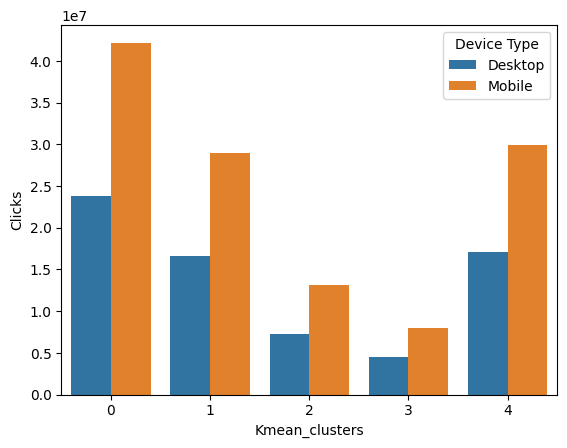

In [35]:
df_1 = newdf_ads.groupby(['Kmean_clusters', 'Device Type']).agg(Clicks=("Clicks", 'sum'))
df_1=df_1.reset_index()
sns.barplot(df_1,x='Kmean_clusters',y='Clicks',hue='Device Type');
plt.savefig("bar1.jpg")

#newdf_ads.groupby(['Kmean_clusters','Device Type'])['Clicks'].sum().plot(kind='bar')
#ad_data_new.groupby(['Clusters','Device Type']).sum()['Spend'].plot(kind='bar',figsize=(10,5),color='green')

From the above graph we can say that the max numbersof clicks from first cluster followed by fifth, then second and at last third and fourth for both the Device types.

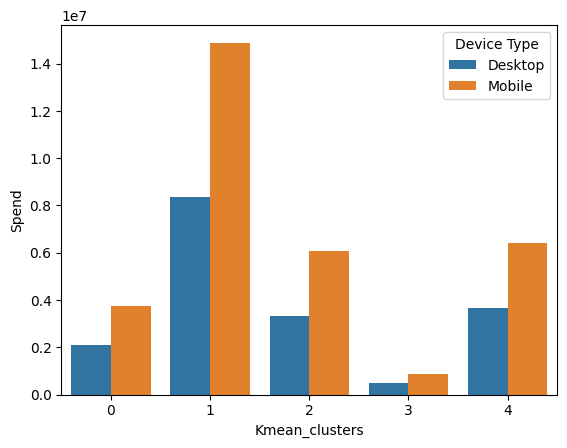

In [36]:
df_2 = newdf_ads.groupby(['Kmean_clusters', 'Device Type']).agg(Spend=("Spend", 'sum'))
df_2=df_2.reset_index()
sns.barplot(df_2,x='Kmean_clusters',y='Spend',hue='Device Type');
plt.savefig("bar2.jpg")

From the above we can conclude that for both the devices the most us spend by second cluster then fifth cluster and the least was seen in fourth cluster.

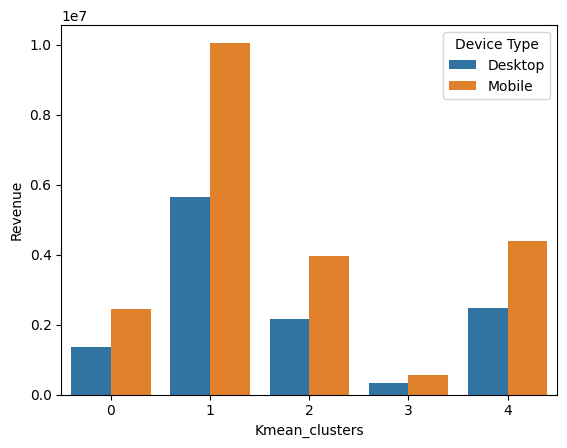

In [37]:
df_3 = newdf_ads.groupby(['Kmean_clusters', 'Device Type']).agg(Revenue=("Revenue", 'sum'))
df_3=df_3.reset_index()
sns.barplot(df_3,x='Kmean_clusters',y='Revenue',hue='Device Type');
plt.savefig("bar3.jpg")

From the above plot we conclude that that second cluster has the most revenue and followed by fifth and the least revenue us seen in cluster four.

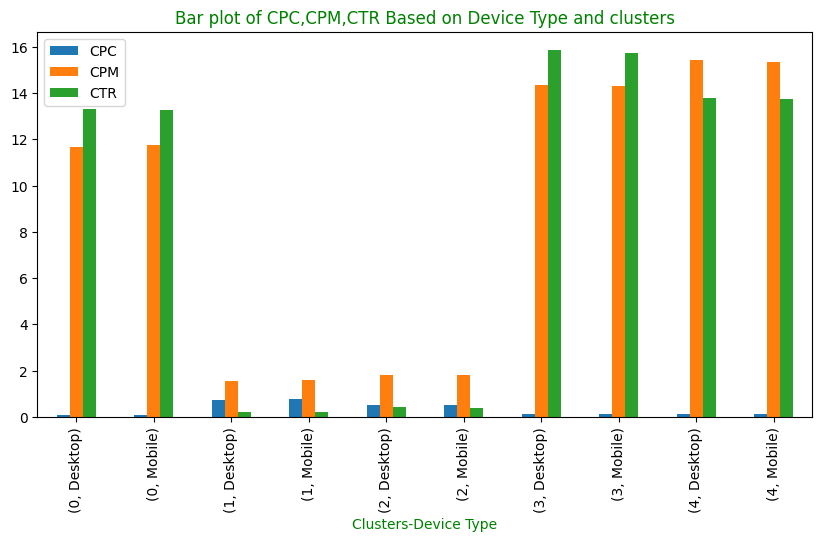

In [38]:
newdf_ads.groupby(['Kmean_clusters','Device Type']).mean()[['CPC','CPM','CTR']].plot(kind='bar',figsize=(10,5))
plt.title("Bar plot of CPC,CPM,CTR Based on Device Type and clusters",color='green')
plt.xlabel("Clusters-Device Type",color='green')
plt.savefig("bar4.jpg")

CPM is hight for cluster 3 and low for cluster 1.
CPC is hight for cluster 1 and low or negligible for cluster 3 and 4.
CTR is high for cluster 3 and low for cluster 1.

-------------
# PROBLEM-2:
-------------
Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household. The Indian Census has the reputation of being one of the best in the world. The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990.

You are tasked to perform detailed EDA and identify Optimum Principal Components that explains the most variance in data.

First of all we will load the excel dataset that is needed using read_excel function and then use head and tail function to find out about the dataset values. We will also use shape, isnull, duplicate, describe functions. 

In [39]:
df_census = pd.read_excel("PCA+India+Data_Census.xlsx")
df_census.head()

State Code  Dist.Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   
3           1          4  Jammu & Kashmir       Kargil   1320   2784   4206   
4           1          5  Jammu & Kashmir        Punch  11654  20591  29981   

   M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  \
0  5862  6196     3  ...           1150            749            180   
1  4482  3733     7  ...            525            715            123   
2  1082  1018     3  ...            114            188             44   
3   563   677     0  ...            194            247             61   
4  5157  4587    20  ...            874           1928            465   

   MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
0            237            680            252             32             46   
1            229            186            148             76            178   
2             89              3             34              0              4   
3            128             13             50              4             10   
4           1043            205            302             24            105   

   NON_WORK_M  NON_WORK_F  
0         258         214  
1         140         160  
2          67          61  
3         116          59  
4         180         478  

[5 rows x 61 columns]

In [40]:
df_census.tail()

State Code  Dist.Code                     State                Area Name  \
635          34        636                Puducherry                     Mahe   
636          34        637                Puducherry                 Karaikal   
637          35        638  Andaman & Nicobar Island                 Nicobars   
638          35        639  Andaman & Nicobar Island  North  & Middle Andaman   
639          35        640  Andaman & Nicobar Island            South Andaman   

     No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
635   3333   8154  11781  1146  1203    21  ...             32             47   
636  10612  12346  21691  1544  1533  2234  ...            155            337   
637   1275   1549   2630   227   225     0  ...            104            134   
638   3762   5200   8012   723   664     0  ...            136            172   
639   7975  11977  18049  1470  1358     0  ...            173            122   

     MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
635              0              0              0              0   
636              3             14             38            130   
637              9              4              2              6   
638             24             44             11             21   
639              6              2             17             17   

     MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
635              0              0          32          47  
636              4             23         110         170  
637             17             47          76          77  
638              1              4         100         103  
639              2              4         148          99  

[5 rows x 61 columns]

In [41]:
df_census.shape

(640, 61)

In [42]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [43]:
df_census.duplicated().sum()

0

In [44]:
df_census.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

We found there there no duplicated rows as well as no null values in the data set. We also found there are 59 integer datatype and 2 object datatype. and 640 rows and 60 columns.

Now, for further EDA we will add new column named Gender Ratio for better use in the dataset and check if it is added or not.

In [45]:
df_census['GenderRatio'] = (df_census.TOT_F)/(df_census.TOT_M)
df_census.head()

State Code  Dist.Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   
3           1          4  Jammu & Kashmir       Kargil   1320   2784   4206   
4           1          5  Jammu & Kashmir        Punch  11654  20591  29981   

   M_06  F_06  M_SC  ...  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  \
0  5862  6196     3  ...            749            180            237   
1  4482  3733     7  ...            715            123            229   
2  1082  1018     3  ...            188             44             89   
3   563   677     0  ...            247             61            128   
4  5157  4587    20  ...           1928            465           1043   

   MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  \
0            680            252             32             46         258   
1            186            148             76            178         140   
2              3             34              0              4          67   
3             13             50              4             10         116   
4            205            302             24            105         180   

   NON_WORK_F  GenderRatio  
0         214     1.273987  
1         160     1.179576  
2          61     1.674916  
3          59     1.510776  
4         478     1.456024  

[5 rows x 62 columns]

In [46]:
df_census.describe().T

count           mean            std         min           25%  \
State Code      640.0      17.114062       9.426486    1.000000      9.000000   
Dist.Code       640.0     320.500000     184.896367    1.000000    160.750000   
No_HH           640.0   51222.871875   48135.405475  350.000000  19484.000000   
TOT_M           640.0   79940.576563   73384.511114  391.000000  30228.000000   
TOT_F           640.0  122372.084375  113600.717282  698.000000  46517.750000   
M_06            640.0   12309.098438   11500.906881   56.000000   4733.750000   
F_06            640.0   11942.300000   11326.294567   56.000000   4672.250000   
M_SC            640.0   13820.946875   14426.373130    0.000000   3466.250000   
F_SC            640.0   20778.392188   21727.887713    0.000000   5603.250000   
M_ST            640.0    6191.807813    9912.668948    0.000000    293.750000   
F_ST            640.0   10155.640625   15875.701488    0.000000    429.500000   
M_LIT           640.0   57967.979688   55910.282466  286.000000  21298.000000   
F_LIT           640.0   66359.565625   75037.860207  371.000000  20932.000000   
M_ILL           640.0   21972.596875   19825.605268  105.000000   8590.000000   
F_ILL           640.0   56012.518750   47116.693769  327.000000  22367.000000   
TOT_WORK_M      640.0   37992.407813   36419.537491  100.000000  13753.500000   
TOT_WORK_F      640.0   41295.760938   37192.360943  357.000000  16097.750000   
MAINWORK_M      640.0   30204.446875   31480.915680   65.000000   9787.000000   
MAINWORK_F      640.0   28198.846875   29998.262689  240.000000   9502.250000   
MAIN_CL_M       640.0    5424.342188    4739.161969    0.000000   2023.500000   
MAIN_CL_F       640.0    5486.042188    5326.362728    0.000000   1920.250000   
MAIN_AL_M       640.0    5849.109375    6399.507966    0.000000   1070.250000   
MAIN_AL_F       640.0    8925.995312   12864.287584    0.000000   1408.750000   
MAIN_HH_M       640.0     883.893750    1278.642345    0.000000    187.500000   
MAIN_HH_F       640.0    1380.773438    3179.414449    0.000000    248.750000   
MAIN_OT_M       640.0   18047.101562   26068.480886   36.000000   3997.500000   
MAIN_OT_F       640.0   12406.035938   18972.202369  153.000000   3142.500000   
MARGWORK_M      640.0    7787.960938    7410.791691   35.000000   2937.500000   
MARGWORK_F      640.0   13096.914062   10996.474528  117.000000   5424.500000   
MARG_CL_M       640.0    1040.737500    1311.546847    0.000000    311.750000   
MARG_CL_F       640.0    2307.682813    3564.626095    0.000000    630.250000   
MARG_AL_M       640.0    3304.326562    3781.555707    0.000000    873.500000   
MARG_AL_F       640.0    6463.281250    6773.876298    0.000000   1402.500000   
MARG_HH_M       640.0     316.742188     462.661891    0.000000     71.750000   
MARG_HH_F       640.0     786.626562    1198.718213    0.000000    171.750000   
MARG_OT_M       640.0    3126.154687    3609.391821    7.000000    935.500000   
MARG_OT_F       640.0    3539.323438    4115.191314   19.000000   1071.750000   
MARGWORK_3_6_M  640.0   41948.168750   39045.316918  291.000000  16208.250000   
MARGWORK_3_6_F  640.0   81076.323438   82970.406216  341.000000  26619.500000   
MARG_CL_3_6_M   640.0    6394.987500    6019.806644   27.000000   2372.000000   
MARG_CL_3_6_F   640.0   10339.864063    8467.473429   85.000000   4351.500000   
MARG_AL_3_6_M   640.0     789.848438     905.639279    0.000000    235.500000   
MARG_AL_3_6_F   640.0    1749.584375    2496.541514    0.000000    497.250000   
MARG_HH_3_6_M   640.0    2743.635938    3059.586387    0.000000    718.750000   
MARG_HH_3_6_F   640.0    5169.850000    5335.640960    0.000000   1113.750000   
MARG_OT_3_6_M   640.0     245.362500     358.728567    0.000000     58.000000   
MARG_OT_3_6_F   640.0     585.884375     900.025817    0.000000    127.750000   
MARGWORK_0_3_M  640.0    2616.140625    3036.964381    7.000000    755.000000   
MARGWORK_0_3_F  640.0    2834.545312    3327.83

Now, we plot the bar plot for the gender ratio for each state as seen below.

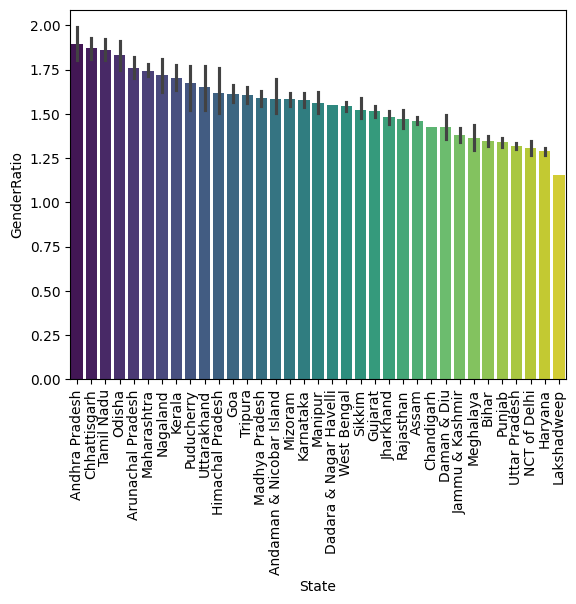

<Figure size 640x480 with 0 Axes>

In [49]:
# sorted_df = df_census.sort_values('GenderRatio', ascending=False)
# sorted_order = sorted_df['State'].values
# sns.barplot(data=sorted_df, x='State', y='GenderRatio', order=sorted_order, palette='viridis')
# plt.xticks(rotation=90)
# plt.show()
order = df_census.groupby('State')['GenderRatio'].mean().sort_values(ascending=False).index
sns.barplot(data=df_census, x='State', y='GenderRatio', order=order, palette='viridis')
plt.xticks(rotation=90)
plt.show()
plt.savefig("gr1.jpg")

Q1)What is the Highest and the lowest gender ratio in the states?

A1) The Uttar Pradesh has 93.41 highest while, Lakshadweep has lowest 1.15 genderratio.

In [50]:
df_census.groupby(['State'])['GenderRatio'].sum().sort_values(ascending = False)

State
Uttar Pradesh               93.419861
Madhya Pradesh              79.387259
Maharashtra                 61.028511
Tamil Nadu                  59.555615
Odisha                      54.909147
Bihar                       51.108680
Rajasthan                   48.517953
Karnataka                   47.346656
Andhra Pradesh              43.587142
Assam                       39.430086
Gujarat                     39.351217
Jharkhand                   35.555111
Chhattisgarh                33.651022
Jammu & Kashmir             30.381027
West Bengal                 29.296690
Arunachal Pradesh           28.122140
Haryana                     27.038507
Punjab                      26.791864
Kerala                      23.802752
Uttarakhand                 21.452670
Himachal Pradesh            19.394036
Nagaland                    18.893102
Manipur                     14.074579
Mizoram                     12.650335
NCT of Delhi                11.770049
Meghalaya                    9.562205
Puduch

Q2) What is highest and lowest value for genderratio as per districts?

A2) From the below code we can see that the district with code 547 has highest 2.28 genderratio value and code 587 has lowest of 1.15 value.

In [51]:
df_census.groupby(['Dist.Code'])['GenderRatio'].sum().sort_values(ascending = False)

Dist.Code
547    2.283250
398    2.268763
625    2.225429
546    2.221849
391    2.215060
         ...   
139    1.184830
106    1.180761
144    1.180202
2      1.179576
587    1.151993
Name: GenderRatio, Length: 640, dtype: float64

Q3) Which states has highest and lowest literacy rate as per their gender?

A3) Andaman & Nicobar Island has 82.27% highestliteracy rate while west bengal has 74.92% lowest for male.

For female Andaman & Nicobar Island has 70.53% highestliteracy rate while west bengal has 57.83% lowest.

In [52]:
x = df_census.groupby(['State']).sum()[['TOT_M','M_LIT']]
y = df_census.groupby(['State']).sum()[['TOT_F','F_LIT']]
z_M = (x.M_LIT)/(x.TOT_M)
z_F = (y.F_LIT)/(y.TOT_F)
print("FOR MALE LITERACY RATE:")
print(z_M)
print("FOR FEMALE LITERACY RATE:")
print(z_F)

FOR MALE LITERACY RATE:
State
Andaman & Nicobar Island    0.827085
Andhra Pradesh              0.724712
Arunachal Pradesh           0.671484
Assam                       0.711972
Bihar                       0.598354
Chandigarh                  0.803583
Chhattisgarh                0.733391
Dadara & Nagar Havelli      0.733171
Daman & Diu                 0.827188
Goa                         0.835282
Gujarat                     0.760907
Haryana                     0.749246
Himachal Pradesh            0.802359
Jammu & Kashmir             0.672121
Jharkhand                   0.665078
Karnataka                   0.749135
Kerala                      0.811806
Lakshadweep                 0.826718
Madhya Pradesh              0.713084
Maharashtra                 0.788496
Manipur                     0.757676
Meghalaya                   0.610784
Mizoram                     0.814862
NCT of Delhi                0.791835
Nagaland                    0.759543
Odisha                      0.737274
Puducher

Q4) Which group has highest and lowest gender ratio as per Population in the age group 0-6 for Male and Female as per the states?

A4) Haryana has the lowest value of 858.48 while, Arunachal Pradesh has the highest value of  1085.05

In [53]:
x=df_census.groupby(['State']).sum()[['M_06','F_06']]
y = ((x.F_06)/(x.M_06))*1000
y.sort_values()

State
Haryana                      858.480597
Punjab                       869.658139
Chandigarh                   874.544128
NCT of Delhi                 889.584269
Jammu & Kashmir              892.391196
Uttarakhand                  900.009853
Himachal Pradesh             907.177823
Lakshadweep                  923.211169
Andaman & Nicobar Island     928.512397
Rajasthan                    934.733155
Gujarat                      945.291581
Tripura                      950.208787
Tamil Nadu                   953.878768
Madhya Pradesh               960.657686
Daman & Diu                  961.674528
Manipur                      964.006983
Odisha                       964.071416
Andhra Pradesh               970.265375
Nagaland                     975.936968
Karnataka                    977.466847
Puducherry                   978.837209
Kerala                       981.337471
Sikkim                       984.455959
Uttar Pradesh                985.131016
Assam                        990.0

For the Exploratory Data Analysis(EDA) as per requirement we have select the five variables : No_HH, TOT_M, TOT_F, M_06, F_06 for this and made into a new dataset and used head function to see its values as seen in below code.

We will also use describe function to get the five important values from if for each variables.

In [54]:
new_df = df_census[['No_HH','TOT_M','TOT_F','M_06','F_06']]
new_df.head()

No_HH  TOT_M  TOT_F  M_06  F_06
0   7707  23388  29796  5862  6196
1   6218  19585  23102  4482  3733
2   4452   6546  10964  1082  1018
3   1320   2784   4206   563   677
4  11654  20591  29981  5157  4587

In [55]:
new_df.describe().T

count           mean            std    min       25%      50%  \
No_HH  640.0   51222.871875   48135.405475  350.0  19484.00  35837.0   
TOT_M  640.0   79940.576563   73384.511114  391.0  30228.00  58339.0   
TOT_F  640.0  122372.084375  113600.717282  698.0  46517.75  87724.5   
M_06   640.0   12309.098438   11500.906881   56.0   4733.75   9159.0   
F_06   640.0   11942.300000   11326.294567   56.0   4672.25   8663.0   

             75%       max  
No_HH   68892.00  310450.0  
TOT_M  107918.50  485417.0  
TOT_F  164251.75  750392.0  
M_06    16520.25   96223.0  
F_06    15902.25   95129.0

There is a huge variation in values between min and max, so there is presence of outliers in the dataset.

We will use boxplot and histogram for Univariate analysis on this new dataset and we can observe that the data is right skewed.

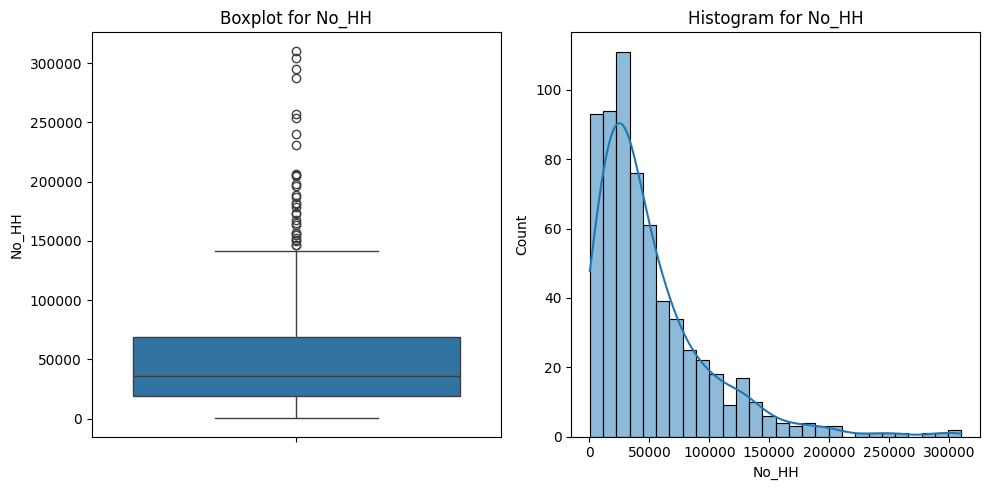

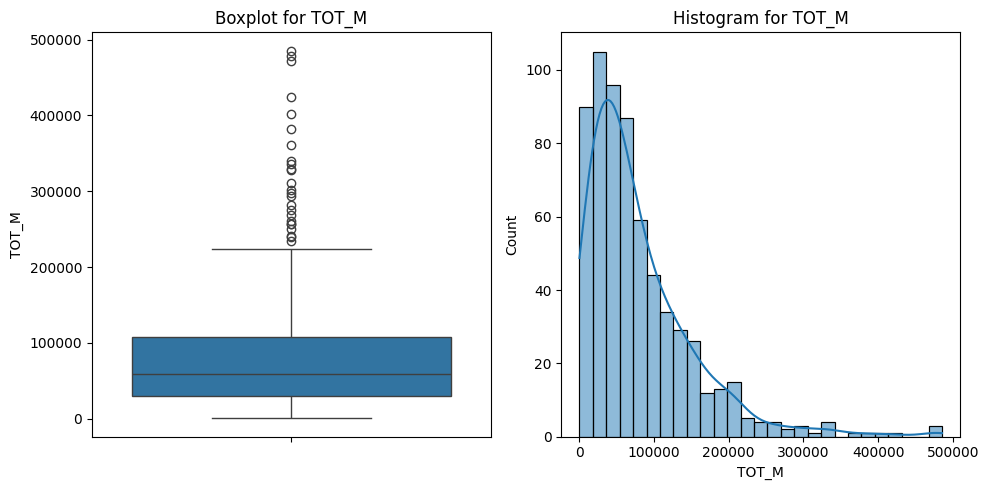

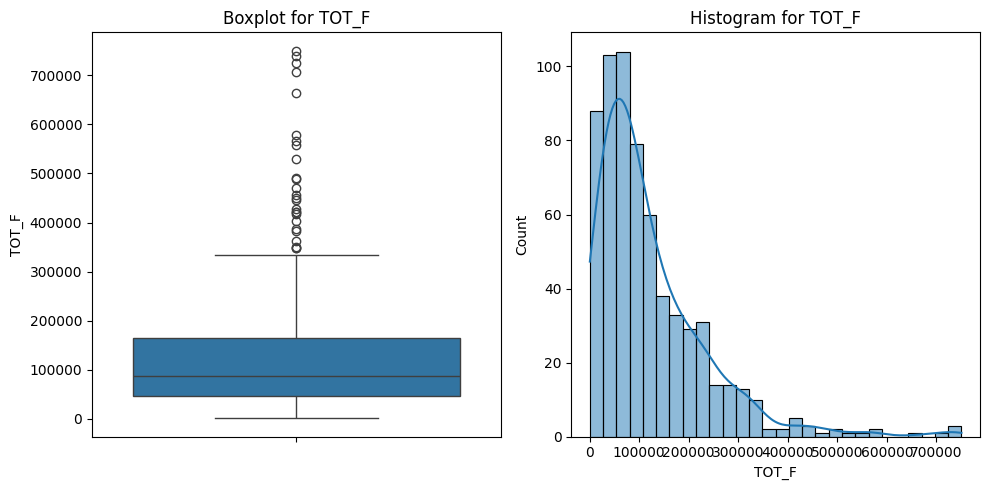

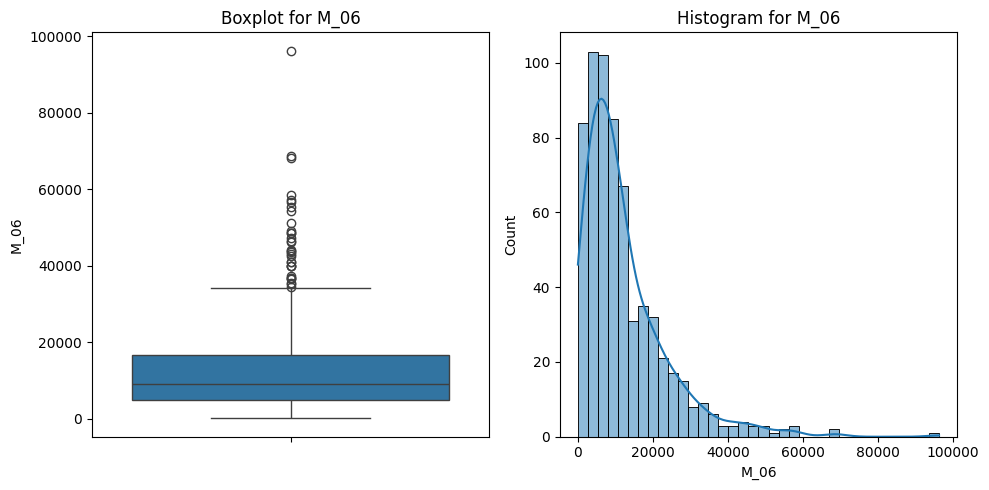

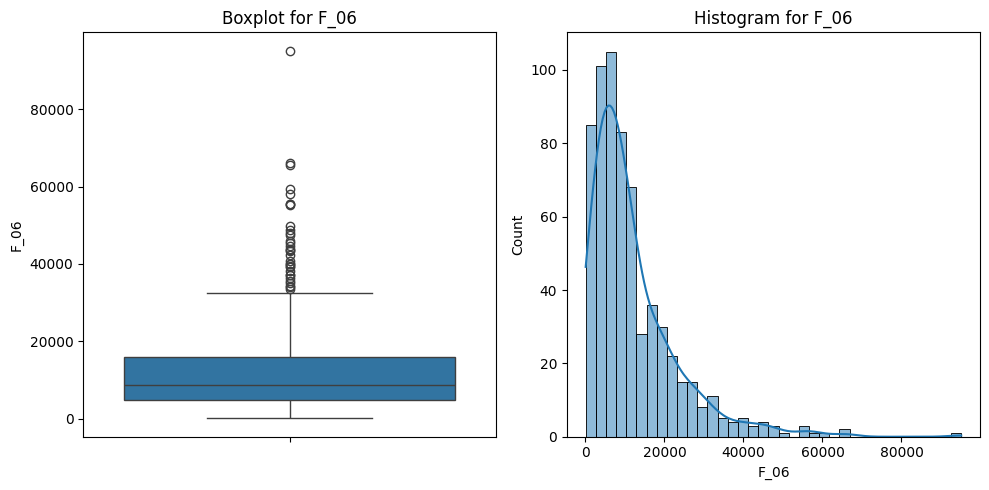

<Figure size 640x480 with 0 Axes>

In [56]:
list_col = new_df.columns
for i in range(len(list_col)):
    plt.figure(figsize=(10, 5))  # Set the figure size for better visibility
    plt.subplot(1, 2, 1)  # Define the first subplot for the boxplot
    plt.title('Boxplot for {}'.format(list_col[i]))
    sns.boxplot(y=new_df[list_col[i]])  # Use 'y' to specify the vertical boxplot

    plt.subplot(1, 2, 2)  # Define the second subplot for the histogram
    plt.title('Histogram for {}'.format(list_col[i]))
    sns.histplot(new_df[list_col[i]], kde=True)  # Added KDE (Kernel Density Estimate) for smoothness

    plt.tight_layout()  # Adjust subplots to fit into the figure area.
    plt.show()
plt.savefig("boxplot1.jpg")

Now we perform Bivairate analysis  the dataset for obtaining any correlation or any hidden pattern using pairplot and heatmap.

In [57]:
new_df.corr()

No_HH     TOT_M     TOT_F      M_06      F_06
No_HH  1.000000  0.916170  0.970590  0.797559  0.796373
TOT_M  0.916170  1.000000  0.982640  0.950825  0.947792
TOT_F  0.970590  0.982640  1.000000  0.907975  0.906557
M_06   0.797559  0.950825  0.907975  1.000000  0.998151
F_06   0.796373  0.947792  0.906557  0.998151  1.000000

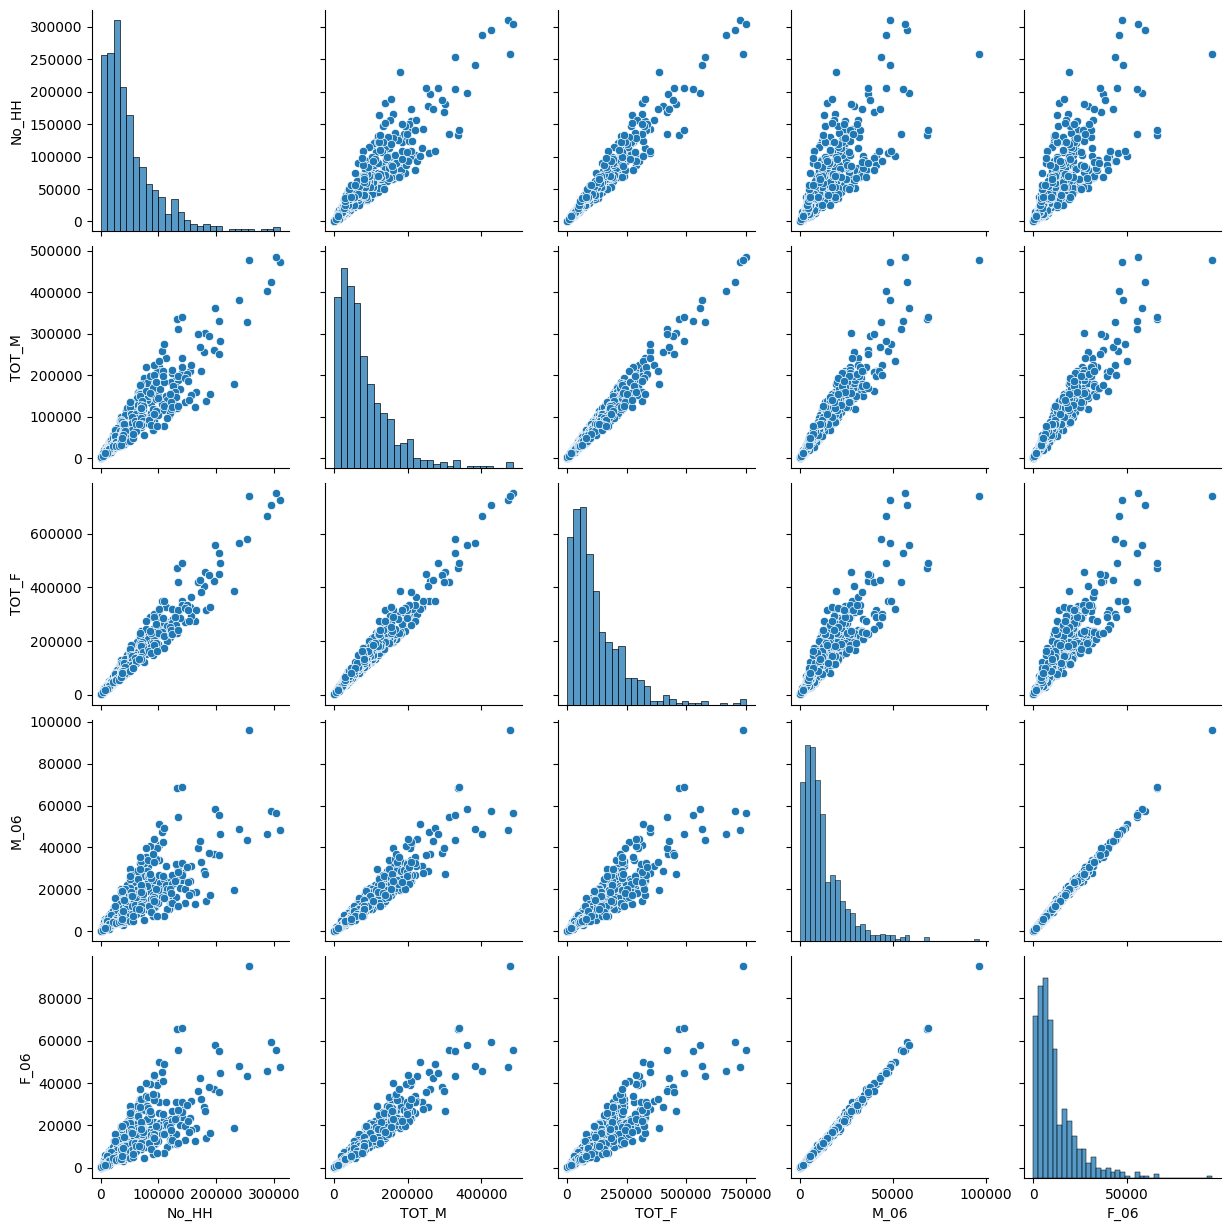

In [58]:
sns.pairplot(new_df)
plt.savefig("pair2.jpg")

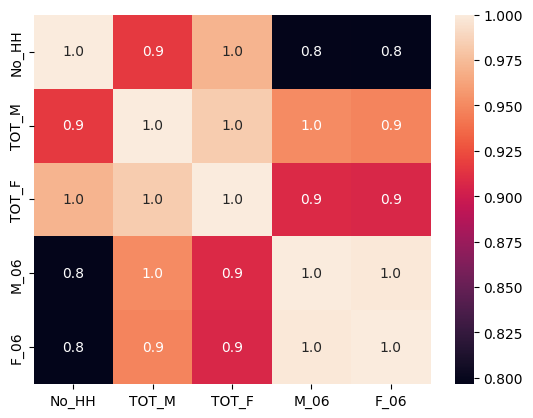

In [59]:
sns.heatmap(new_df.corr(),annot= True,fmt=".1f")
plt.savefig("h2.jpg")

From heatmap and pairplot we can conclude or say that there is a strong correlation between all 5 variables and they are also positively related to each other.

Now, for performing PCA on the orginal dataset well first drop some variables that are not needed for this calculation mainly the categorical variables. And check using head function if they are removed or not.


In [60]:
df_pca = df_census.drop(['State','Area Name','GenderRatio','State Code','Dist.Code'],axis=1)
df_pca.head()

No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  F_SC  M_ST   F_ST  M_LIT  ...  \
0   7707  23388  29796  5862  6196     3     0  1999   2598  13381  ...   
1   6218  19585  23102  4482  3733     7     6   427    517  10513  ...   
2   4452   6546  10964  1082  1018     3     6  5806   9723   4534  ...   
3   1320   2784   4206   563   677     0     0  2666   3968   1842  ...   
4  11654  20591  29981  5157  4587    20    33  7670  10843  13243  ...   

   MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  \
0           1150            749            180            237            680   
1            525            715            123            229            186   
2            114            188             44             89              3   
3            194            247             61            128             13   
4            874           1928            465           1043            205   

   MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0            252             32             46         258         214  
1            148             76            178         140         160  
2             34              0              4          67          61  
3             50              4             10         116          59  
4            302             24            105         180         478  

[5 rows x 57 columns]

Now, we will see that if there is any ouliers present in the data and from the below graph we can see that yes, outliers are present and for PCA it affect the calcutions if outliers present so we will treat them.
But, before that we will scale the data using Zscore method.

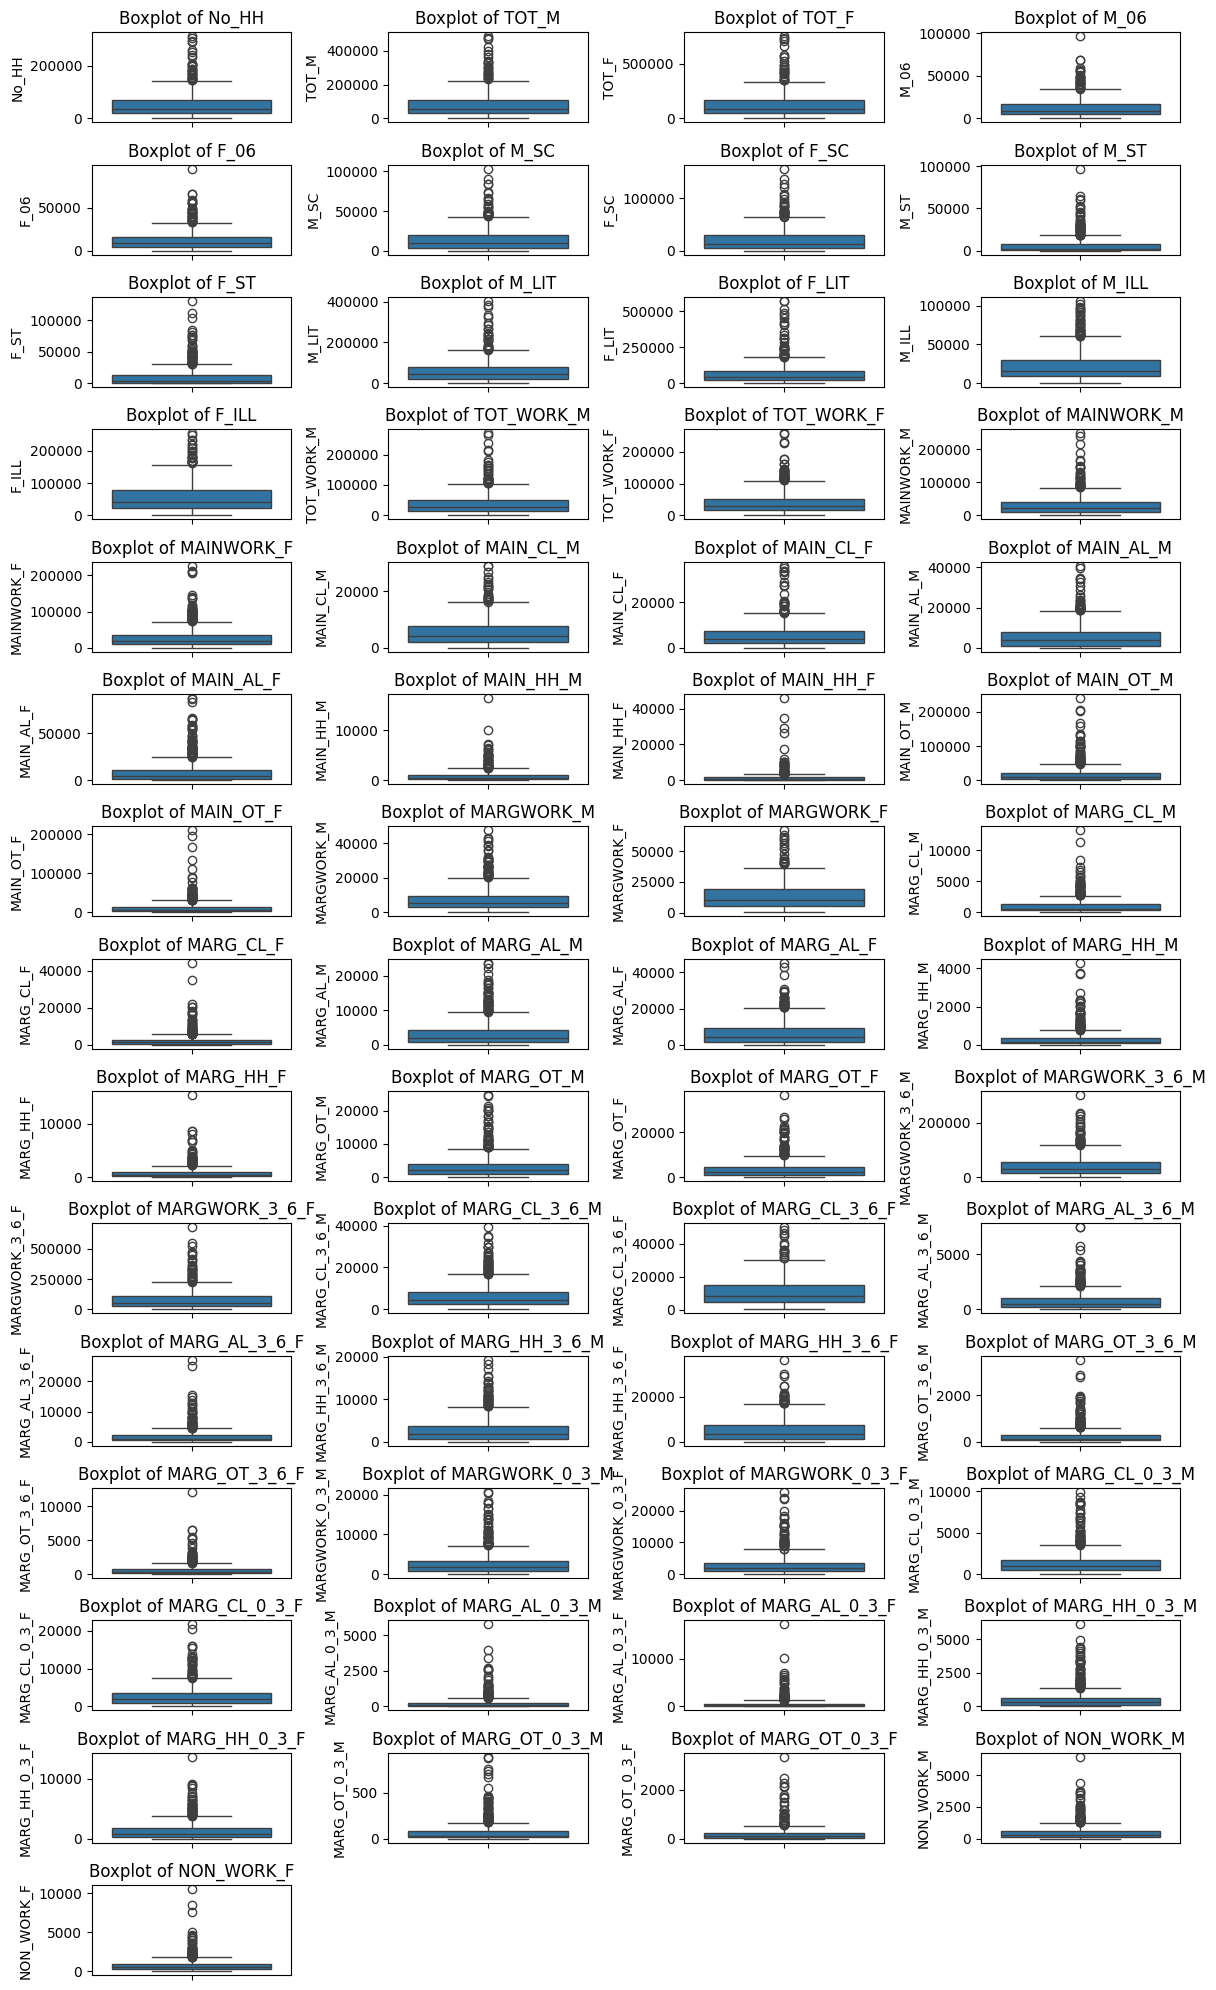

In [61]:
plt.figure(figsize=(12,20))
list = df_pca.columns
for i in range (len(list)):
    plt.subplot(15,4,i+1)
    sns.boxplot(y=df_pca[list[i]],data=df_pca)
    plt.title("Boxplot of {}".format(list[i]))
    plt.tight_layout()
plt.savefig("pcabox1.jpg")

In [62]:
scaled_pca = df_pca.apply(zscore)
scaled_pca.head()

No_HH     TOT_M     TOT_F      M_06      F_06      M_SC      F_SC  \
0 -0.904738 -0.771236 -0.815563 -0.561012 -0.507738 -0.958575 -0.957049   
1 -0.935695 -0.823100 -0.874534 -0.681096 -0.725367 -0.958297 -0.956772   
2 -0.972412 -1.000919 -0.981466 -0.976956 -0.965262 -0.958575 -0.956772   
3 -1.037530 -1.052224 -1.041001 -1.022118 -0.995393 -0.958783 -0.957049   
4 -0.822676 -0.809381 -0.813933 -0.622359 -0.649908 -0.957395 -0.955529   

       M_ST      F_ST     M_LIT  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0 -0.423306 -0.476423 -0.798097  ...      -0.163229      -0.720610   
1 -0.582014 -0.607607 -0.849434  ...      -0.583103      -0.732811   
2 -0.038951 -0.027273 -0.956457  ...      -0.859212      -0.921931   
3 -0.355965 -0.390060 -1.004643  ...      -0.805468      -0.900758   
4  0.149238  0.043330 -0.800568  ...      -0.348645      -0.297513   

   MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  \
0      -0.156494      -0.287524       0.156577      -0.657412      -0.365258   
1      -0.282327      -0.294688      -0.491731      -0.723062       0.042855   
2      -0.456727      -0.420050      -0.731894      -0.795026      -0.662068   
3      -0.419198      -0.385127      -0.718770      -0.784926      -0.624966   
4       0.472670       0.434200      -0.466796      -0.625849      -0.439461   

   MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0      -0.499977   -0.413053   -0.539614  
1      -0.073481   -0.606455   -0.598988  
2      -0.635680   -0.726103   -0.707839  
3      -0.616294   -0.645791   -0.710038  
4      -0.309346   -0.540895   -0.249344  

[5 rows x 57 columns]

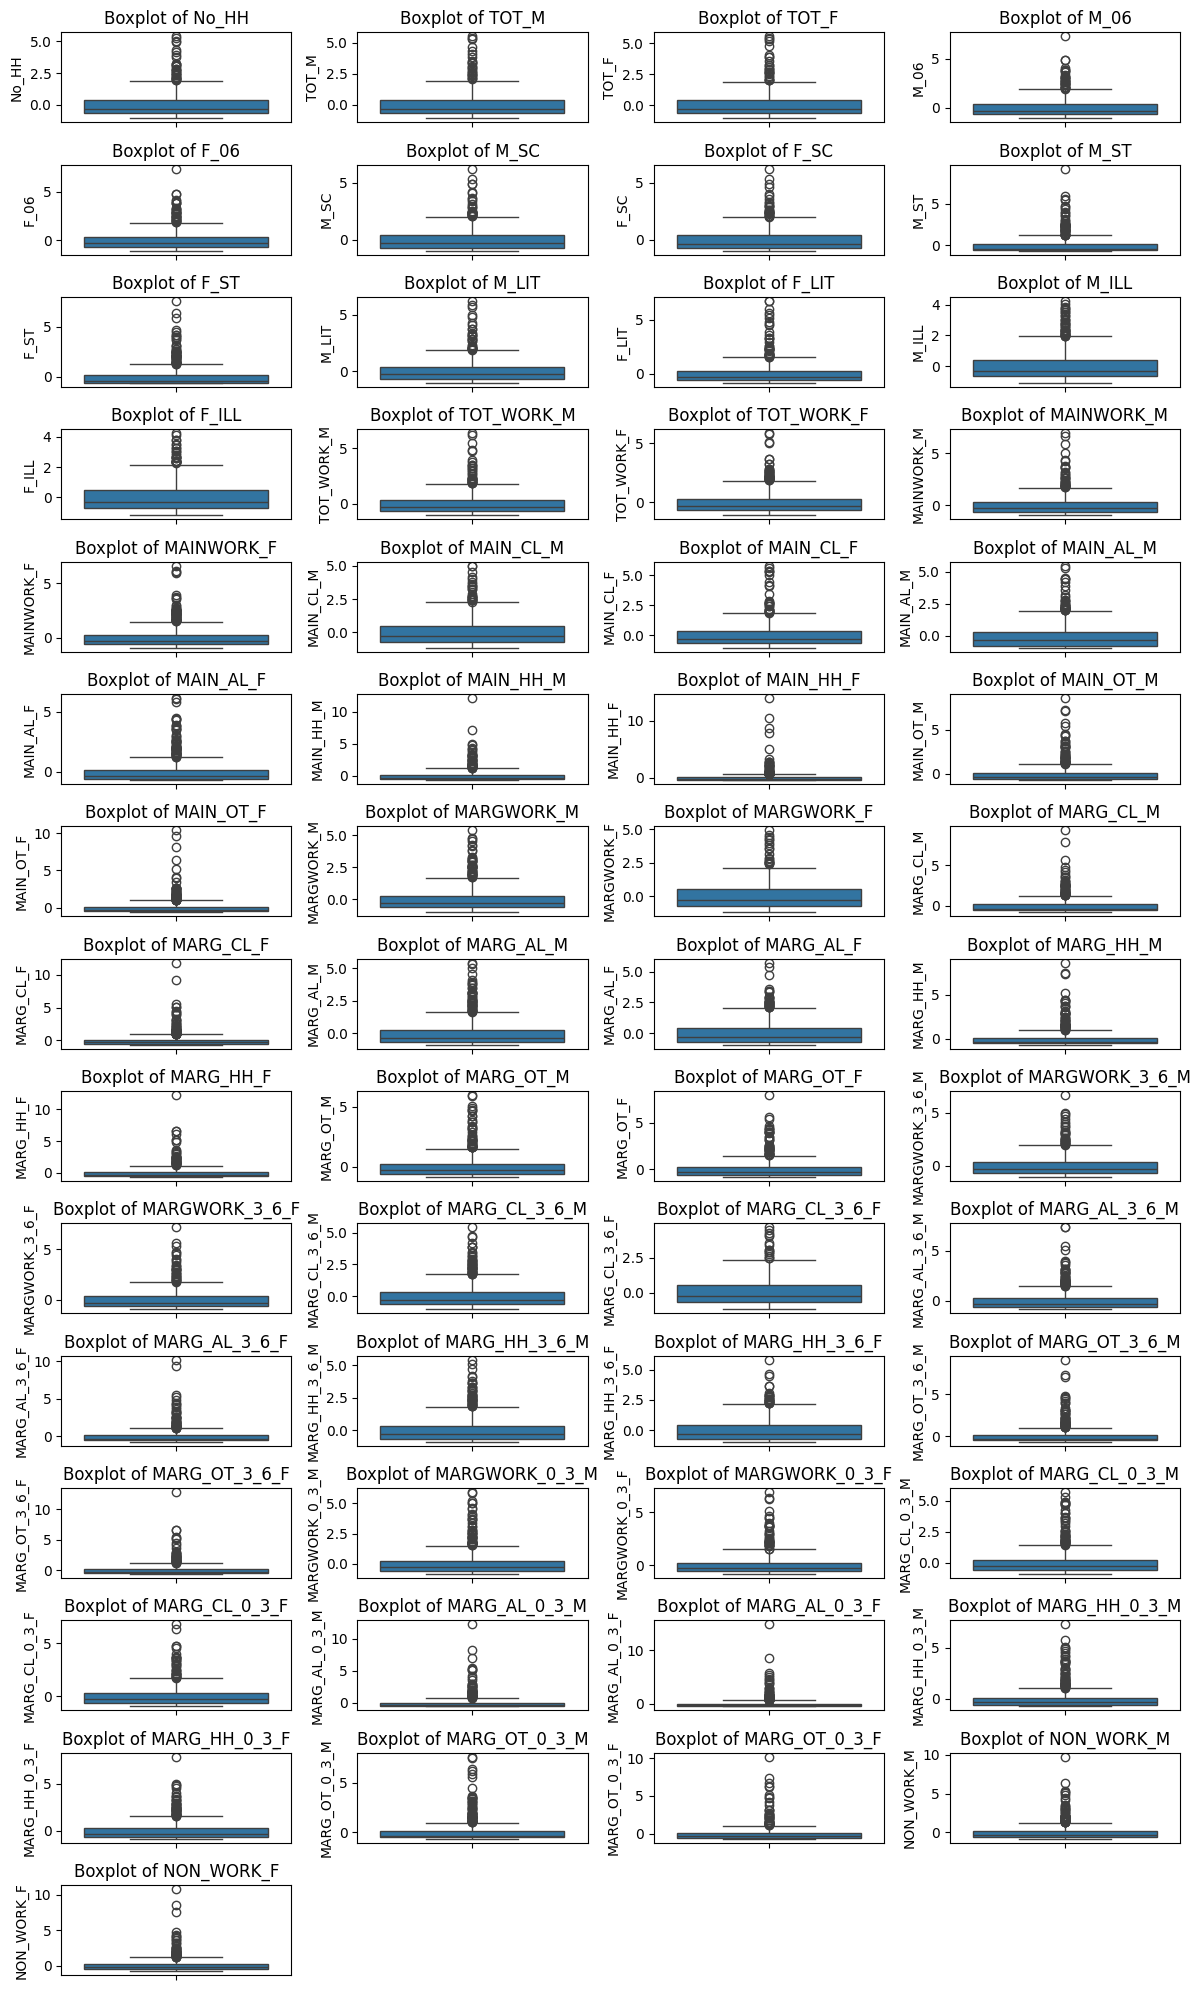

In [63]:
plt.figure(figsize=(12,20))
list = scaled_pca.columns
for i in range (len(list)):
    plt.subplot(15,4,i+1)
    sns.boxplot(y=scaled_pca[list[i]],data=scaled_pca)
    plt.title("Boxplot of {}".format(list[i]))
    plt.tight_layout()
plt.savefig("pcabox2.jpg")

In [64]:
for column in scaled_pca.select_dtypes(include=np.number).columns:
    # Calculate Q1, Q3, and IQR for each column
    q1 = scaled_pca[column].quantile(0.25)
    q3 = scaled_pca[column].quantile(0.75)
    IQR = q3 - q1
    
    # Calculate the upper and lower limits for outlier detection
    uplim = q3 + (1.5 * IQR)
    lowlim = q1 - (1.5 * IQR)
    
    # Replace values below the lower limit with the lower limit value
    scaled_pca[column] = np.where(scaled_pca[column] < lowlim, lowlim, scaled_pca[column])
    
    # Replace values above the upper limit with the upper limit value
    scaled_pca[column] = np.where(scaled_pca[column] > uplim, uplim, scaled_pca[column])

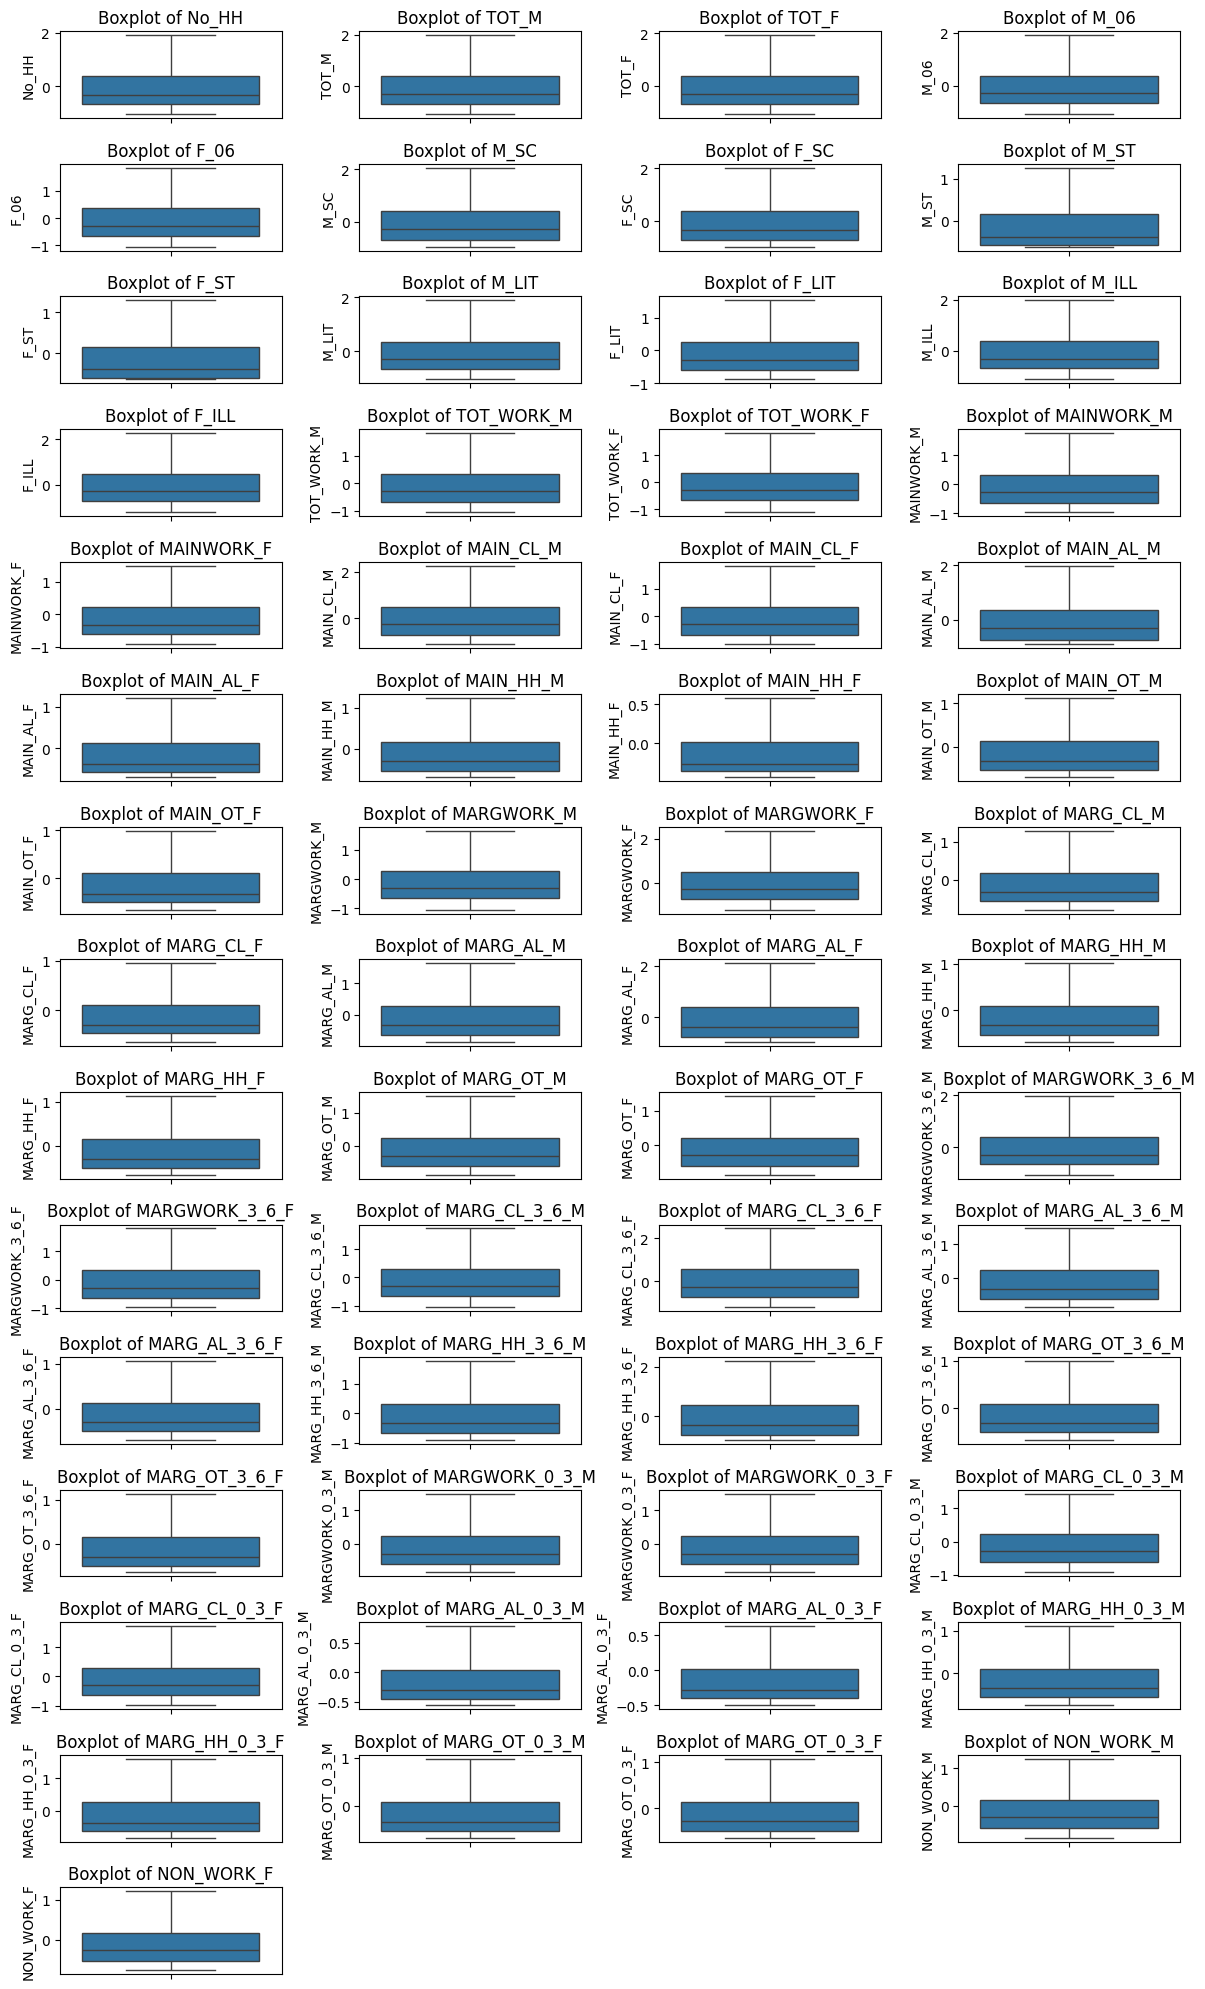

In [66]:
plt.figure(figsize=(12,20))
list = scaled_pca.columns
for i in range (len(list)):
    plt.subplot(15,4,i+1)
    sns.boxplot(y=scaled_pca[list[i]],data=scaled_pca)
    plt.title("Boxplot of {}".format(list[i]))
    plt.tight_layout()
plt.savefig("pcabox3.jpg")

In [67]:
scaled_pca1 = scaled_pca.apply(zscore)
scaled_pca1.head()

No_HH     TOT_M     TOT_F      M_06      F_06      M_SC      F_SC  \
0 -1.038986 -0.874837 -0.937027 -0.624685 -0.561282 -1.080201 -1.079963   
1 -1.076896 -0.938023 -1.009723 -0.773932 -0.835657 -1.079873 -1.079635   
2 -1.121858 -1.154665 -1.141539 -1.141642 -1.138104 -1.080201 -1.079635   
3 -1.201599 -1.217171 -1.214930 -1.197772 -1.176091 -1.080447 -1.079963   
4 -0.938495 -0.921309 -0.935018 -0.700931 -0.740523 -1.078807 -1.078160   

       M_ST      F_ST     M_LIT  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0 -0.510440 -0.574198 -0.939617  ...      -0.093587      -0.860882   
1 -0.771833 -0.782092 -1.005083  ...      -0.719169      -0.877096   
2  0.122588  0.137599 -1.141561  ...      -1.130551      -1.128423   
3 -0.399531 -0.437333 -1.203009  ...      -1.050477      -1.100286   
4  0.432534  0.249489 -0.942767  ...      -0.369844      -0.298617   

   MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  \
0      -0.041800      -0.423378       0.523468      -0.793688      -0.443385   
1      -0.347040      -0.443790      -0.634478      -0.884805       0.358782   
2      -0.770091      -0.800999      -1.063434      -0.984684      -1.026779   
3      -0.679055      -0.701491      -1.039994      -0.970666      -0.953855   
4       1.484398       1.633130      -0.589942      -0.749882      -0.589234   

   MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0      -0.756991   -0.497493   -0.774865  
1       0.088391   -0.813235   -0.880662  
2      -1.025976   -1.008568   -1.074622  
3      -0.987550   -0.877454   -1.078541  
4      -0.379131   -0.706204   -0.257637  

[5 rows x 57 columns]

After the outlier treatment and scaling we say that scaling does not have any effect on outliers presence as they are present before and after scaling.
As scaling just bring all the variables on the same scale for further accurate calculation.

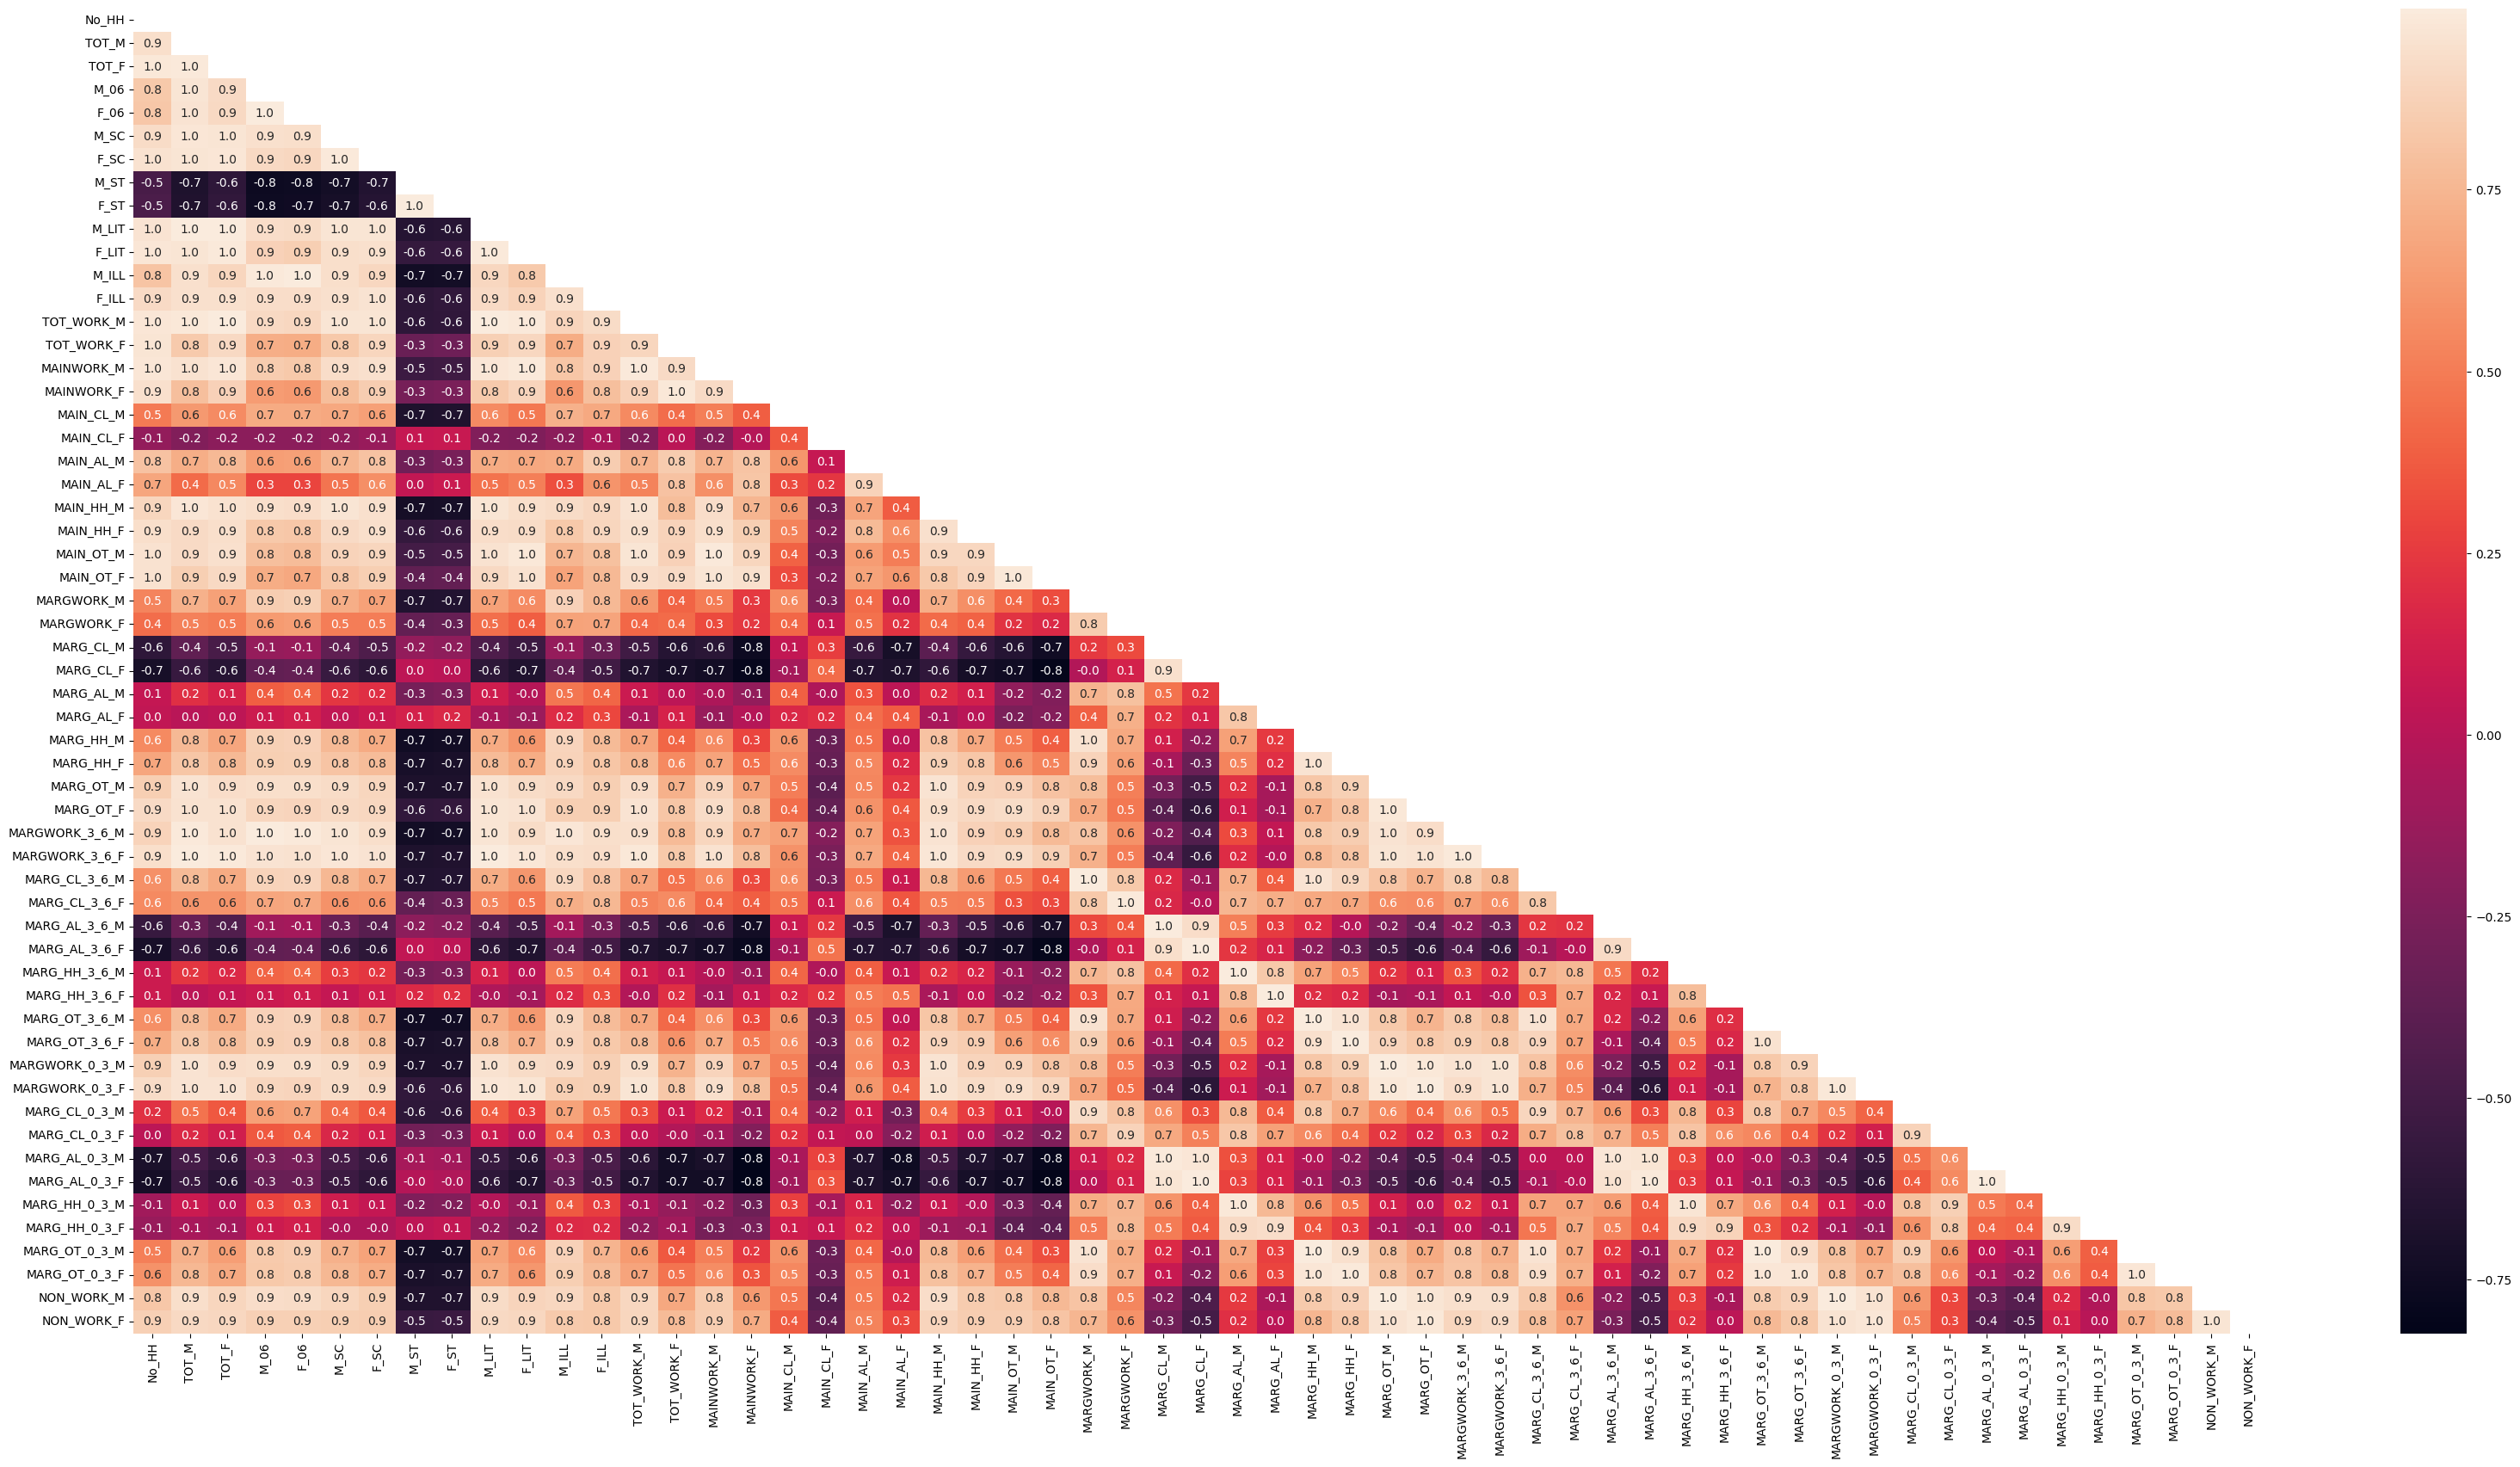

In [90]:
corr = scaled_pca.corr(method='pearson')
mark = np.triu(np.ones_like(corr, dtype=bool)) 
fig = plt.subplots(figsize=(40,20))
sns.heatmap(scaled_pca.corr(),annot= True, fmt='.1f',mask=mark)
plt.savefig("bigheatmap.jpg")

We perform kmo_model to see if the value is > 0.7 and yes it so we can procedd further. Then perform bartlett spericity calculation to see if there is any significant correlations and we obtained the p-value <0.05 so, we can say thare is significant correlations.

In [69]:
chi_square_value,p_value=calculate_bartlett_sphericity(scaled_pca)
p_value

0.0

In [70]:
kmo_all,kmo_model=calculate_kmo(scaled_pca)
kmo_model

0.9361896166652658

Now, few below code lines are for performing Egien decompositon.
First we fit the scaled data and find out egien vectors and then extract those vectors.
Then cut down the PC variables as per requirement using scree plot

In [71]:
scaled_pca = np.round(scaled_pca1.cov(),2)
scaled_pca

No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  F_SC  M_ST  F_ST  \
No_HH            1.00   0.91   0.97  0.81  0.81  0.81  0.86  0.12  0.12   
TOT_M            0.91   1.00   0.98  0.97  0.96  0.88  0.86  0.02  0.01   
TOT_F            0.97   0.98   1.00  0.91  0.91  0.86  0.88  0.08  0.07   
M_06             0.81   0.97   0.91  1.00  1.00  0.83  0.80 -0.01 -0.02   
F_06             0.81   0.96   0.91  1.00  1.00  0.82  0.79  0.01 -0.01   
M_SC             0.81   0.88   0.86  0.83  0.82  1.00  0.98 -0.10 -0.10   
F_SC             0.86   0.86   0.88  0.80  0.79  0.98  1.00 -0.05 -0.05   
M_ST             0.12   0.02   0.08 -0.01  0.01 -0.10 -0.05  1.00  0.99   
F_ST             0.12   0.01   0.07 -0.02 -0.01 -0.10 -0.05  0.99  1.00   
M_LIT            0.93   0.99   0.98  0.92  0.92  0.87  0.86  0.03  0.02   
F_LIT            0.94   0.94   0.96  0.84  0.84  0.81  0.82  0.05  0.04   
M_ILL            0.78   0.93   0.88  0.97  0.97  0.82  0.78  0.02  0.01   
F_ILL            0.90   0.92   0.93  0.90  0.90  0.84  0.86  0.11  0.11   
TOT_WORK_M       0.94   0.98   0.97  0.90  0.89  0.87  0.87  0.06  0.05   
TOT_WORK_F       0.95   0.83   0.90  0.73  0.73  0.73  0.80  0.25  0.26   
MAINWORK_M       0.93   0.94   0.94  0.83  0.83  0.84  0.84  0.05  0.04   
MAINWORK_F       0.92   0.77   0.86  0.65  0.65  0.69  0.76  0.22  0.22   
MAIN_CL_M        0.52   0.63   0.59  0.65  0.65  0.65  0.62  0.07  0.06   
MAIN_CL_F        0.46   0.41   0.45  0.43  0.44  0.40  0.44  0.25  0.24   
MAIN_AL_M        0.74   0.68   0.72  0.65  0.66  0.67  0.71  0.14  0.15   
MAIN_AL_F        0.68   0.49   0.59  0.42  0.42  0.48  0.58  0.26  0.28   
MAIN_HH_M        0.77   0.88   0.84  0.83  0.83  0.84  0.81 -0.07 -0.08   
MAIN_HH_F        0.81   0.78   0.81  0.69  0.69  0.73  0.76  0.04  0.04   
MAIN_OT_M        0.85   0.84   0.86  0.72  0.70  0.74  0.74  0.02  0.01   
MAIN_OT_F        0.87   0.78   0.84  0.63  0.62  0.67  0.71  0.13  0.14   
MARGWORK_M       0.72   0.84   0.81  0.88  0.89  0.73  0.71  0.09  0.08   
MARGWORK_F       0.76   0.75   0.78  0.76  0.76  0.66  0.69  0.27  0.27   
MARG_CL_M        0.23   0.37   0.32  0.48  0.49  0.30  0.27  0.11  0.09   
MARG_CL_F        0.15   0.24   0.22  0.35  0.35  0.19  0.17  0.16  0.14   
MARG_AL_M        0.51   0.60   0.57  0.67  0.69  0.56  0.55  0.16  0.17   
MARG_AL_F        0.57   0.52   0.56  0.54  0.55  0.48  0.53  0.35  0.37   
MARG_HH_M        0.63   0.78   0.73  0.82  0.83  0.72  0.68 -0.03 -0.04   
MARG_HH_F        0.68   0.75   0.73  0.74  0.75  0.69  0.68  0.01  0.00   
MARG_OT_M        0.81   0.91   0.88  0.86  0.86  0.79  0.77  0.02  0.00   
MARG_OT_F        0.85   0.87   0.88  0.80  0.80  0.76  0.76  0.11  0.10   
MARGWORK_3_6_M   0.86   0.98   0.95  0.99  0.98  0.85  0.83 -0.01 -0.02   
MARGWORK_3_6_F   0.91   0.99   0.98  0.95  0.94  0.86  0.85 -0.02 -0.02   
MARG_CL_3_6_M    0.74   0.86   0.82  0.89  0.90  0.74  0.72  0.09  0.08   
MARG_CL_3_6_F    0.78   0.76   0.80  0.76  0.77  0.67  0.71  0.28  0.29   
MARG_AL_3_6_M    0.27   0.41   0.36  0.51  0.52  0.33  0.30  0.12  0.10   
MARG_AL_3_6_F    0.18   0.26   0.24  0.36  0.36  0.20  0.19  0.18  0.16   
MARG_HH_3_6_M    0.52   0.61   0.58  0.67  0.69  0.57  0.56  0.16  0.16   
MARG_HH_3_6_F    0.58   0.51   0.56  0.52  0.54  0.48  0.53  0.37  0.39   
MARG_OT_3_6_M    0.63   0.78   0.73  0.82  0.83  0.72  0.68 -0.03 -0.05   
MARG_OT_3_6_F    0.68   0.75   0.73  0.73  0.74  0.69  0.68  0.02  0.01   
MARGWORK_0_3_M   0.81   0.91   0.88  0.87  0.86  0.80  0.77  0.01 -0.01   
MARGWORK_0_3_F   0.86   0.88   0.89  0.81  0.81  0.77  0.77  0.09  0.08   
MARG_CL_0_3_M    0.60   0.74   0.70  0.80  0.81  0.65  0.62  0.09  0.08   
MARG_CL_0_3_F    0.62   0.64   0.65  0.68  0.69  0.55  0.57  0.20  0.21   
MARG_AL_0_3_M    0.09   0.23   0.19  0.35  0.36  0.19  0.15  0.09  0.07   
MARG_AL_0_3_F    0.08   0.19   0.16  0.31  0.31  0.15  0.13  0.09  0.08   
MARG_HH_0_3_M    0.44   0.54   0.51  0.62  0.64  0.49  0.48  0.16  0.17   
MARG_HH_0_3_F    0.49   0.48   0.51  0.53

In [72]:
pca = PCA(n_components=57, random_state=123)
pca_transformed = pca.fit_transform(scaled_pca)
pca.components_

array([[-0.17183796, -0.17774185, -0.17524095, ..., -0.11513521,
        -0.15750061, -0.13519652],
       [ 0.06234143, -0.01999535,  0.01589756, ..., -0.14880893,
        -0.06161616, -0.03089135],
       [ 0.05923685, -0.03781452,  0.00671237, ...,  0.01853063,
        -0.11138935, -0.0460998 ],
       ...,
       [ 0.0598666 , -0.21721558, -0.242402  , ..., -0.09471876,
         0.0231657 , -0.00193034],
       [ 0.02200652, -0.38453037, -0.04711229, ...,  0.0437575 ,
         0.11246383, -0.09926668],
       [-0.09599873,  0.32058118,  0.33321909, ...,  0.03786379,
        -0.01217672, -0.04261217]])

In [73]:
pca.explained_variance_

array([1.99168024e+00, 6.26759062e-01, 1.98469001e-01, 8.86356128e-02,
       5.47773348e-02, 1.90622311e-02, 1.11218380e-02, 3.78064216e-03,
       2.31589770e-03, 1.43622281e-03, 1.28755450e-03, 8.10613528e-04,
       5.93416913e-04, 3.46163830e-04, 3.22891995e-04, 2.25606257e-04,
       1.81507581e-04, 1.67136036e-04, 1.20707249e-04, 8.59828662e-05,
       8.46576027e-05, 7.09429636e-05, 5.06190285e-05, 3.67036975e-05,
       2.88577826e-05, 2.40896688e-05, 2.22627435e-05, 1.94683585e-05,
       1.76911514e-05, 1.51129180e-05, 1.29034059e-05, 1.20862652e-05,
       9.65573613e-06, 8.65563950e-06, 7.19610801e-06, 6.46918361e-06,
       5.42618038e-06, 5.07864487e-06, 4.30983748e-06, 4.15724003e-06,
       3.89586823e-06, 3.10776784e-06, 2.62618093e-06, 2.20410719e-06,
       1.88599831e-06, 1.75518863e-06, 1.18508243e-06, 9.36588210e-07,
       8.73237390e-07, 6.97056021e-07, 4.16392415e-07, 3.48365467e-07,
       2.32633142e-07, 1.42975783e-07, 7.87370088e-08, 3.71358661e-08,
      

In [74]:
pca.explained_variance_ratio_

array([6.63308280e-01, 2.08735553e-01, 6.60980259e-02, 2.95191641e-02,
       1.82430187e-02, 6.34847676e-03, 3.70401186e-03, 1.25910334e-03,
       7.71285516e-04, 4.78318992e-04, 4.28806565e-04, 2.69966360e-04,
       1.97631299e-04, 1.15286244e-04, 1.07535803e-04, 7.51358052e-05,
       6.04492020e-05, 5.56629095e-05, 4.02002874e-05, 2.86356946e-05,
       2.81943295e-05, 2.36268123e-05, 1.68581382e-05, 1.22237827e-05,
       9.61078277e-06, 8.02281234e-06, 7.41437397e-06, 6.48373327e-06,
       5.89185300e-06, 5.03319932e-06, 4.29734441e-06, 4.02520426e-06,
       3.21574197e-06, 2.88267024e-06, 2.39658854e-06, 2.15449397e-06,
       1.80713264e-06, 1.69138958e-06, 1.43534631e-06, 1.38452533e-06,
       1.29747818e-06, 1.03500959e-06, 8.74622101e-07, 7.34054855e-07,
       6.28112018e-07, 5.84547223e-07, 3.94679313e-07, 3.11920911e-07,
       2.90822583e-07, 2.32147220e-07, 1.38675140e-07, 1.16019477e-07,
       7.74760356e-08, 4.76165897e-08, 2.62225376e-08, 1.23677119e-08,
      

In [75]:
pca_extract = pd.DataFrame(pca.components_.T, columns =['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40','PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50','PC51','PC52','PC53','PC54','PC55','PC56','PC57'],index = scaled_pca.columns)
pca_extract

PC1       PC2       PC3       PC4       PC5       PC6  \
No_HH          -0.171838  0.062341  0.059237  0.133124 -0.082125  0.053443   
TOT_M          -0.177742 -0.019995 -0.037815  0.073941  0.001049 -0.137665   
TOT_F          -0.175241  0.015898  0.006712  0.106508 -0.045525 -0.048561   
M_06           -0.148766 -0.084986 -0.043080  0.072654  0.044156 -0.212501   
F_06           -0.145544 -0.089382 -0.032253  0.062459  0.044647 -0.206413   
M_SC           -0.168825 -0.021648 -0.013354  0.089700  0.135869 -0.071694   
F_SC           -0.165855  0.003638  0.033372  0.117276  0.103750  0.002742   
M_ST            0.087934  0.104961  0.176797 -0.090252 -0.350038 -0.090157   
F_ST            0.088380  0.108152  0.198328 -0.088143 -0.352245 -0.087139   
M_LIT          -0.184062  0.012082 -0.056582  0.086164 -0.034418 -0.097861   
F_LIT          -0.185803  0.053957 -0.060044  0.101523 -0.097632 -0.039218   
M_ILL          -0.141741 -0.091452  0.010303  0.035689  0.093530 -0.209748   
F_ILL          -0.136530 -0.038928  0.104616  0.107472  0.053684 -0.028304   
TOT_WORK_M     -0.188391  0.033927 -0.026920  0.072402 -0.014425 -0.081885   
TOT_WORK_F     -0.129179  0.074773  0.120861  0.186450 -0.090192  0.171367   
MAINWORK_M     -0.199493  0.088755 -0.033583  0.099320  0.004073 -0.083061   
MAINWORK_F     -0.148547  0.145317  0.110014  0.200368 -0.042971  0.169369   
MAIN_CL_M      -0.055514 -0.056335  0.011338  0.171443  0.317788 -0.053222   
MAIN_CL_F       0.026498 -0.007899  0.055038  0.376432  0.136952  0.218892   
MAIN_AL_M      -0.112139  0.035399  0.273832  0.106883  0.219564 -0.087122   
MAIN_AL_F      -0.076290  0.126347  0.320940  0.203204  0.104393  0.140460   
MAIN_HH_M      -0.182745 -0.017750 -0.072612 -0.049946  0.130290  0.018624   
MAIN_HH_F      -0.167210  0.036205  0.032470 -0.052067  0.099795  0.362016   
MAIN_OT_M      -0.204639  0.122077 -0.110678  0.061134 -0.102902 -0.057551   
MAIN_OT_F      -0.188517  0.162546 -0.039570  0.080323 -0.159151  0.057190   
MARGWORK_M     -0.098077 -0.174940  0.022724 -0.056023 -0.071781 -0.082058   
MARGWORK_F     -0.050637 -0.123987  0.126083  0.096815 -0.182209  0.092370   
MARG_CL_M       0.080166 -0.262857 -0.116145  0.136820 -0.039401  0.032455   
MARG_CL_F       0.117037 -0.213187 -0.124667  0.275546 -0.071004  0.092638   
MARG_AL_M      -0.027894 -0.205149  0.233433 -0.088481  0.065495 -0.131958   
MARG_AL_F      -0.003354 -0.105935  0.342090  0.048821 -0.065021  0.011893   
MARG_HH_M      -0.120418 -0.170133 -0.015057 -0.177108  0.106778  0.050466   
MARG_HH_F      -0.127940 -0.116763  0.004619 -0.182417  0.083203  0.332665   
MARG_OT_M      -0.175423 -0.048281 -0.113802 -0.077701 -0.122662 -0.017705   
MARG_OT_F      -0.169139 -0.002495 -0.073800 -0.039465 -0.202449  0.097645   
MARGWORK_3_6_M -0.161895 -0.062371 -0.047171  0.072257  0.017387 -0.172580   
MARGWORK_3_6_F -0.184709 -0.018035 -0.052715  0.058953 -0.019264 -0.144218   
MARG_CL_3_6_M  -0.106479 -0.164340  0.032004 -0.062110 -0.061514 -0.087568   
MARG_CL_3_6_F  -0.059116 -0.101803  0.139319  0.105575 -0.168595  0.098913   
MARG_AL_3_6_M   0.068355 -0.259243 -0.097698  0.115262 -0.036742  0.031139   
MARG_AL_3_6_F   0.112898 -0.200819 -0.113540  0.288495 -0.071062  0.099986   
MARG_HH_3_6_M  -0.031925 -0.198322  0.241615 -0.077973  0.072595 -0.124240   
MARG_HH_3_6_F  -0.006063 -0.083483  0.354417  0.065991 -0.062737  0.025398   
MARG_OT_3_6_M  -0.122779 -0.165746 -0.014733 -0.173361  0.112069  0.048359   
MARG_OT_3_6_F  -0.130766 -0.103099  0.004470 -0.179982  0.091081  0.342268   
MARGWORK_0_3_M -0.177946 -0.046061 -0.112877 -0.075326 -0.110808 -0.019059   
MARGWORK_0_3_F -0.176686  0.007215 -0.078003 -0.037281 -0.174387  0.087147   
MARG_CL_0_3_M  -0.054951 -0.214810 -0.033200 -0.026610 -0.117389 -0.076283   
MARG_CL_0_3_F  -0.015361 -0.189665  0.078033  0.064239 -0.219718  0.050262   
MARG_AL_0_3_M   0.109270 -0.255727 -0.158724  0.164871 -0.051918  0.014839   
MARG_AL_0_3_F   0.121860 -0.243412 -0.14484

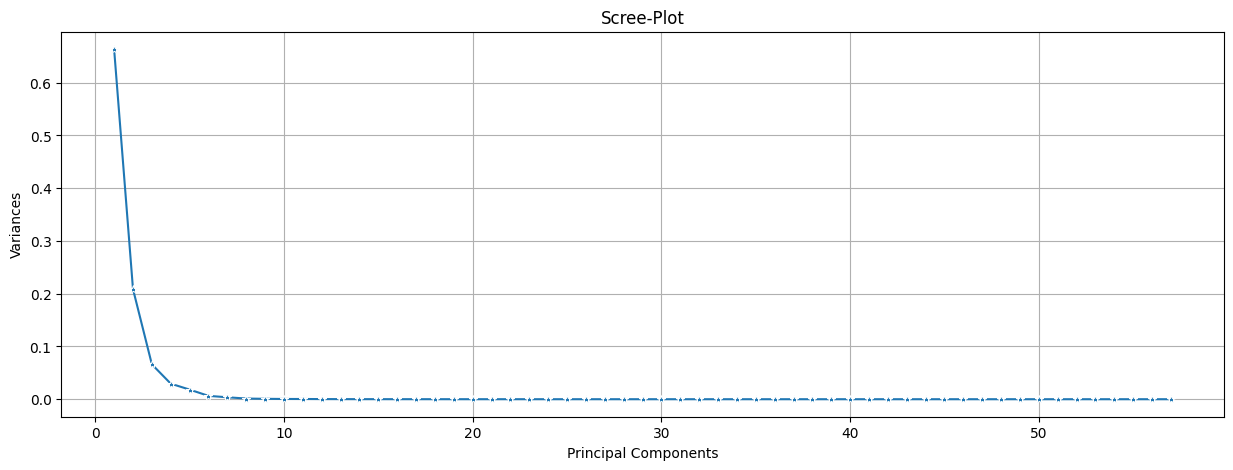

<Figure size 640x480 with 0 Axes>

In [76]:
plt.figure(figsize=(15,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,58),marker='*')
plt.xlabel('Principal Components',fontsize=10)
plt.ylabel('Variances',fontsize=10)
plt.title('Scree-Plot',fontsize=12)
plt.grid()
plt.show()
plt.savefig("scree1.jpg")

Now we find out the optimum number of PCs and take 90% explained variance.
And from the below scree plot we obtained that we will take six PC columns.

In [77]:
np.cumsum(pca.explained_variance_ratio_)

array([0.66330828, 0.87204383, 0.93814186, 0.96766102, 0.98590404,
       0.99225252, 0.99595653, 0.99721563, 0.99798692, 0.99846524,
       0.99889404, 0.99916401, 0.99936164, 0.99947693, 0.99958446,
       0.9996596 , 0.99972005, 0.99977571, 0.99981591, 0.99984455,
       0.99987274, 0.99989637, 0.99991323, 0.99992545, 0.99993506,
       0.99994308, 0.9999505 , 0.99995698, 0.99996287, 0.99996791,
       0.99997221, 0.99997623, 0.99997945, 0.99998233, 0.99998473,
       0.99998688, 0.99998869, 0.99999038, 0.99999181, 0.9999932 ,
       0.9999945 , 0.99999553, 0.99999641, 0.99999714, 0.99999777,
       0.99999835, 0.99999875, 0.99999906, 0.99999935, 0.99999958,
       0.99999972, 0.99999984, 0.99999991, 0.99999996, 0.99999999,
       1.        , 1.        ])

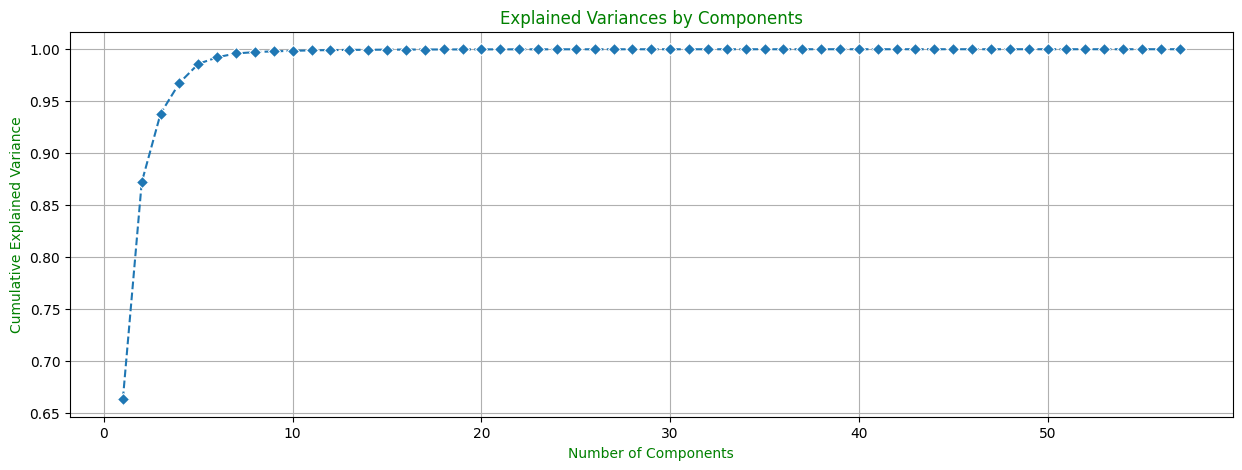

<Figure size 640x480 with 0 Axes>

In [78]:
plt.figure(figsize=(15,5))
sns.lineplot(y=np.cumsum(pca.explained_variance_ratio_),x=range(1,58),marker='D',linestyle = '--')
plt.xlabel('Number of Components',fontsize=10,color='green')
plt.ylabel('Cumulative Explained Variance',fontsize=10,color='green')
plt.title('Explained Variances by Components',fontsize=12,color='green')
plt.grid()
plt.show()
plt.savefig("scree2.jpg")

In [79]:
df_pcs = pca_extract[['PC1','PC2', 'PC3', 'PC4', 'PC5','PC6']]
df_pcs

PC1       PC2       PC3       PC4       PC5       PC6
No_HH          -0.171838  0.062341  0.059237  0.133124 -0.082125  0.053443
TOT_M          -0.177742 -0.019995 -0.037815  0.073941  0.001049 -0.137665
TOT_F          -0.175241  0.015898  0.006712  0.106508 -0.045525 -0.048561
M_06           -0.148766 -0.084986 -0.043080  0.072654  0.044156 -0.212501
F_06           -0.145544 -0.089382 -0.032253  0.062459  0.044647 -0.206413
M_SC           -0.168825 -0.021648 -0.013354  0.089700  0.135869 -0.071694
F_SC           -0.165855  0.003638  0.033372  0.117276  0.103750  0.002742
M_ST            0.087934  0.104961  0.176797 -0.090252 -0.350038 -0.090157
F_ST            0.088380  0.108152  0.198328 -0.088143 -0.352245 -0.087139
M_LIT          -0.184062  0.012082 -0.056582  0.086164 -0.034418 -0.097861
F_LIT          -0.185803  0.053957 -0.060044  0.101523 -0.097632 -0.039218
M_ILL          -0.141741 -0.091452  0.010303  0.035689  0.093530 -0.209748
F_ILL          -0.136530 -0.038928  0.104616  0.107472  0.053684 -0.028304
TOT_WORK_M     -0.188391  0.033927 -0.026920  0.072402 -0.014425 -0.081885
TOT_WORK_F     -0.129179  0.074773  0.120861  0.186450 -0.090192  0.171367
MAINWORK_M     -0.199493  0.088755 -0.033583  0.099320  0.004073 -0.083061
MAINWORK_F     -0.148547  0.145317  0.110014  0.200368 -0.042971  0.169369
MAIN_CL_M      -0.055514 -0.056335  0.011338  0.171443  0.317788 -0.053222
MAIN_CL_F       0.026498 -0.007899  0.055038  0.376432  0.136952  0.218892
MAIN_AL_M      -0.112139  0.035399  0.273832  0.106883  0.219564 -0.087122
MAIN_AL_F      -0.076290  0.126347  0.320940  0.203204  0.104393  0.140460
MAIN_HH_M      -0.182745 -0.017750 -0.072612 -0.049946  0.130290  0.018624
MAIN_HH_F      -0.167210  0.036205  0.032470 -0.052067  0.099795  0.362016
MAIN_OT_M      -0.204639  0.122077 -0.110678  0.061134 -0.102902 -0.057551
MAIN_OT_F      -0.188517  0.162546 -0.039570  0.080323 -0.159151  0.057190
MARGWORK_M     -0.098077 -0.174940  0.022724 -0.056023 -0.071781 -0.082058
MARGWORK_F     -0.050637 -0.123987  0.126083  0.096815 -0.182209  0.092370
MARG_CL_M       0.080166 -0.262857 -0.116145  0.136820 -0.039401  0.032455
MARG_CL_F       0.117037 -0.213187 -0.124667  0.275546 -0.071004  0.092638
MARG_AL_M      -0.027894 -0.205149  0.233433 -0.088481  0.065495 -0.131958
MARG_AL_F      -0.003354 -0.105935  0.342090  0.048821 -0.065021  0.011893
MARG_HH_M      -0.120418 -0.170133 -0.015057 -0.177108  0.106778  0.050466
MARG_HH_F      -0.127940 -0.116763  0.004619 -0.182417  0.083203  0.332665
MARG_OT_M      -0.175423 -0.048281 -0.113802 -0.077701 -0.122662 -0.017705
MARG_OT_F      -0.169139 -0.002495 -0.073800 -0.039465 -0.202449  0.097645
MARGWORK_3_6_M -0.161895 -0.062371 -0.047171  0.072257  0.017387 -0.172580
MARGWORK_3_6_F -0.184709 -0.018035 -0.052715  0.058953 -0.019264 -0.144218
MARG_CL_3_6_M  -0.106479 -0.164340  0.032004 -0.062110 -0.061514 -0.087568
MARG_CL_3_6_F  -0.059116 -0.101803  0.139319  0.105575 -0.168595  0.098913
MARG_AL_3_6_M   0.068355 -0.259243 -0.097698  0.115262 -0.036742  0.031139
MARG_AL_3_6_F   0.112898 -0.200819 -0.113540  0.288495 -0.071062  0.099986
MARG_HH_3_6_M  -0.031925 -0.198322  0.241615 -0.077973  0.072595 -0.124240
MARG_HH_3_6_F  -0.006063 -0.083483  0.354417  0.065991 -0.062737  0.025398
MARG_OT_3_6_M  -0.122779 -0.165746 -0.014733 -0.173361  0.112069  0.048359
MARG_OT_3_6_F  -0.130766 -0.103099  0.004470 -0.179982  0.091081  0.342268
MARGWORK_0_3_M -0.177946 -0.046061 -0.112877 -0.075326 -0.110808 -0.019059
MARGWORK_0_3_F -0.176686  0.007215 -0.078003 -0.037281 -0.174387  0.087147
MARG_CL_0_3_M  -0.054951 -0.214810 -0.033200 -0.026610 -0.117389 -0.076283
MARG_CL_0_3_F  -0.015361 -0.189665  0.078033  0.064239 -0.219718  0.050262
MARG_AL_0_3_M   0.109270 -0.255727 -0.158724  0.164871 -0.051918  0.014839
MARG_AL_0_3_F   0.121860 -0.243412 -0.144847  0.216911 -0.068401  0.049116
MARG_HH_0_3_M  -0.009699 -0.231461  0.191265 -0.119661  0.008163 -0.144304
MARG_HH_0_3_F   0.008827 -0.176390  0.284543 -

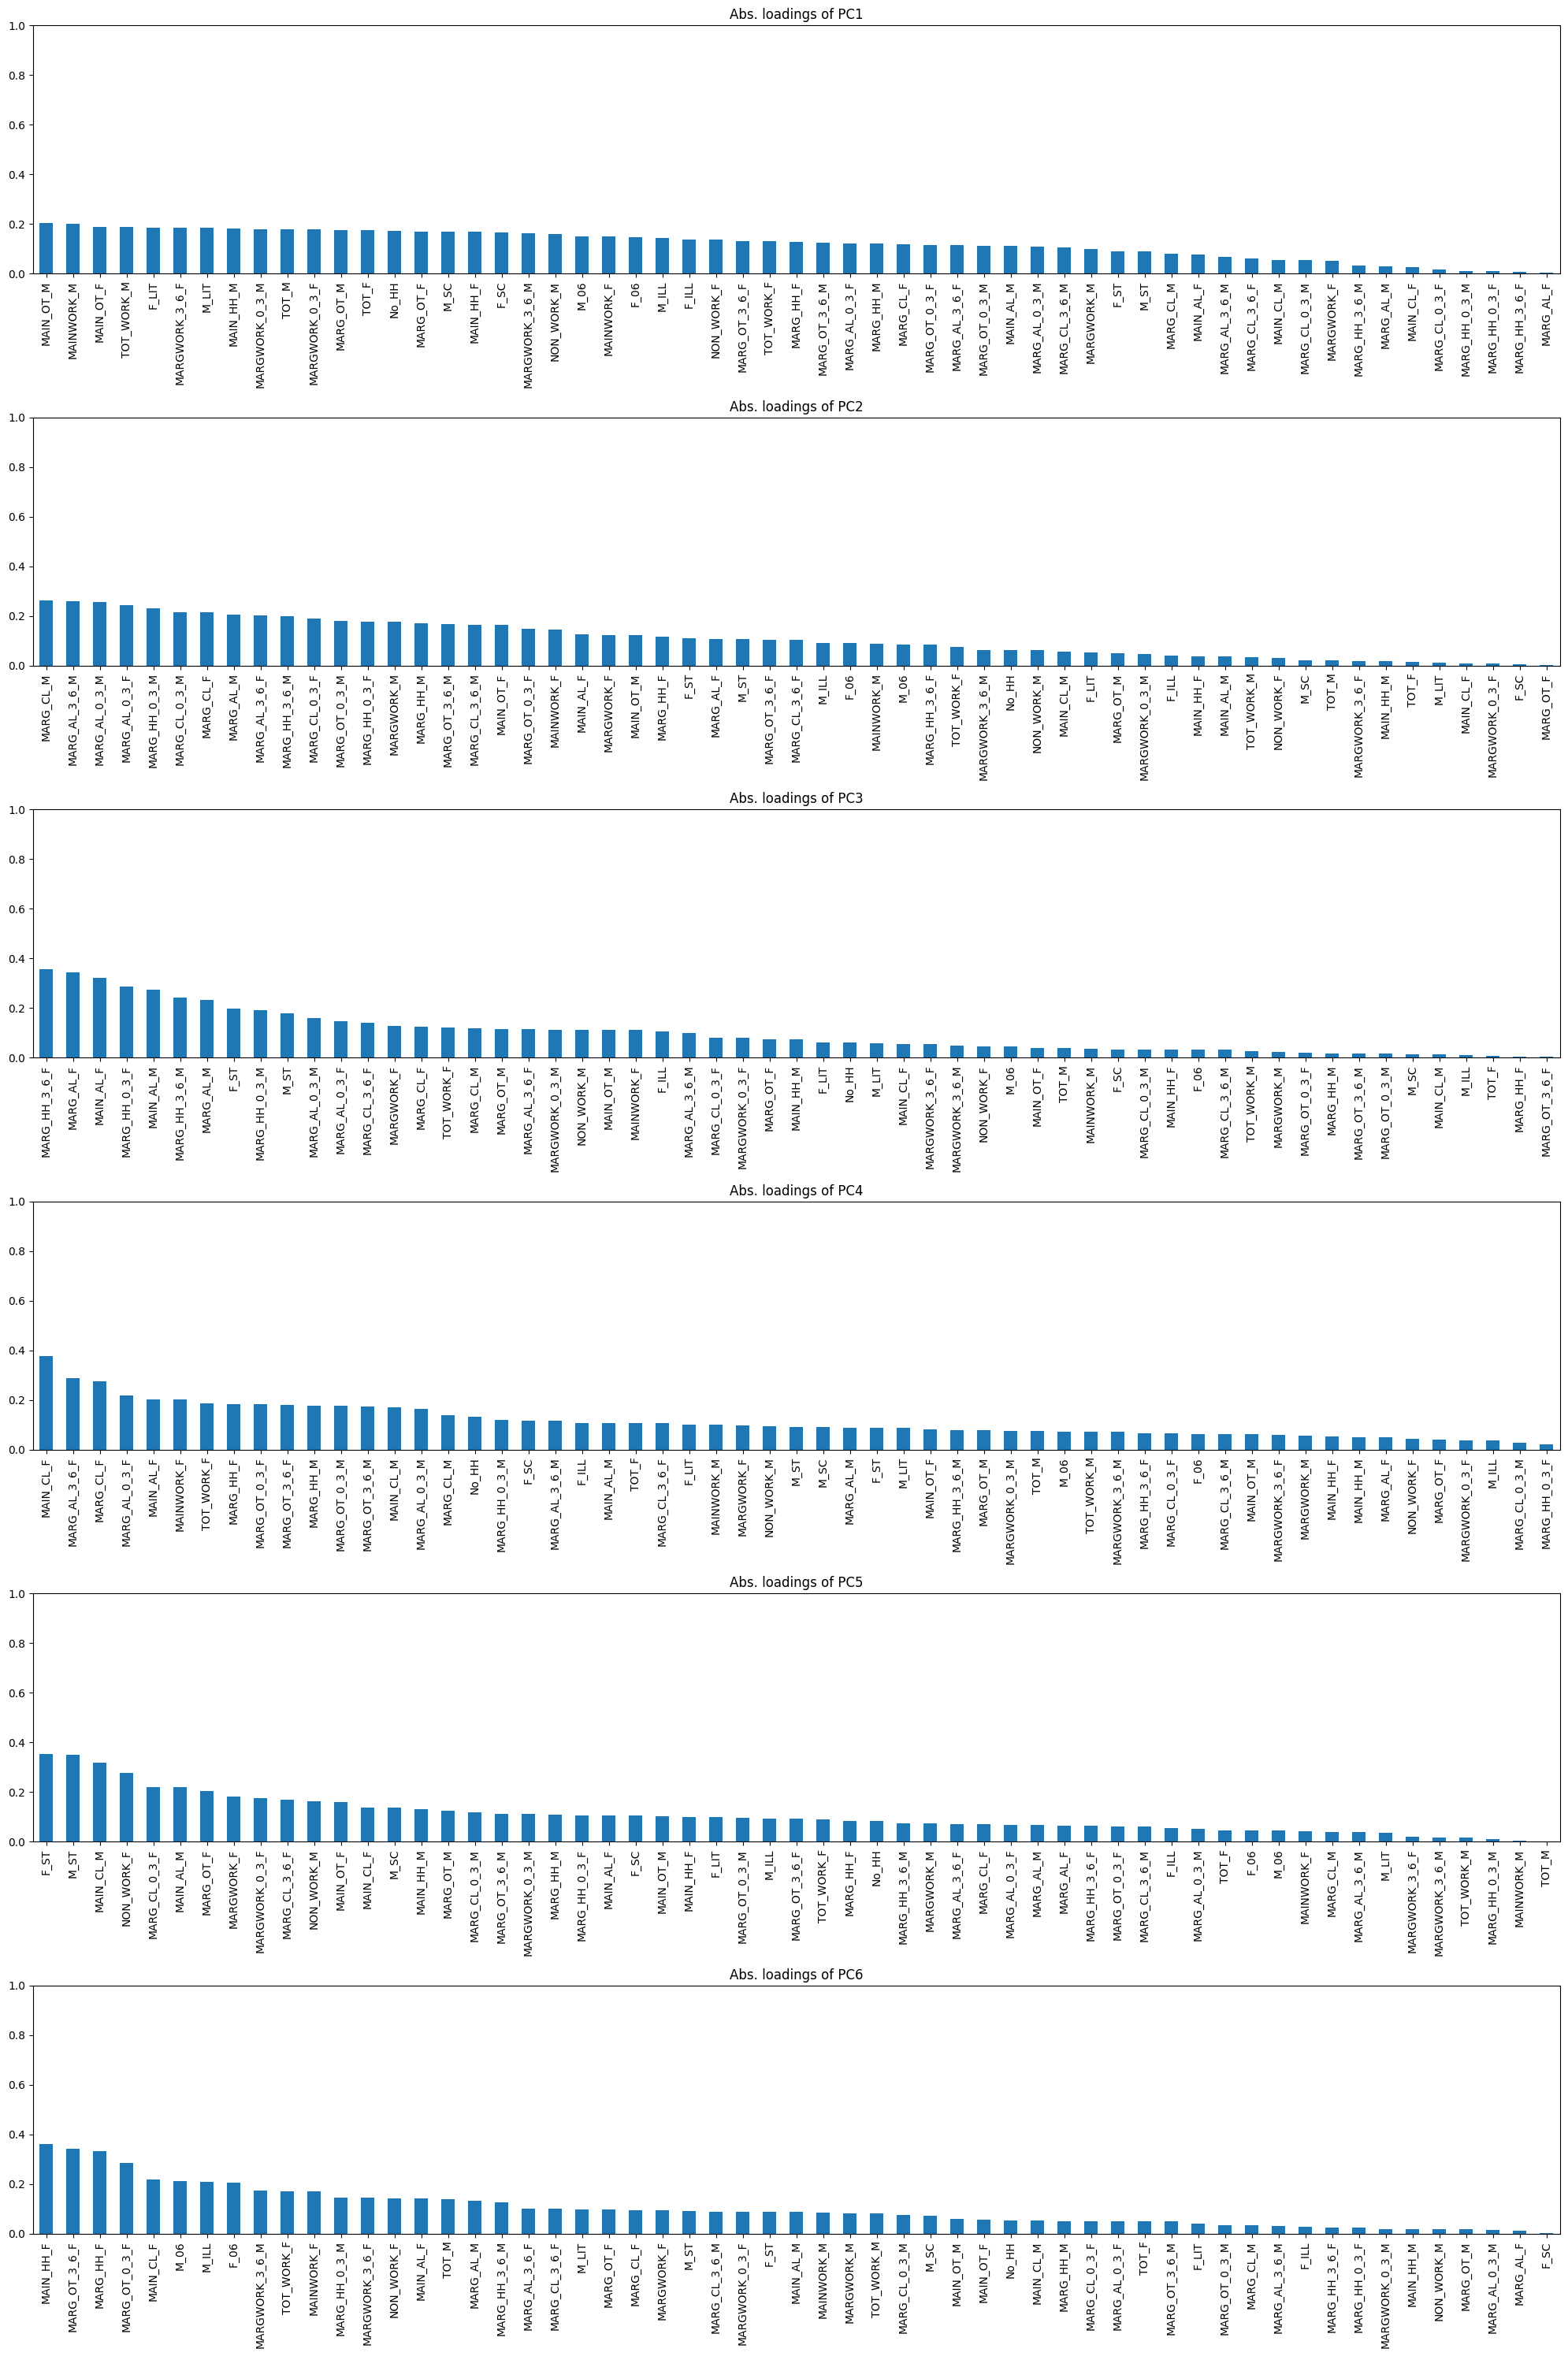

In [80]:
plt.figure(figsize = (20,30))
for i in range(len(df_pcs.columns)):
    plt.subplot(6,1,i+1)
    abs(df_pcs[df_pcs.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_pcs.columns[i]))
    plt.tight_layout()
plt.savefig("absload.jpg")

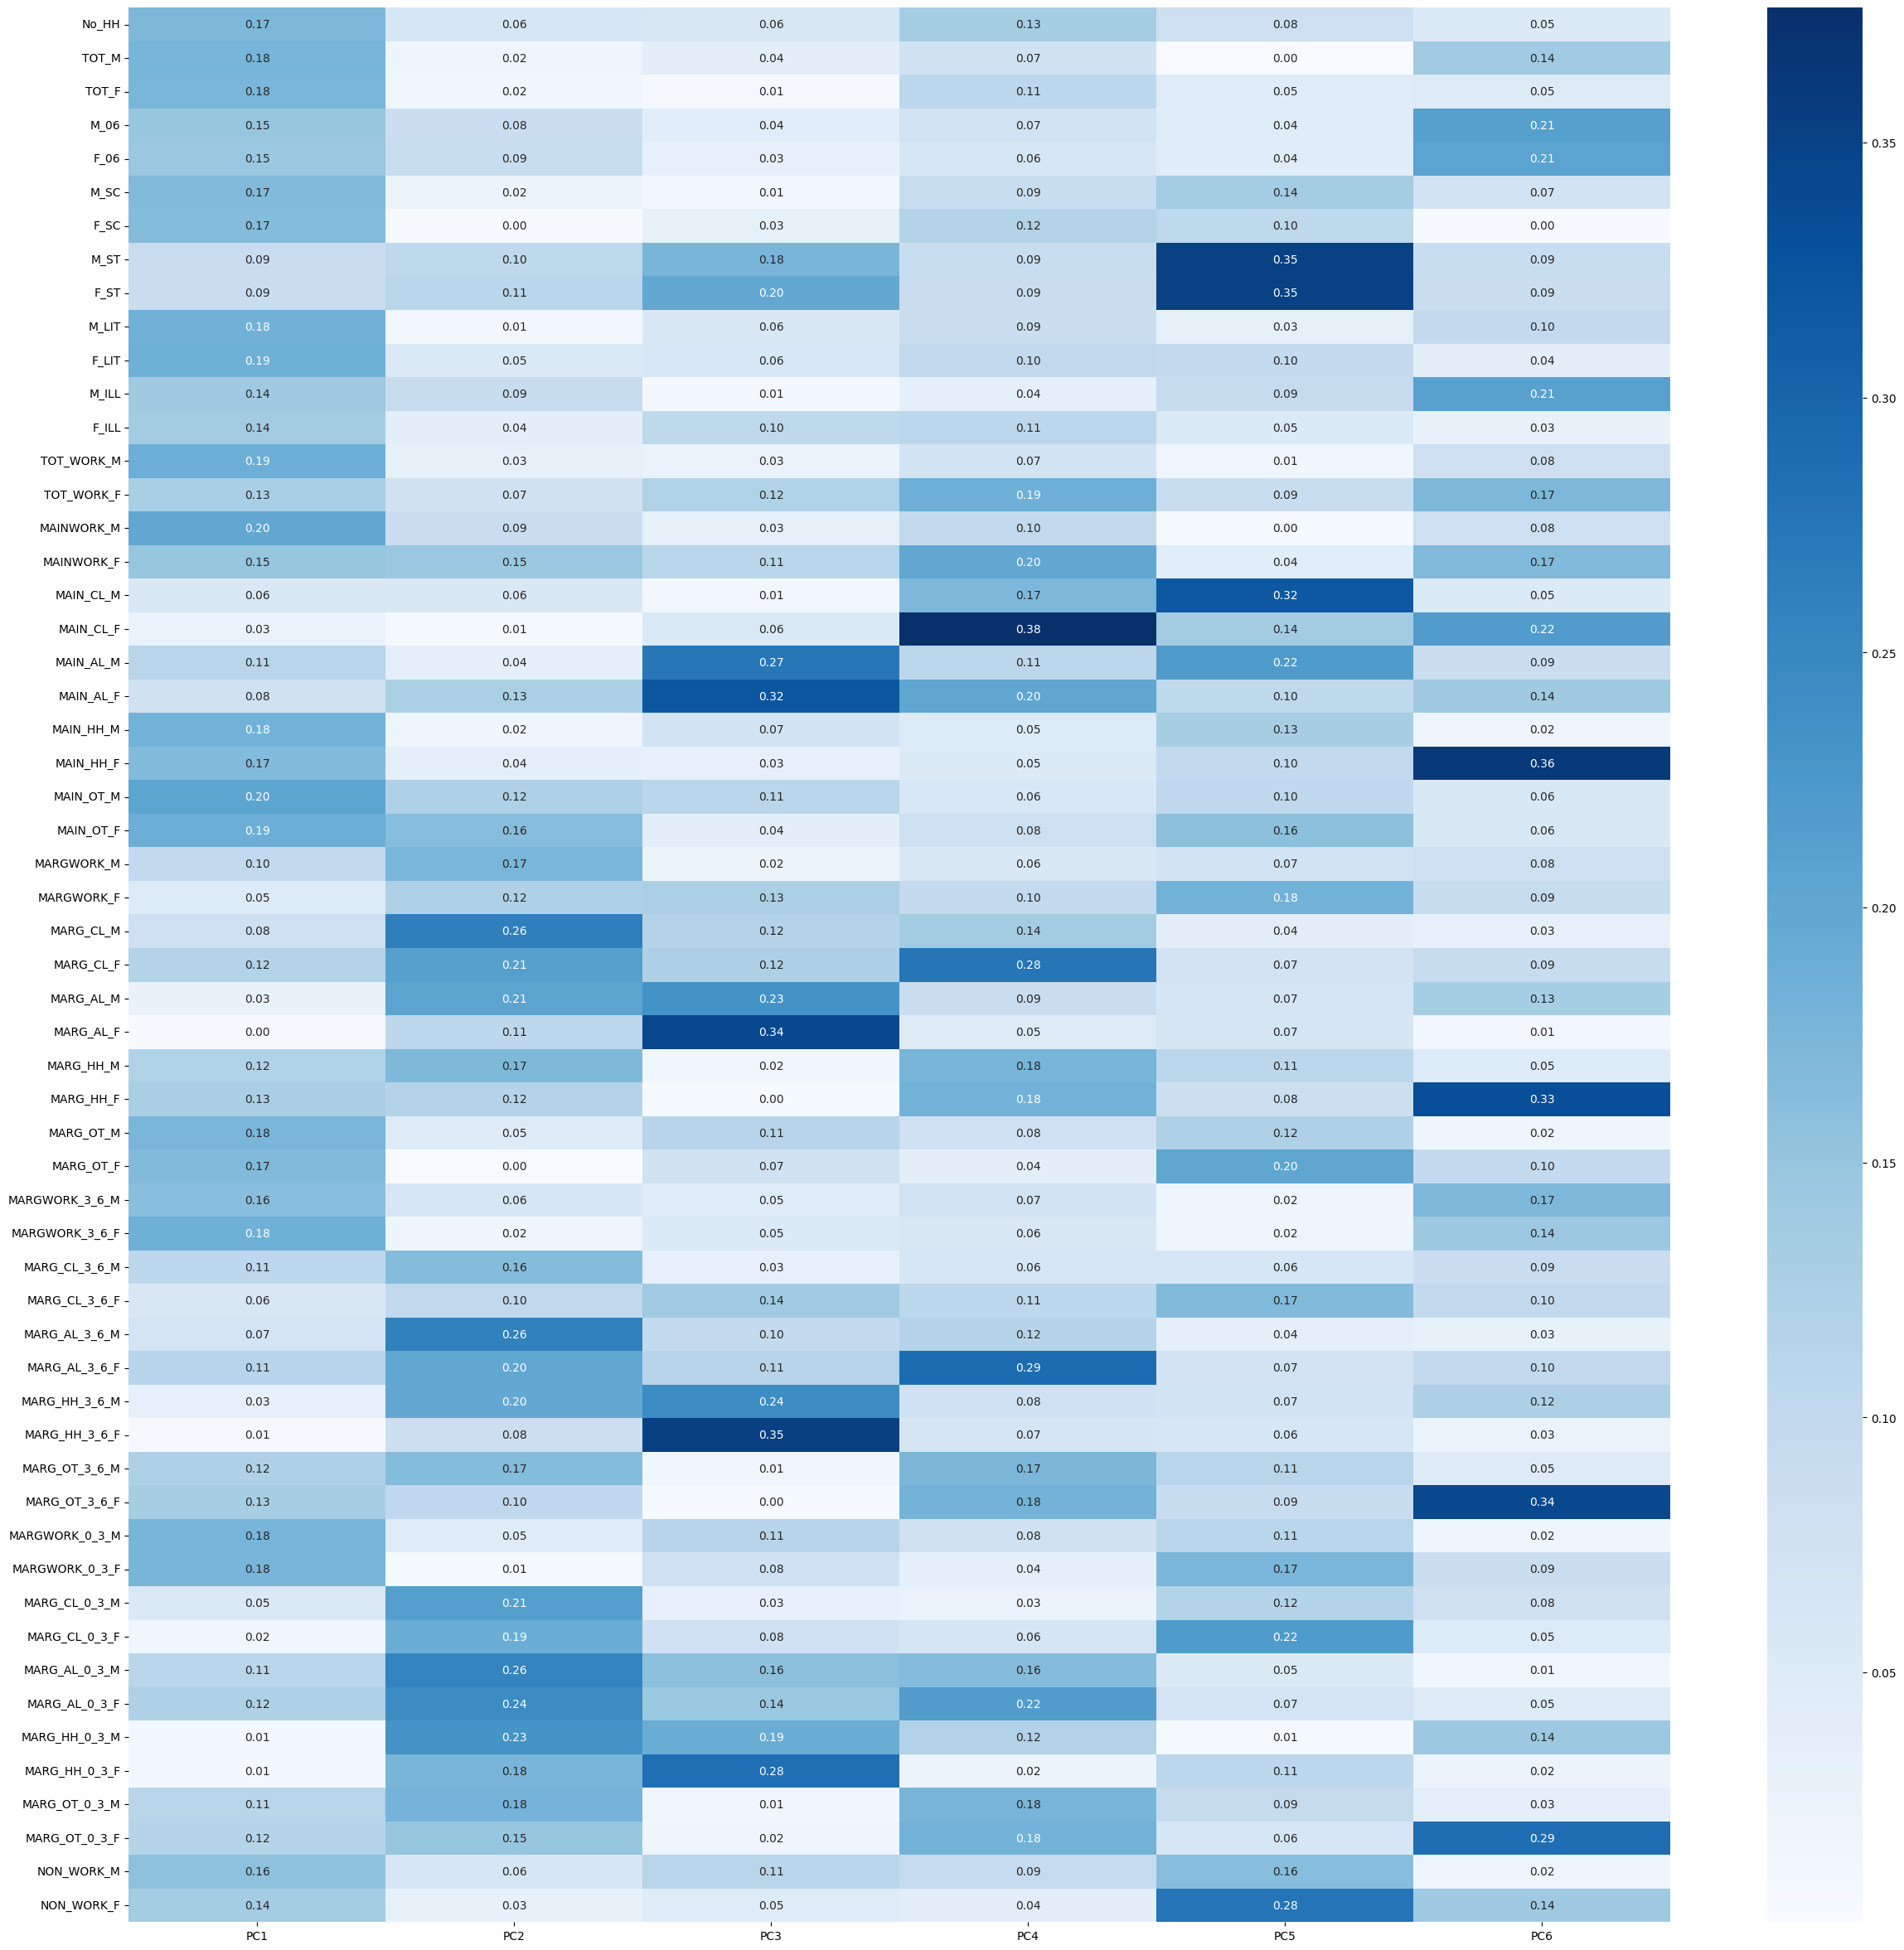

In [81]:
plt.figure(figsize = (30,30))
sns.heatmap(abs(df_pcs), annot = True, cmap = 'Blues',fmt = '.2f');
plt.savefig("pcaheat.jpg")

In [82]:
pca = PCA(n_components=6, random_state=123)
pca_f = pca.fit_transform(scaled_pca)

In [83]:
pca_final = pd.DataFrame(pca_f, columns = df_pcs.columns)
pca_final.head()

PC1       PC2       PC3       PC4       PC5       PC6
0 -1.141010  0.588138  0.164899  0.282802 -0.141400  0.057689
1 -1.348574  0.017570 -0.134072  0.175221 -0.011739 -0.135731
2 -1.341161  0.207062  0.027676  0.267599 -0.109592 -0.037613
3 -1.029050 -0.358927 -0.156145  0.164678  0.070711 -0.216209
4 -1.016880 -0.401646 -0.113016  0.151000  0.064642 -0.207636

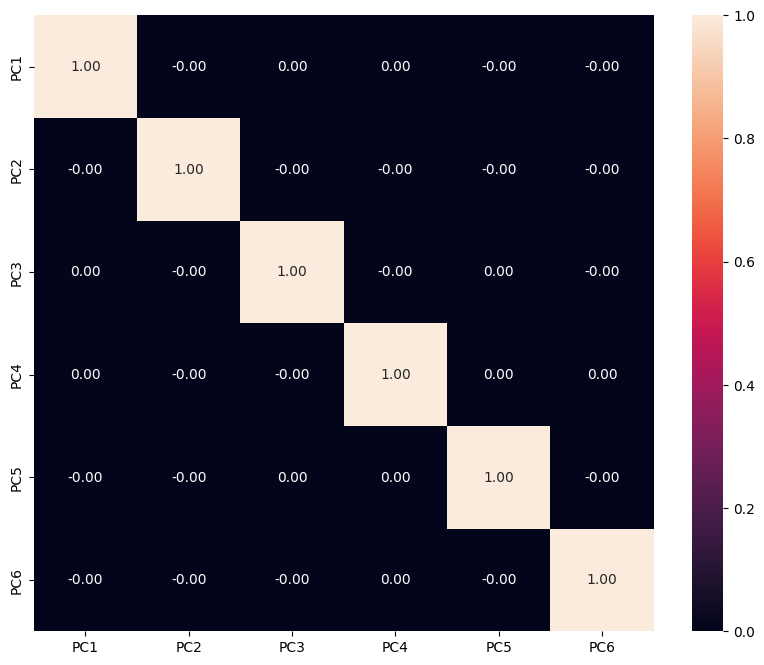

In [85]:
plt.figure(figsize = (10,8))
sns.heatmap(pca_final.corr(), annot=True,fmt='.2f');
plt.savefig("pcafinalheat.jpg")

CONCLUSION ABOUT EACH PCs:

PC1 contains the most of the data it has the F_ILL as its highest value.
PC2 has higest value of MARG_AL_0_3_F and so on.
PC3 has MAIN_AL_M has highest value follwed by F_ST , etc.
In PC4 MARG_AL_0_3_F has highest value and MARG_HH_F lowest.
PC5 and PC6 contains lowest dataa and has MAIN_CL_M and M_ST as the highest values.

Each PCs have their own unqiue characteristics. PC1 has 66% of the data stored while PC3 captured 13% and so on.


Below is code for writting the linear equation for the First Principal Component

In [86]:
first_pc = pca.components_[0]
# Variable names corresponding to each element in PC1
variable_names = scaled_pca.columns.tolist()
# Ensure the number of variables matches the length of PC1
assert len(variable_names) == len(first_pc)
# Calculate the mean of the data along each feature
means = scaled_pca.mean().values

# The intercept is the negative sum of the product of the means and the PC1 coefficients
intercept = -np.sum(means * first_pc)

# Function to print the linear equation of the first PC with intercept
def linear_equation(PC, variable_names, C):
    equation = " + ".join(f"({coef:.2f}) * {var}" for coef, var in zip(first_pc, variable_names))
    print(f"The linear equation for the first PC with intercept is:\n{equation} + ({C:.2f}) = 0")

# Call the function to print the linear equation with intercept
linear_equation(first_pc, variable_names, intercept)


The linear equation for the first PC with intercept is:
(-0.17) * No_HH + (-0.18) * TOT_M + (-0.18) * TOT_F + (-0.15) * M_06 + (-0.15) * F_06 + (-0.17) * M_SC + (-0.17) * F_SC + (0.09) * M_ST + (0.09) * F_ST + (-0.18) * M_LIT + (-0.19) * F_LIT + (-0.14) * M_ILL + (-0.14) * F_ILL + (-0.19) * TOT_WORK_M + (-0.13) * TOT_WORK_F + (-0.20) * MAINWORK_M + (-0.15) * MAINWORK_F + (-0.06) * MAIN_CL_M + (0.03) * MAIN_CL_F + (-0.11) * MAIN_AL_M + (-0.08) * MAIN_AL_F + (-0.18) * MAIN_HH_M + (-0.17) * MAIN_HH_F + (-0.20) * MAIN_OT_M + (-0.19) * MAIN_OT_F + (-0.10) * MARGWORK_M + (-0.05) * MARGWORK_F + (0.08) * MARG_CL_M + (0.12) * MARG_CL_F + (-0.03) * MARG_AL_M + (-0.00) * MARG_AL_F + (-0.12) * MARG_HH_M + (-0.13) * MARG_HH_F + (-0.18) * MARG_OT_M + (-0.17) * MARG_OT_F + (-0.16) * MARGWORK_3_6_M + (-0.18) * MARGWORK_3_6_F + (-0.11) * MARG_CL_3_6_M + (-0.06) * MARG_CL_3_6_F + (0.07) * MARG_AL_3_6_M + (0.11) * MARG_AL_3_6_F + (-0.03) * MARG_HH_3_6_M + (-0.01) * MARG_HH_3_6_F + (-0.12) * MARG_OT_3_6_M